In [137]:
import numpy as np
import pandas as pd
data=pd.read_csv("hate_crime_twenty_years.csv")
hc=pd.read_csv("hate_crime_twenty_years.csv")

/var/folders/8c/lqq9r1tn5ysg8x_j1x4_l3tw0000gn/T/ipykernel_40486/1959422118.py:3: DtypeWarning:

Columns (0,1,2,3,4,13,14,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/8c/lqq9r1tn5ysg8x_j1x4_l3tw0000gn/T/ipykernel_40486/1959422118.py:4: DtypeWarning:

Columns (0,1,2,3,4,13,14,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.



In [138]:
hc.head()

pug_agency_name pub_agency_unit agency_type_name state_abbr state_name  \
0       Anchorage             NaN             City         AK     Alaska   
1       Anchorage             NaN             City         AK     Alaska   
2       Anchorage             NaN             City         AK     Alaska   
3       Anchorage             NaN             City         AK     Alaska   
4    Green Forest             NaN             City         AR   Arkansas   

   month   day    year  adult_victim_count  juvenile_victim_count  ...  \
0    2.0   2.0  2000.0                 NaN                    NaN  ...   
1    2.0  21.0  2000.0                 NaN                    NaN  ...   
2    8.0   5.0  2000.0                 NaN                    NaN  ...   
3    9.0   6.0  2000.0                 NaN                    NaN  ...   
4    8.0  28.0  2000.0                 NaN                    NaN  ...   

   adult_offender_count  juvenile_offender_count  offender_race  \
0                   NaN                      NaN          White   
1                   NaN                      NaN        Unknown   
2                   NaN                      NaN          White   
3                   NaN                      NaN        Unknown   
4                   NaN                      NaN       Multiple   

  offender_ethnicity victim_count  \
0      Not Specified          1.0   
1      Not Specified          1.0   
2      Not Specified          2.0   
3      Not Specified          2.0   
4      Not Specified          2.0   

                                        offense_name total_individual_victims  \
0                                 Aggravated Assault                      1.0   
1           Destruction/Damage/Vandalism of Property                      1.0   
2           Destruction/Damage/Vandalism of Property                      2.0   
3                                       Intimidation                      2.0   
4  Aggravated Assault;Destruction/Damage/Vandalis...                      1.0   

                        location_name                       bias_desc  \
0  Highway/Road/Alley/Street/Sidewalk  Anti-Black or African American   
1                      Residence/Home  Anti-Black or African American   
2                      Residence/Home  Anti-Black or African American   
3                      Residence/Home  Anti-Black or African American   
4                      Residence/Home         Anti-Hispanic or Latino   

  victim_types  
0   Individual  
1   Individual  
2   Individual  
3   Individual  
4   Individual  

[5 rows x 21 columns]

In [139]:
hc.offender_race.value_counts()

Unknown                                      64561
White                                        63025
Black or African American                    20617
Not Specified                                 6807
Multiple                                      3595
Asian                                         1116
American Indian or Alaska Native              1026
Native Hawaiian or Other Pacific Islander      101
Name: offender_race, dtype: int64

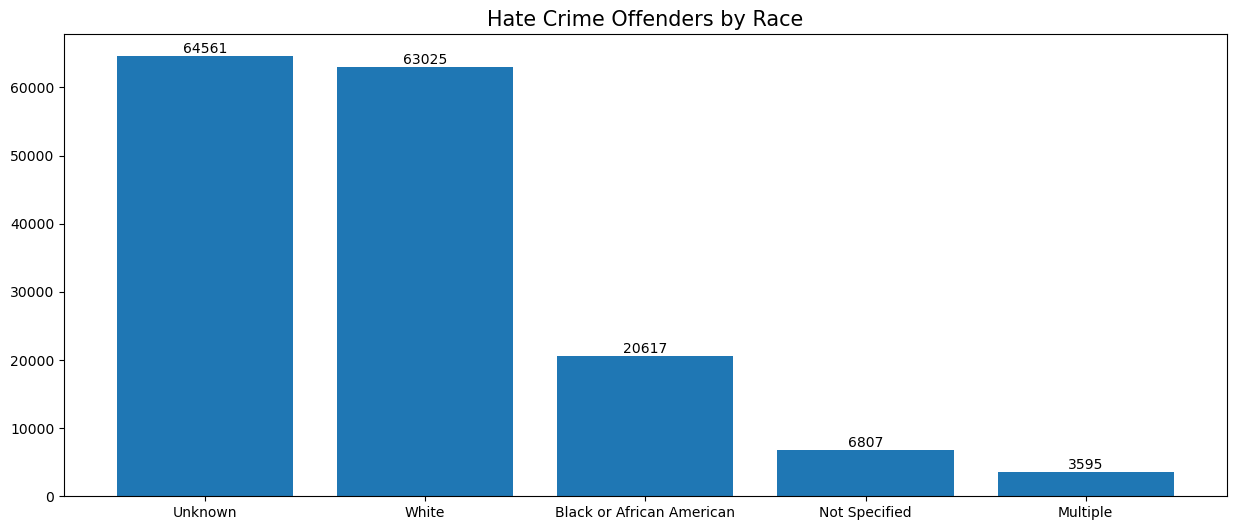

In [140]:
#158,605 total report hate crimes over last 21 years
#40% of reported hate crimes were committed by whites
#13% of reported hate crimes were committed by blacks
import matplotlib.pyplot as plt
x= hc.offender_race.value_counts()[:5].index
y= hc.offender_race.value_counts()[:5].values
plt.figure(figsize=(15, 6))

plt.bar(x, y)
plt.title("Hate Crime Offenders by Race", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [141]:
hc.year.value_counts()

2020.0    9854
2001.0    9730
2000.0    8217
2008.0    8039
2019.0    7856
2006.0    7715
2004.0    7684
2007.0    7623
2003.0    7539
2002.0    7485
2005.0    7411
2017.0    7328
2021.0    7303
2018.0    7179
2010.0    6628
2009.0    6612
2012.0    6592
2011.0    6299
2016.0    6270
2013.0    6044
2015.0    5843
2014.0    5597
Name: year, dtype: int64

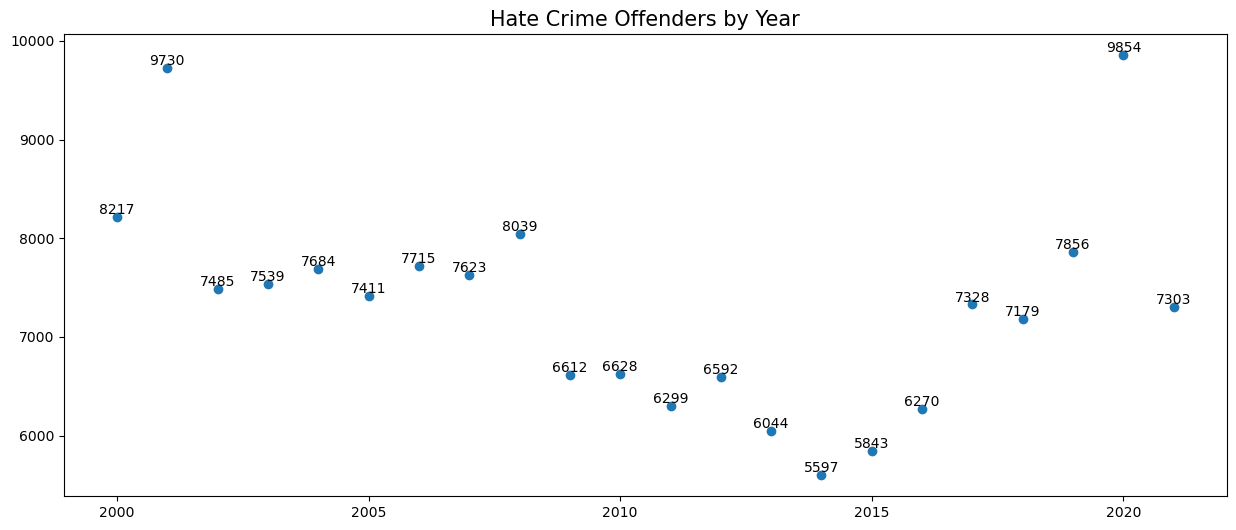

In [142]:
#correlated with reduced hate crimes during obama years and potentially increase during Trumps years
#9/11 and 2020 are outliers
#hate crimes were suppressed during Obama years
#Need to look at hate crimes committed against persons in 2001 and 2020
import matplotlib.pyplot as plt
x= hc.year.value_counts().index
y= hc.year.value_counts().values
plt.figure(figsize=(15, 6))

plt.scatter(x, y)
plt.title("Hate Crime Offenders by Year", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [143]:
hc.bias_desc.value_counts()[:5]

Anti-Black or African American    52229
Anti-Jewish                       19008
Anti-White                        16393
Anti-Gay (Male)                   16359
Anti-Hispanic or Latino           10541
Name: bias_desc, dtype: int64

In [243]:
#making a dataframe with just jew hate crimes
aj=hc['bias_desc']=='Anti-Jewish'
hc[aj]

pug_agency_name pub_agency_unit  \
8                                            Eagar             NaN   
14                                        Maricopa             NaN   
15                                        Maricopa             NaN   
22                                         Gilbert             NaN   
35                                        Goodyear             NaN   
...                                            ...             ...   
160721                                      Hudson             NaN   
160729                                   Manitowoc             NaN   
160737                                   Milwaukee             NaN   
160777  Metropolitan Drug Enforcement Network Team             NaN   
160838                       University of Wyoming             NaN   

             agency_type_name state_abbr     state_name  month   day    year  \
8                        City         AZ        Arizona   10.0  20.0  2000.0   
14                     County         AZ        Arizona    4.0  17.0  2000.0   
15                     County         AZ        Arizona   10.0  17.0  2000.0   
22                       City         AZ        Arizona    1.0  13.0  2000.0   
35                       City         AZ        Arizona    9.0  16.0  2000.0   
...                       ...        ...            ...    ...   ...     ...   
160721                   City         WI      Wisconsin    8.0  19.0  2021.0   
160729                   City         WI      Wisconsin    9.0  30.0  2021.0   
160737                   City         WI      Wisconsin    8.0   4.0  2021.0   
160777                  Other         WV  West Virginia    7.0  23.0  2021.0   
160838  University or College         WY        Wyoming    4.0  29.0  2021.0   

        adult_victim_count  juvenile_victim_count  ...  adult_offender_count  \
8                      NaN                    NaN  ...                   NaN   
14                     NaN                    NaN  ...                   NaN   
15                     NaN                    NaN  ...                   NaN   
22                     NaN                    NaN  ...                   NaN   
35                     NaN                    NaN  ...                   NaN   
...                    ...                    ...  ...                   ...   
160721                 0.0                    0.0  ...                   NaN   
160729                 0.0                    0.0  ...                   1.0   
160737                 1.0                    0.0  ...                   1.0   
160777                 0.0                    0.0  ...                   4.0   
160838                 1.0                    0.0  ...                   NaN   

        juvenile_offender_count              offender_race  \
8                           NaN                      White   
14                          NaN                    Unknown   
15                          NaN                    Unknown   
22                          NaN                    Unknown   
35                          NaN                    Unknown   
...                         ...                        ...   
160721                      NaN              Not Specified   
160729                      0.0                      White   
160737                      0.0  Black or African American   
160777                      0.0                      White   
160838                      NaN              Not Specified   

            offender_ethnicity victim_count  \
8                Not Specified          1.0   
14               Not Specified          1.0   
15               Not Specified          1.0   
22               Not Specified          1.0   
35               Not Specified          2.0   
...                        ...          ...   
160721           Not Specified          1.0   
160729  Not Hispanic or Latino          1.0   
160737                 Unknown          1.0   
160777           Not Specified          1.0   
160838    

In [306]:
hcaa=hc['bias_desc'].unique()[:10]

In [307]:
hcaa

array(['Anti-Black or African American', 'Anti-Hispanic or Latino',
       'Anti-Jewish', 'Anti-Other Religion', 'Anti-White',
       'Anti-American Indian or Alaska Native;Anti-Hispanic or Latino',
       'Anti-Arab', 'Anti-Asian', 'Anti-Multiple Races, Group',
       'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)'],
      dtype=object)

In [329]:
#def is creating a function
#colon always before indented lines
def hcbr(categories) :    
    fig, ax = plt.subplots()
    for key in categories:
        mask=hc['bias_desc']==key
        hate=hc[mask].groupby('year')['year'].count()
        ax.plot(hate, label= key)
    plt.title("Hate Crimes Committed Over Last 20 Years", fontsize=15)
    fig.legend(bbox_to_anchor = (.9,1),loc = 'upper left')

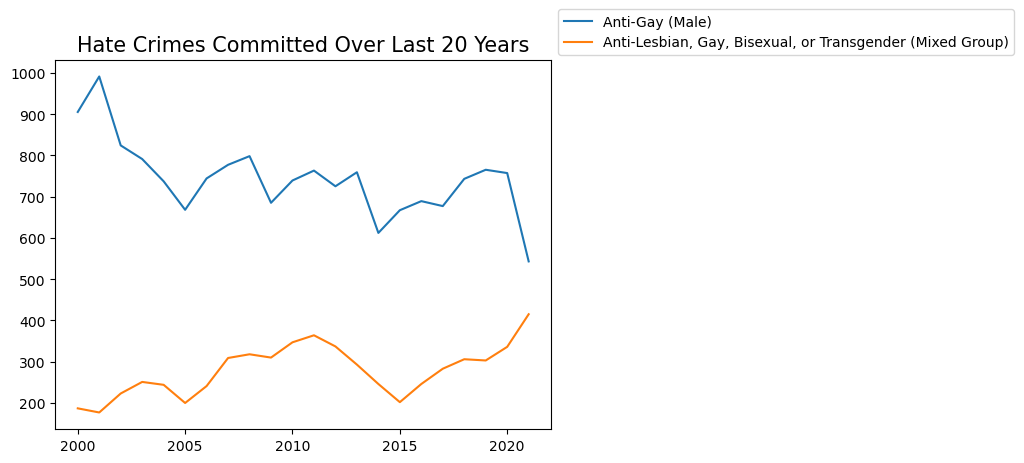

In [330]:
cats = ['Anti-Gay (Male)','Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)']
hcbr(cats)

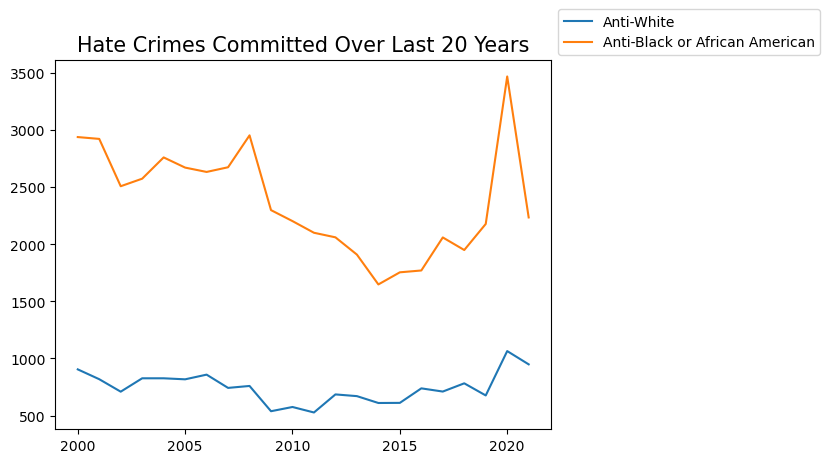

In [331]:
cats = ['Anti-White','Anti-Black or African American']
hcbr(cats)

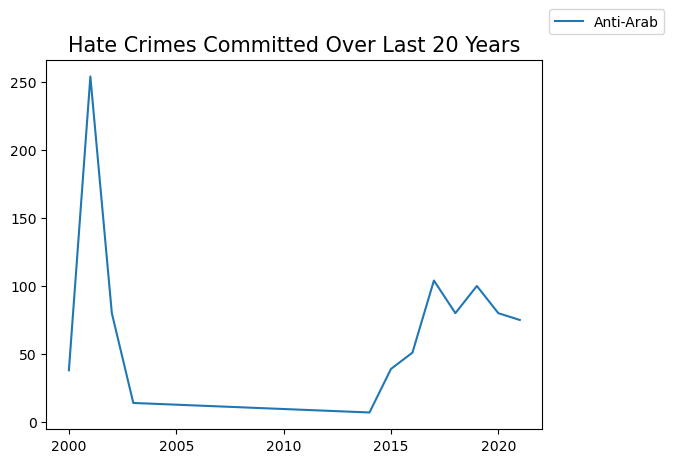

In [322]:
cats = ['Anti-Arab']
hcbr(cats)

In [350]:
hcaa=hc['bias_desc'].unique()[:5]

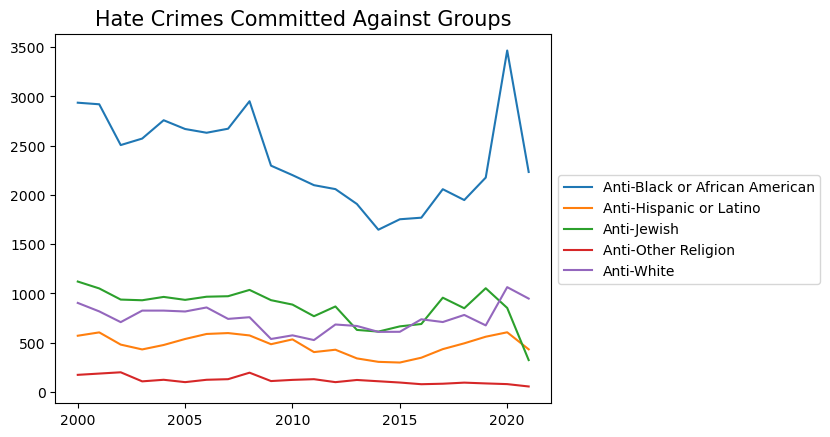

In [356]:
fig, ax = plt.subplots()
for key in hcaa:
    mask=hc['bias_desc']==key
    hate=hc[mask].groupby('year')['year'].count()
    ax.plot(hate, label= key)
plt.title("Hate Crimes Committed Against Groups", fontsize=15)
fig.legend(bbox_to_anchor = (.9,.6),loc = 'upper left')

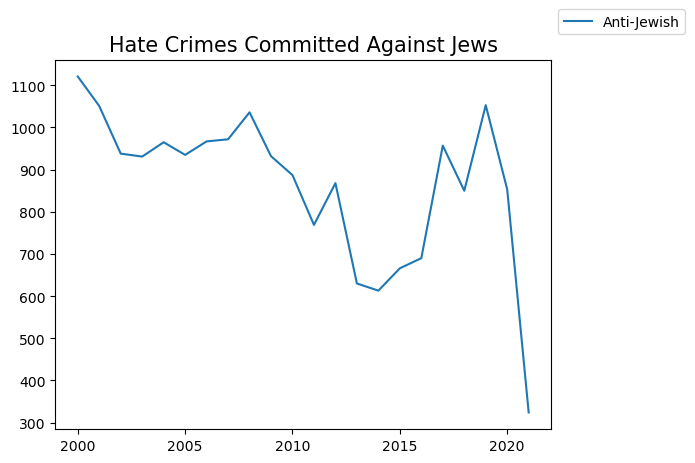

In [279]:
#grouping by year and jew hate crimes
fig, ax = plt.subplots()
for key in ['Anti-Jewish']:
    mask=hc['bias_desc']==key
    hate=hc[mask].groupby('year')['year'].count()
    ax.plot(hate, label= key)
plt.title("Hate Crimes Committed Against Jews", fontsize=15)
fig.legend(bbox_to_anchor = (.9,1),loc = 'upper left')

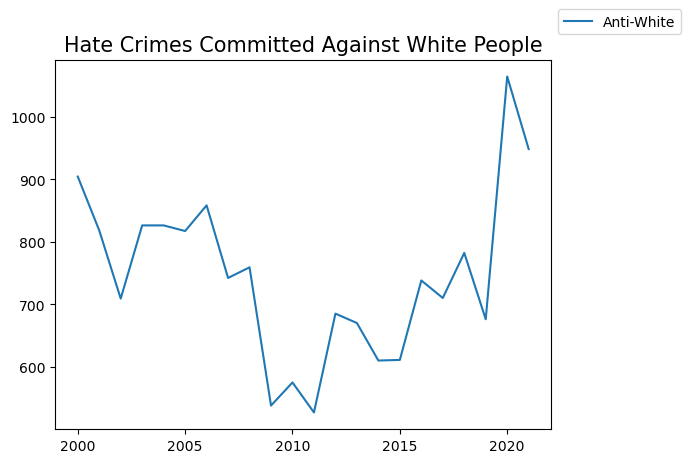

In [311]:
#grouping by year and jew hate crimes
fig, ax = plt.subplots()
for key in ['Anti-White']:
    mask=hc['bias_desc']==key
    hate=hc[mask].groupby('year')['year'].count()
    ax.plot(hate, label= key)
plt.title("Hate Crimes Committed Against White People", fontsize=15)
fig.legend(bbox_to_anchor = (.9,1),loc = 'upper left')

In [332]:
hc.offense_name.value_counts()[:10]

Destruction/Damage/Vandalism of Property                 49204
Intimidation                                             43857
Simple Assault                                           31926
Aggravated Assault                                       16027
Robbery                                                   2679
Burglary/Breaking & Entering                              2369
All Other Larceny                                         2068
Destruction/Damage/Vandalism of Property;Intimidation     1242
Drug/Narcotic Violations                                  1072
Arson                                                      806
Name: offense_name, dtype: int64

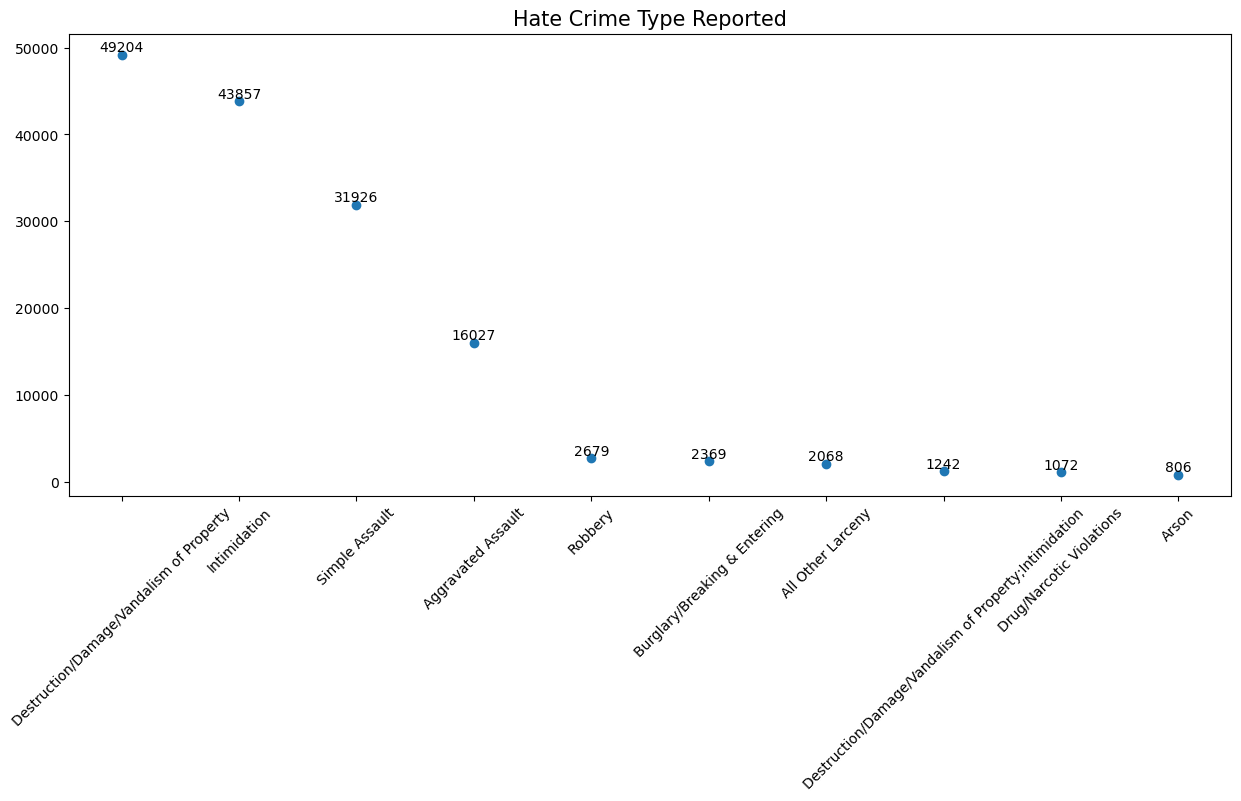

In [333]:
x= hc.offense_name.value_counts()[:10].index
y= hc.offense_name.value_counts()[:10].values
plt.figure(figsize=(15, 6))

plt.scatter(x, y)
plt.title("Hate Crime Type Reported", fontsize=15)

plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [346]:
def hcbo(categories) :    
    fig, ax = plt.subplots()
    for key in categories:
        mask=hc['offense_name']==key
        offense=hc[mask].groupby('year')['year'].count()
        ax.plot(offense, label= key)
    plt.title("Hate Crimes Offense Committed", fontsize=15)
    fig.legend(bbox_to_anchor = (.9,1),loc = 'upper left')

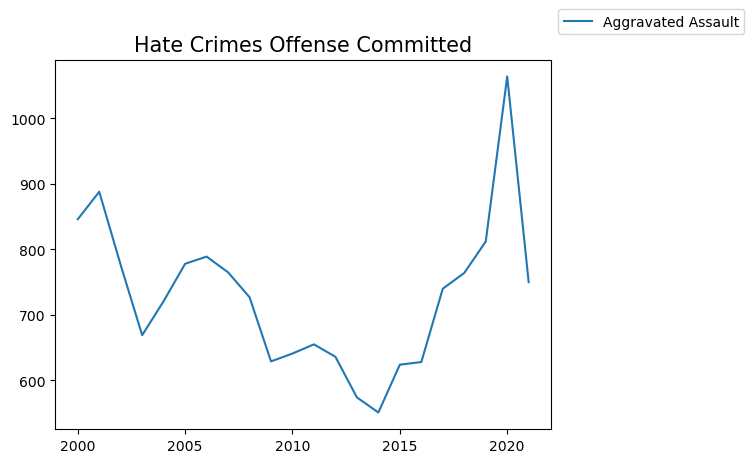

In [347]:
cats = ['Aggravated Assault']
hcbo(cats)

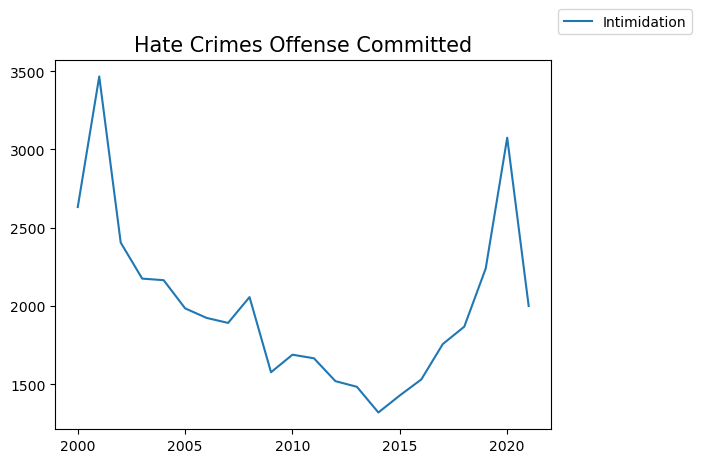

In [348]:
cats = ['Intimidation']
hcbo(cats)

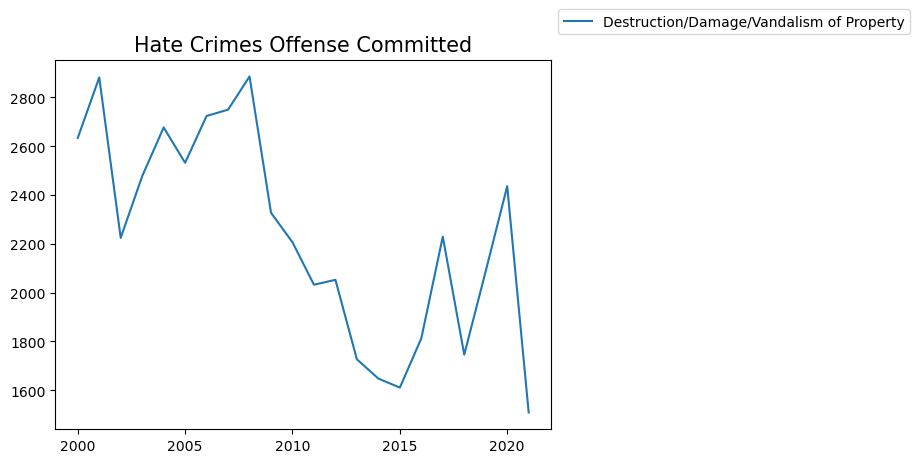

In [349]:
cats= ['Destruction/Damage/Vandalism of Property']
hcbo(cats)

In [352]:
crime=hc['offense_name'].unique()[:10]

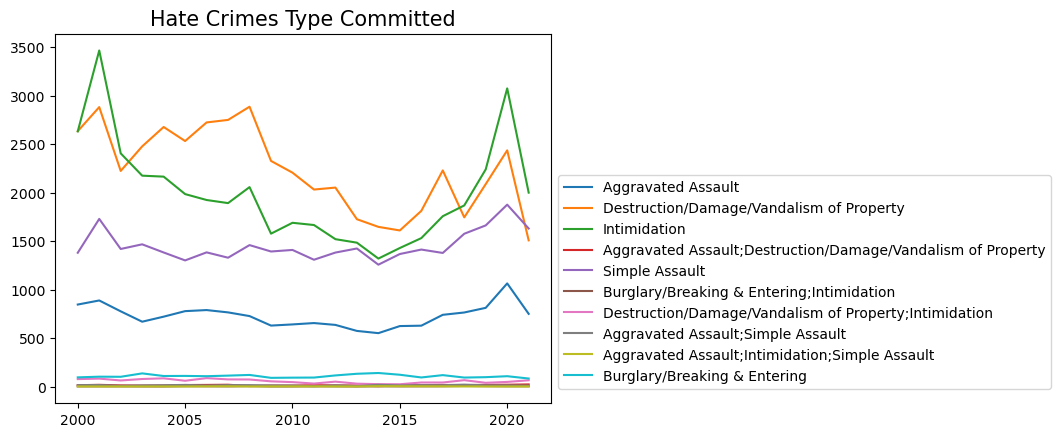

In [355]:
#Intimidation, simple assault, Aggraveted Assaults are on the rise
#simple assault & Aggravated assaults are on the rise compared to historical standards
fig, ax = plt.subplots()
for hey in crime:
    mask=hc['offense_name']==hey
    ofne=hc[mask].groupby('year')['year'].count()
    ax.plot(ofne, label= hey)
plt.title("Hate Crimes Type Committed", fontsize=15)
fig.legend(bbox_to_anchor = (.9,.6),loc = 'upper left')

In [443]:
mask = hc['offender_race'] == 'Black or African American'
top_offenses=hc[mask]['offense_name'].value_counts()[:10]
top_offenses.index

Index(['Simple Assault', 'Intimidation', 'Aggravated Assault',
       'Destruction/Damage/Vandalism of Property', 'Robbery',
       'Drug/Narcotic Violations', 'Burglary/Breaking & Entering',
       'All Other Larceny', 'Shoplifting',
       'Destruction/Damage/Vandalism of Property;Simple Assault'],
      dtype='object')

Index(['Simple Assault', 'Intimidation', 'Aggravated Assault',
       'Destruction/Damage/Vandalism of Property', 'Robbery',
       'Drug/Narcotic Violations', 'Burglary/Breaking & Entering',
       'All Other Larceny', 'Shoplifting',
       'Destruction/Damage/Vandalism of Property;Simple Assault'],
      dtype='object')

In [445]:
aac=hc[mask].groupby('year')['offense_name'].count()

In [471]:
def Hate_Crimes_Committed_by_Race_by_Type(offender_race):
    mask = hc['offender_race'] == offender_race
    top_offenses=hc[mask]['offense_name'].value_counts()[:10]
    top_offenses.index
    fig, ax = plt.subplots()
    for key in top_offenses.index:
        of = hc[mask]['offense_name'] == key 
        aac = hc[mask & of].groupby('year')['offense_name'].count()
        ax.plot(aac, label= key)
    plt.title(f"Hate Crimes by Type Committed by {offender_race}", fontsize=15)
    fig.legend(bbox_to_anchor = (.9,.6),loc = 'upper left')

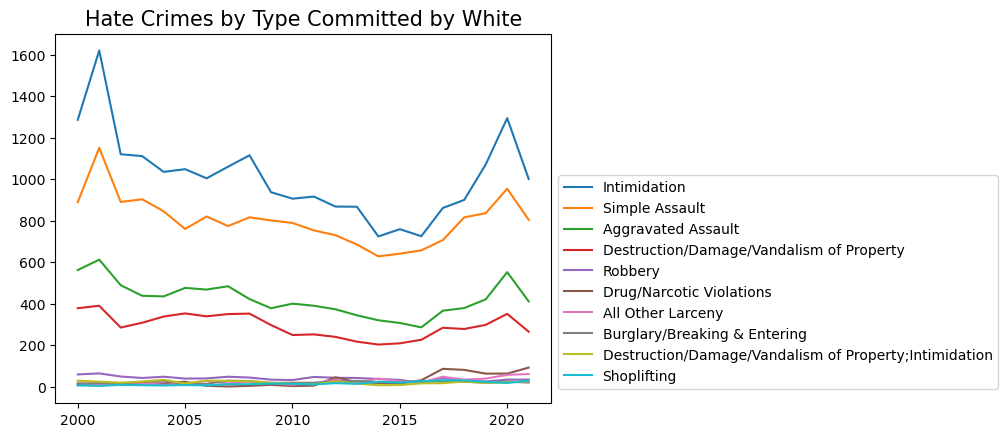

In [472]:
Hate_Crimes_Committed_by_Race_by_Type('White')

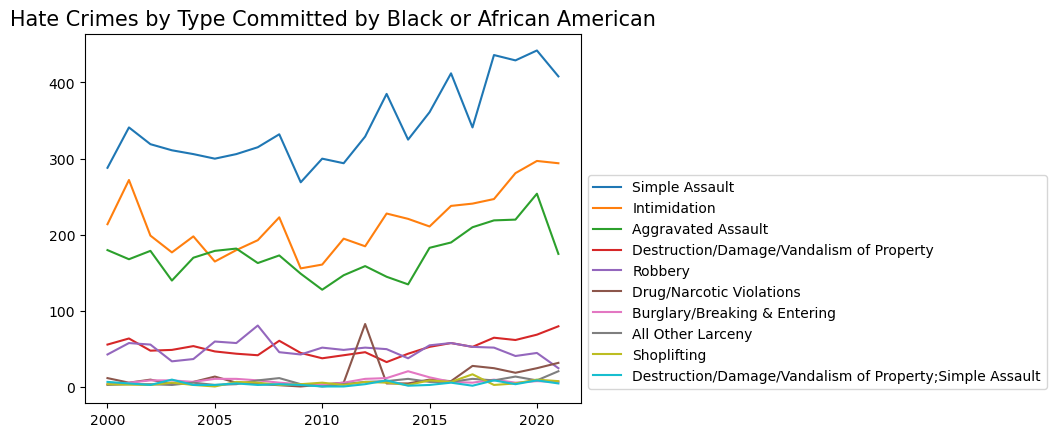

In [461]:
Hate_Crimes_Committed_by_Race_by_Type('Black or African American')

In [473]:
def Hate_Crimes_Committed_by_Race_by_Type(offender_race):
    mask = hc['offender_race'] == offender_race
    top_offenses=hc[mask]['offense_name'].value_counts()[:10]
    top_offenses.index
    fig, ax = plt.subplots()
    for key in top_offenses.index:
        of = hc[mask]['offense_name'] == key 
        aac = hc[mask & of].groupby('year')['offense_name'].count()/hc[mask].shape[0]
        ax.plot(aac, label= key)
    plt.title(f"Hate Crimes by Type Committed by {offender_race}", fontsize=15)
    fig.legend(bbox_to_anchor = (.9,.6),loc = 'upper left')

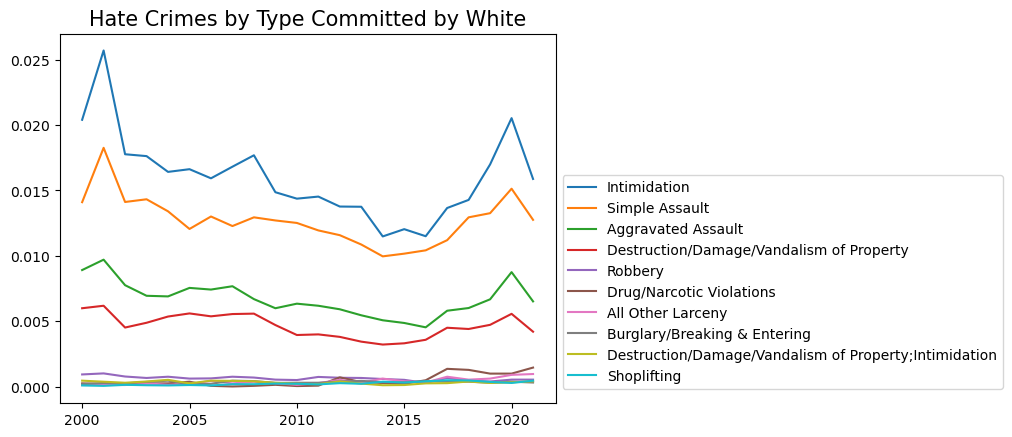

In [474]:
Hate_Crimes_Committed_by_Race_by_Type('White')

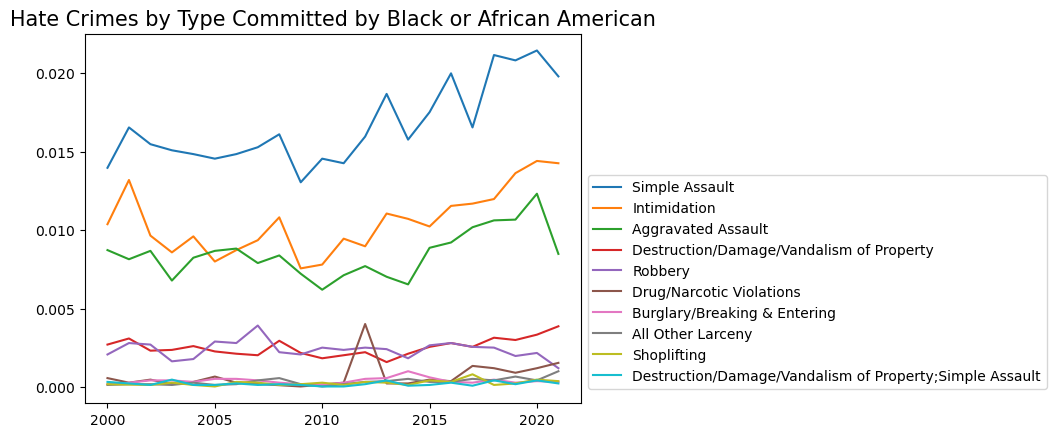

In [475]:
Hate_Crimes_Committed_by_Race_by_Type('Black or African American')

In [491]:
def Hate_Crimes_Committed_on_Race_by_Type(bias_desc):
    mask = hc['bias_desc'] == bias_desc
    top_offenses=hc[mask]['offense_name'].value_counts()[:10]
    top_offenses.index
    fig, ax = plt.subplots()
    for key in top_offenses.index: 
        of = hc[mask]['offense_name'] == key 
        aac = hc[mask & of].groupby('year')['offense_name'].count()/hc[mask].shape[0]
        ax.plot(aac, label= key)
    plt.title(f"Hate Crimes Type Against {bias_desc}", fontsize=15)
    fig.legend(bbox_to_anchor = (.9,.6),loc = 'upper left')

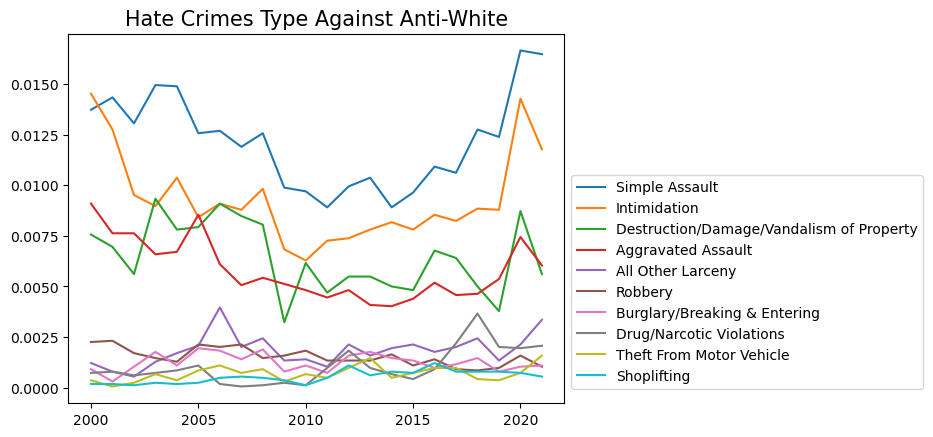

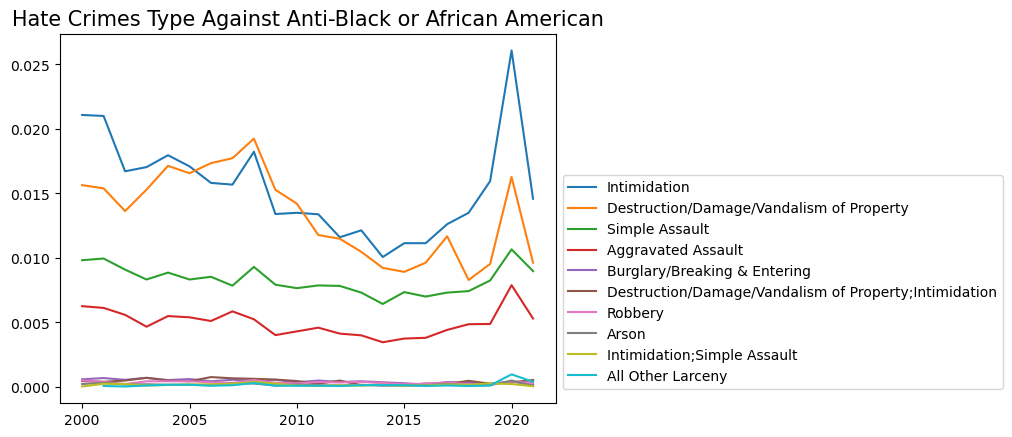

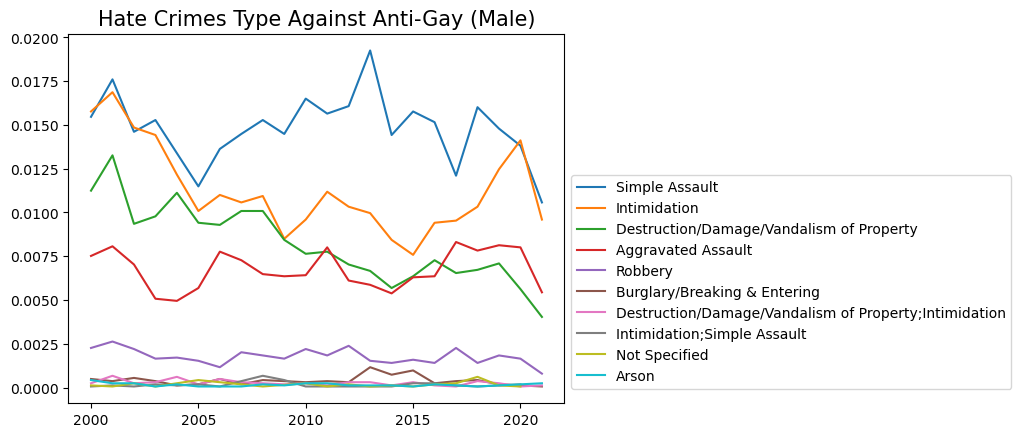

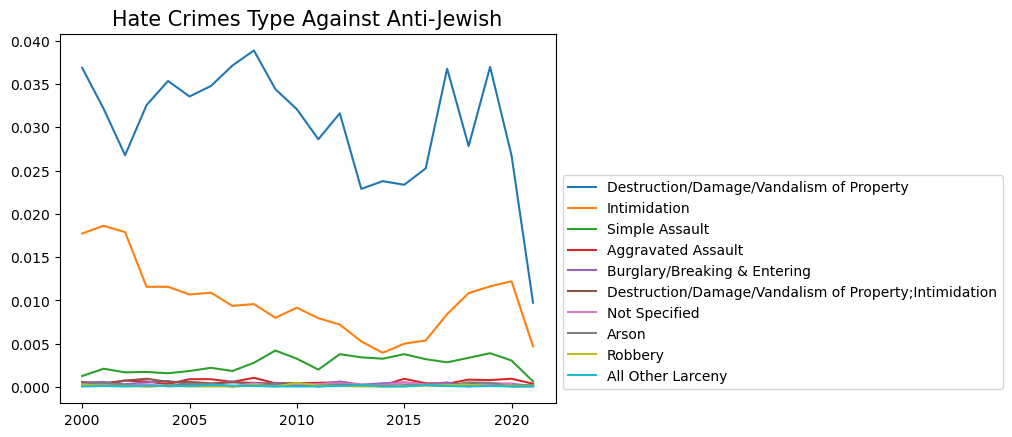

In [492]:
for cat in ['Anti-White', 'Anti-Black or African American', 'Anti-Gay (Male)', 'Anti-Jewish']:
    Hate_Crimes_Committed_on_Race_by_Type(cat)

In [407]:
hc.bias_desc.value_counts()[:5]

Anti-Black or African American    52229
Anti-Jewish                       19008
Anti-White                        16393
Anti-Gay (Male)                   16359
Anti-Hispanic or Latino           10541
Name: bias_desc, dtype: int64

In [408]:

hc.offender_race.value_counts()[:5]

Unknown                      64561
White                        63025
Black or African American    20617
Not Specified                 6807
Multiple                      3595
Name: offender_race, dtype: int64

In [414]:
#s is for string
l = [s.replace('Anti-','') for s in hc.bias_desc.value_counts()[:5].index]
l

['Black or African American',
 'Jewish',
 'White',
 'Gay (Male)',
 'Hispanic or Latino']

In [425]:
hc.offender_race.value_counts()

Unknown                                      64561
White                                        63025
Black or African American                    20617
Not Specified                                 6807
Multiple                                      3595
Asian                                         1116
American Indian or Alaska Native              1026
Native Hawaiian or Other Pacific Islander      101
Name: offender_race, dtype: int64

In [404]:
hc.groupby('bias_desc').count()#['offender_race']

pug_agency_name  \
bias_desc                                                             
Anti-American Indian or Alaska Native                          2165   
Anti-American Indian or Alaska Native;Anti-Asian                  4   
Anti-American Indian or Alaska Native;Anti-Asia...                1   
Anti-American Indian or Alaska Native;Anti-Blac...               10   
Anti-American Indian or Alaska Native;Anti-Blac...                1   
...                                                             ...   
Anti-Sikh                                                       440   
Anti-Transgender                                               1064   
Anti-Transgender;Anti-White                                       2   
Anti-White                                                    16393   
Unknown (offender's motivation not known)                         1   

                                                    pub_agency_unit  \
bias_desc                                                             
Anti-American Indian or Alaska Native                            71   
Anti-American Indian or Alaska Native;Anti-Asian                  0   
Anti-American Indian or Alaska Native;Anti-Asia...                0   
Anti-American Indian or Alaska Native;Anti-Blac...                0   
Anti-American Indian or Alaska Native;Anti-Blac...                0   
...                                                             ...   
Anti-Sikh                                                        14   
Anti-Transgender                                                 28   
Anti-Transgender;Anti-White                                       0   
Anti-White                                                      333   
Unknown (offender's motivation not known)                         0   

                                                    agency_type_name  \
bias_desc                                                              
Anti-American Indian or Alaska Native                           2165   
Anti-American Indian or Alaska Native;Anti-Asian                   4   
Anti-American Indian or Alaska Native;Anti-Asia...                 1   
Anti-American Indian or Alaska Native;Anti-Blac...                10   
Anti-American Indian or Alaska Native;Anti-Blac...                 1   
...                                                              ...   
Anti-Sikh                                                        440   
Anti-Transgender                                                1064   
Anti-Transgender;Anti-White                                        2   
Anti-White                                                     16393   
Unknown (offender's motivation not known)                          1   

                                                    state_abbr  state_name  \
bias_desc                                                                    
Anti-American Indian or Alaska Native                     2165        2165   
Anti-American Indian or Alaska Native;Anti-Asian             4           4   
Anti-American Indian or Alaska Native;Anti-Asia...           1           1   
Anti-American Indian or Alaska Native;Anti-Blac...          10          10   
Anti-American Indian or Alaska Native;Anti-Blac...           1           1   
...                                                        ...         ...   
Anti-Sikh                                                  440         440   
Anti-Transgender                                          1064        1064   
Anti-Transgender;Anti-White                                  2           2   
Anti-White                                               16393       16393   
Unknown (offender's motivation not known)                    1           1   

                                                    month    day   year  \
bias_desc                                                                 
Anti-American Indian or Alaska Native                2165   2165   2165   
Anti-American Indian or Ala

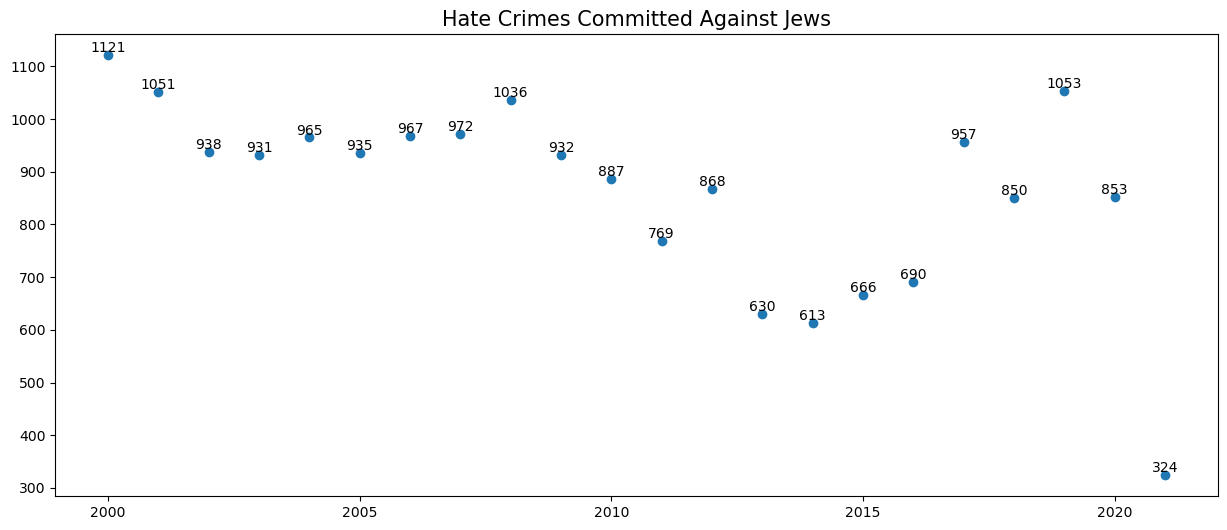

In [254]:
x= hc[aj].year.value_counts().index
y= hc[aj].year.value_counts().values
plt.figure(figsize=(15, 6))

plt.scatter(x, y)
plt.title("Hate Crimes Committed Against Jews", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

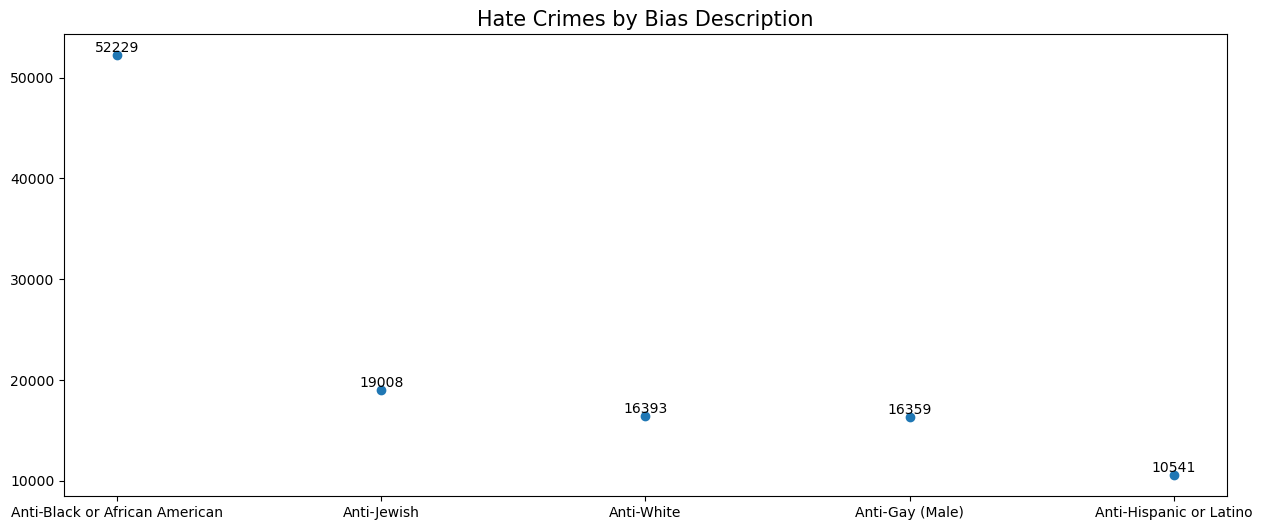

In [144]:
x= hc.bias_desc.value_counts()[:5].index
y= hc.bias_desc.value_counts()[:5].values
plt.figure(figsize=(15, 6))

plt.scatter(x, y)
plt.title("Hate Crimes by Bias Description", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [ ]:
##################

In [ ]:
#Looking at how hate crimes have increased across groups/race over the last twenty years
####
####
####
####

In [364]:
OR=hc['offender_race'].unique()[:5]

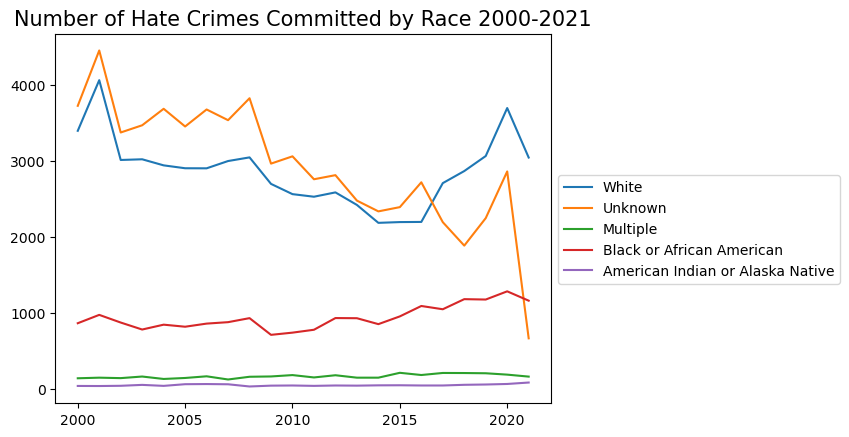

In [493]:
#blacks committing hate crimes has slowly risen since obama took office in 2008
#Whites increased when Trump go elected at a larger scale than blacks when Obama got elected
#Unknown has continued to come down pretty drastically which makes me wonder if we're getting better about reporting them

fig, ax = plt.subplots()
for offender in OR:
    mask=hc['offender_race']==offender
    race=hc[mask].groupby('year')['year'].count()
    ax.plot(race, label= offender)
plt.title("Number of Hate Crimes Committed by Race 2000-2021", fontsize=15)
fig.legend(bbox_to_anchor = (.9,.6),loc = 'upper left')

In [358]:
#End of looking at hate crimes by race
####
####
###

In [ ]:
#######Beginning of looking at Hate Crimes by Location########

In [375]:
hc.location_name.value_counts()[:5]

Residence/Home                        48811
Highway/Road/Alley/Street/Sidewalk    28862
Other/Unknown                         18118
School/College                        11562
Parking/Drop Lot/Garage                9546
Name: location_name, dtype: int64

In [376]:
here=hc['location_name'].unique()[:5]

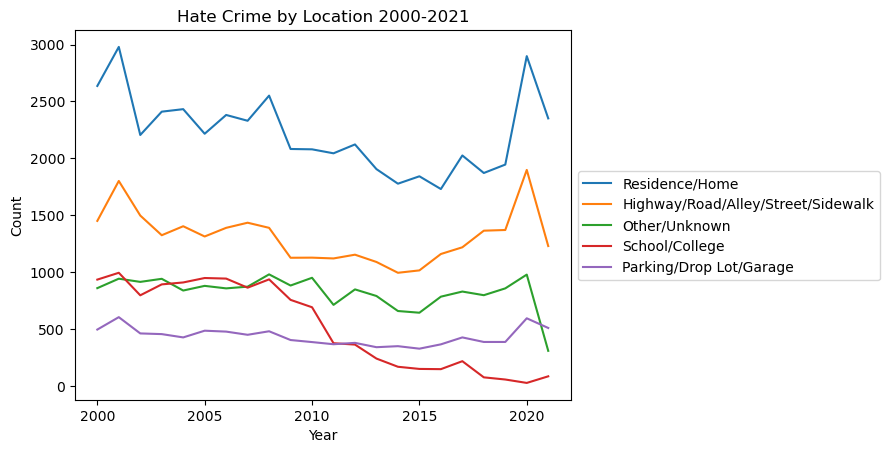

In [494]:
import matplotlib.pyplot as plt
#interesting given that hate crimes on campus are falling
# Assuming 'here' is a list of location names
here = ['Residence/Home', 'Highway/Road/Alley/Street/Sidewalk', 'Other/Unknown', 'School/College', 'Parking/Drop Lot/Garage']

fig, ax = plt.subplots()

for loc in here:
    mask = hc['location_name'] == loc
    hey = hc[mask].groupby('year')['year'].count()
    ax.plot(hey, label=loc)

ax.set_title('Hate Crime by Location 2000-2021')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
fig.legend(bbox_to_anchor = (.9,.6),loc = 'upper left')
plt.show()


In [ ]:
########
######
#End of Analysis

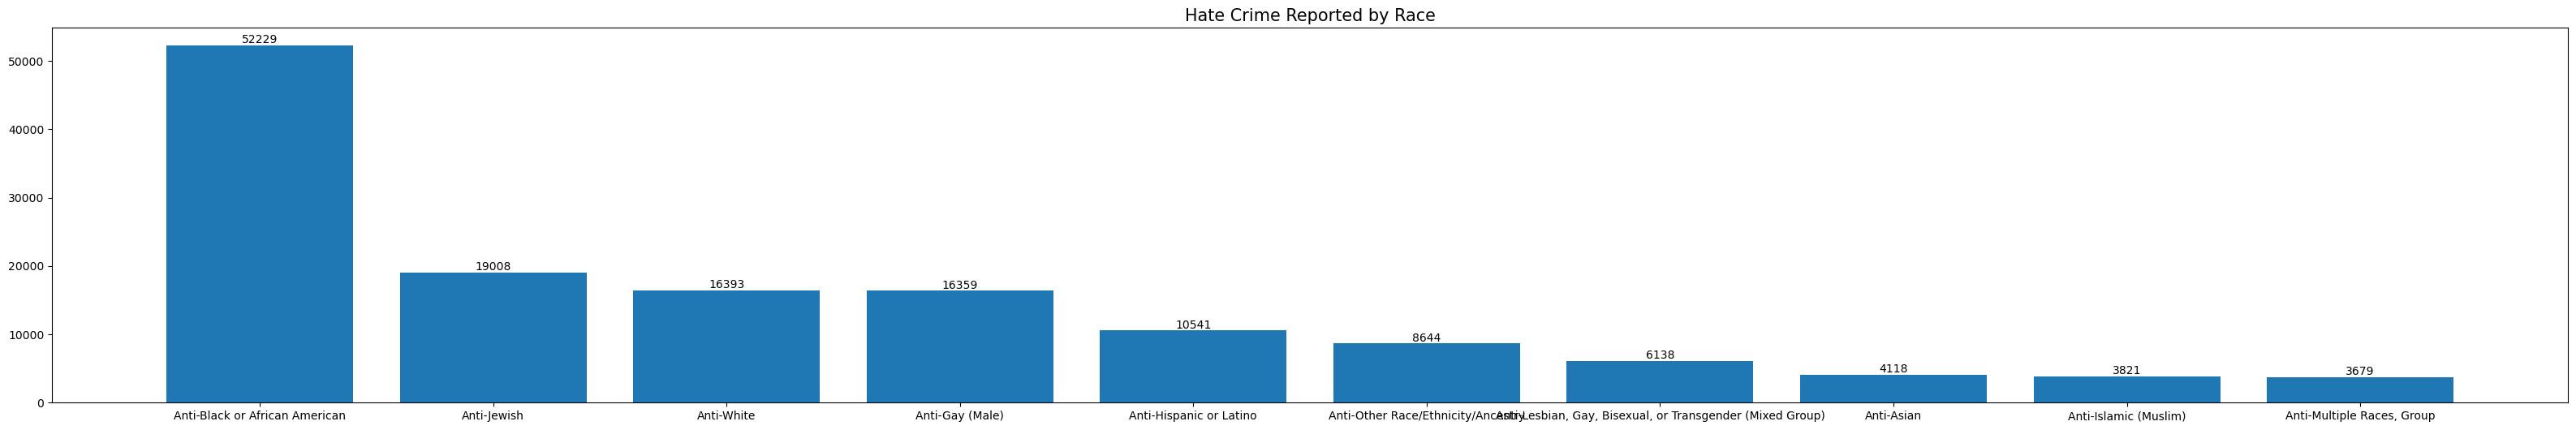

In [145]:
x= hc.bias_desc.value_counts()[:10].index
y= hc.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [147]:
hc.state_name.value_counts()[:5]

California       26176
New Jersey       13503
New York         12222
Michigan          9831
Massachusetts     8488
Name: state_name, dtype: int64

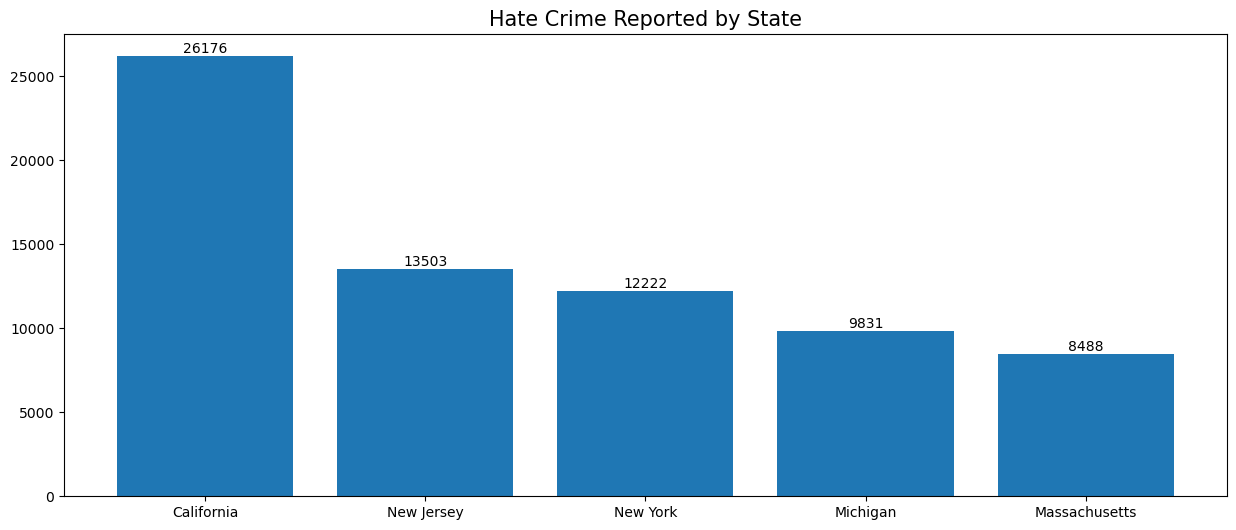

In [148]:
x= hc.state_name.value_counts()[:5].index
y= hc.state_name.value_counts()[:5].values
plt.figure(figsize=(15, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by State", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

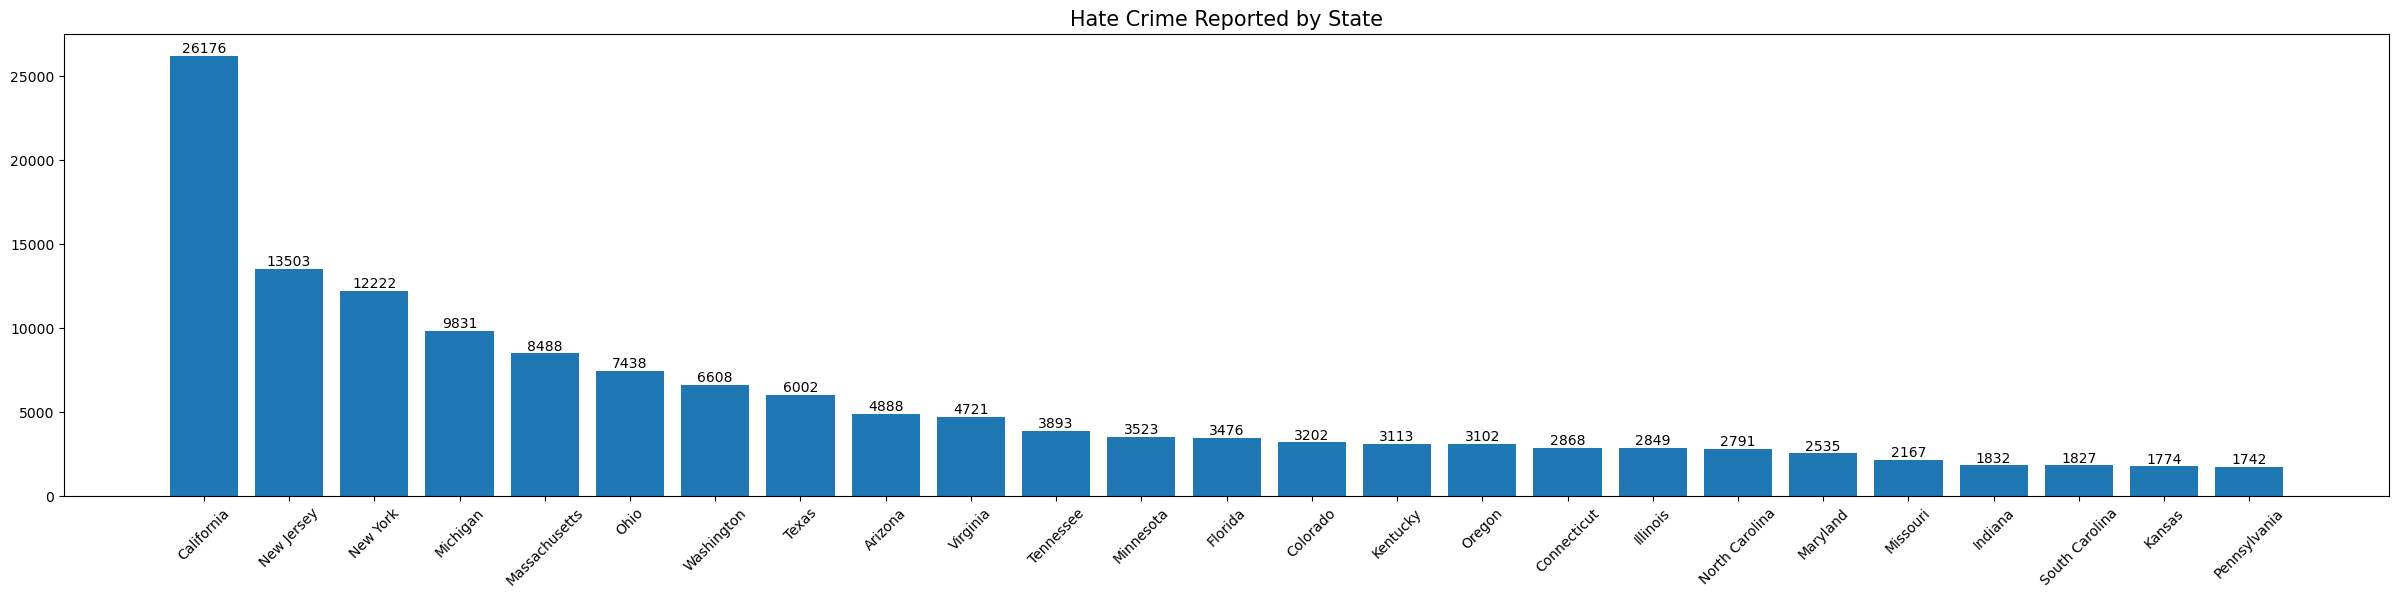

In [149]:
x= hc.state_name.value_counts()[:25].index
y= hc.state_name.value_counts()[:25].values
plt.figure(figsize=(30, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by State", fontsize=15)

plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

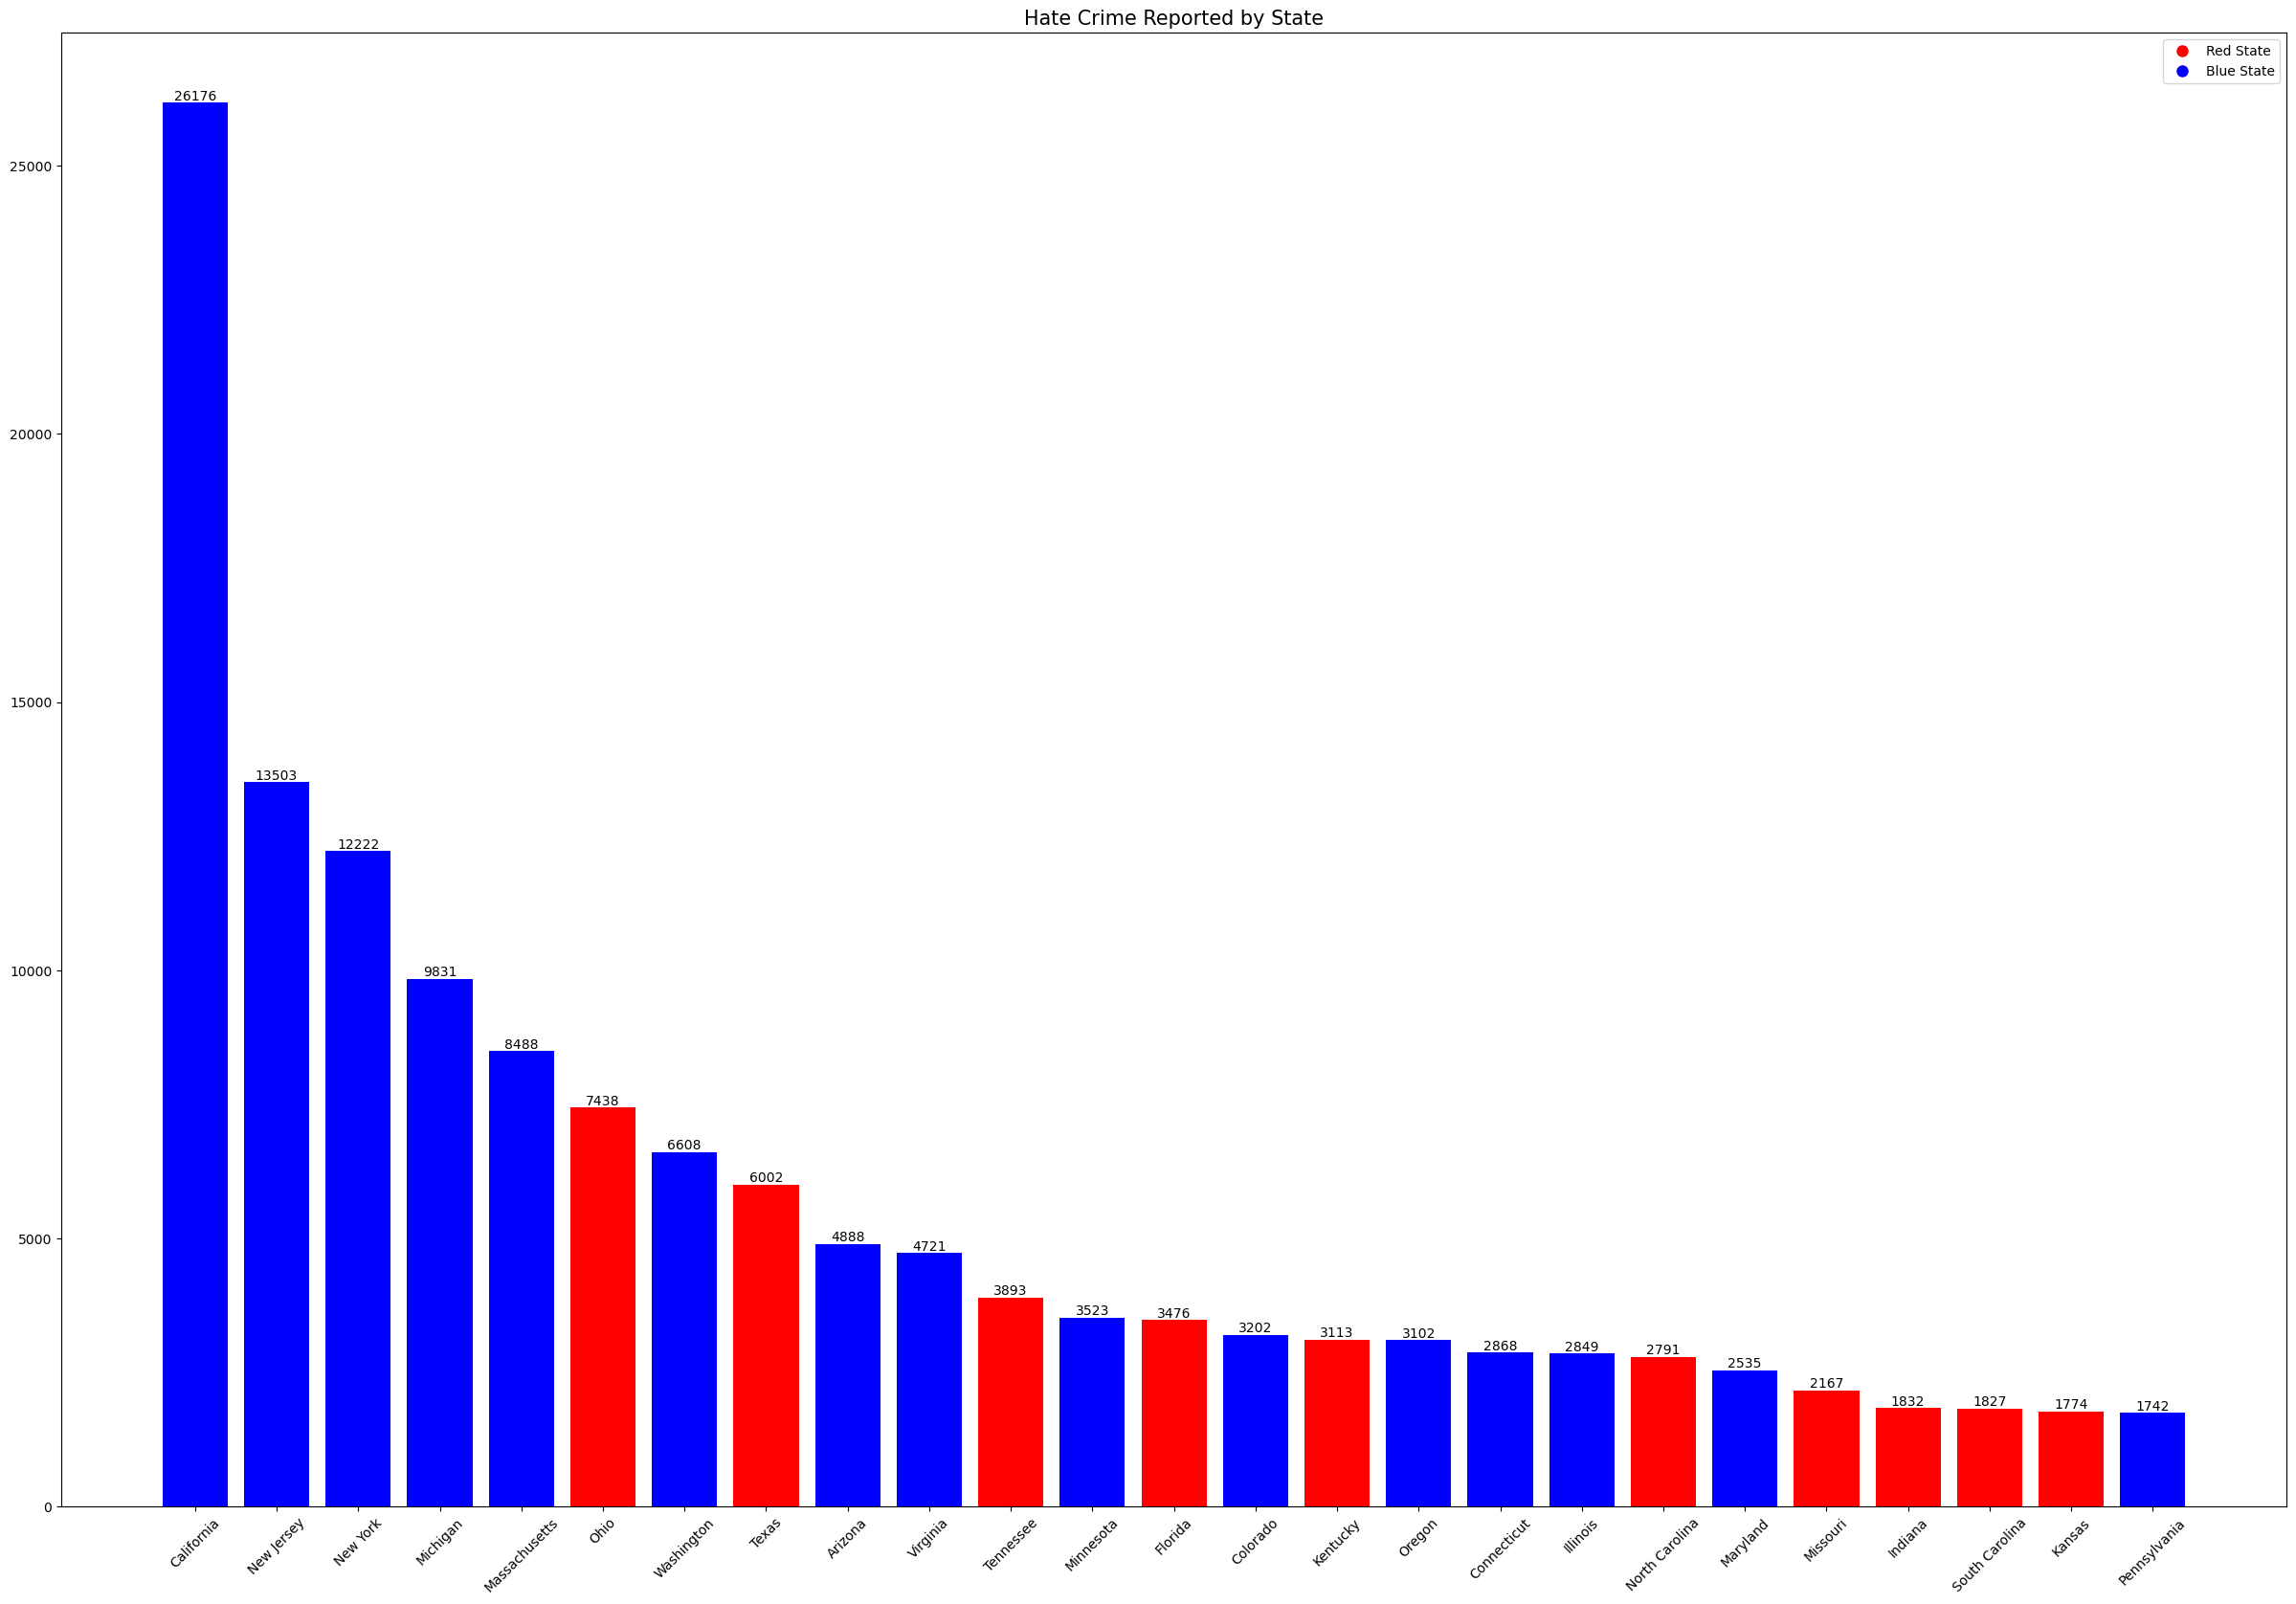

In [486]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Sample data
x = hc.state_name.value_counts()[:25].index
y = hc.state_name.value_counts()[:25].values

# Define a color mapping based on state names
color_mapping = {'Texas': 'red', 'California': 'blue', 'New York': 'blue', 'Florida': 'red', 'Ohio': 'red', 'New Jersey': 'blue', 'Michigan': 'blue', 'Massachusetts': 'blue', 'Washington': 'blue', 'Arizona': 'blue', 'Virginia': 'blue', 'Tennessee': 'red', 'Minnesota': 'blue', 'Colorado': 'blue', 'Kentucky': 'red', 'Oregon': 'blue', 'Connecticut': 'blue', 'Illinois': 'blue', 'North Carolina': 'red', 'Maryland': 'blue', 'Missouri': 'red', 'Indiana': 'red', 'South Carolina': 'red', 'Pennsylvania': 'blue', 'Kansas': 'red',}

# Map colors to states
colors = [color_mapping[state] if state in color_mapping else 'gray' for state in x]

plt.figure(figsize=(30, 20))

# Use the 'color' parameter to set the colors
bars = plt.bar(x, y, color=colors)
plt.title("Hate Crime Reported by State", fontsize=15)

# Add a legend
red_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Red State')
blue_patch = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Blue State')
plt.legend(handles=[red_patch, blue_patch])

plt.xticks(rotation=45)  # Rotate names for readability

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(y[i]), ha='center', va='bottom')

plt.show()


In [151]:
print(hc.columns)

Index(['pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr',
       'state_name', 'month', 'day', 'year', 'adult_victim_count',
       'juvenile_victim_count', 'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types'],
      dtype='object')


In [152]:
hc.location_name.value_counts()[:10]

Residence/Home                        48811
Highway/Road/Alley/Street/Sidewalk    28862
Other/Unknown                         18118
School/College                        11562
Parking/Drop Lot/Garage                9546
Church/Synagogue/Temple/Mosque         6282
Restaurant                             3476
Commercial/Office Building             3448
School-Elementary/Secondary            3071
Bar/Nightclub                          2800
Name: location_name, dtype: int64

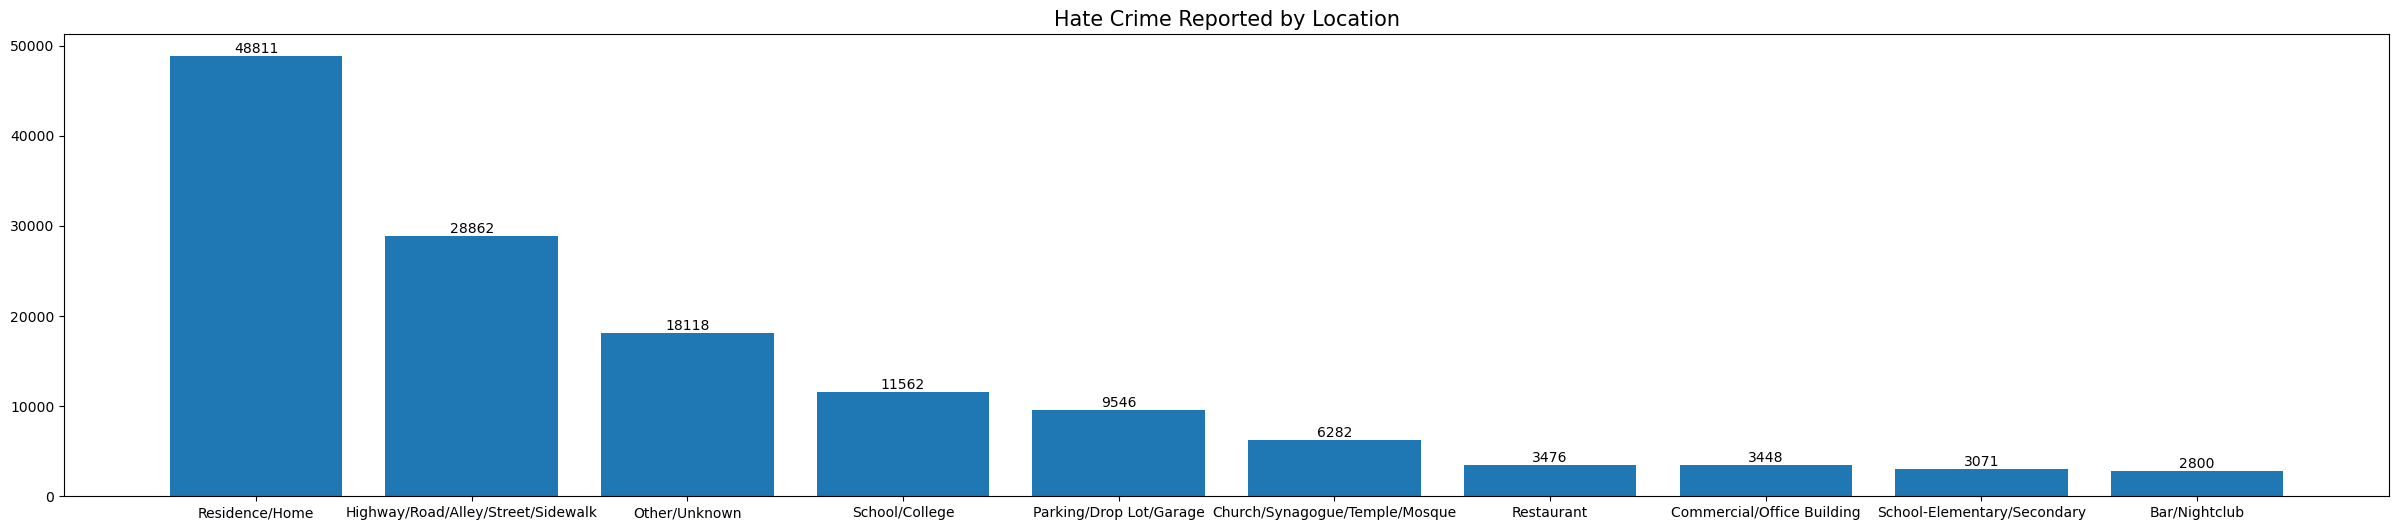

In [153]:
#are hc's committed at home more premeditated compared to hc's committeed in public?
x= hc.location_name.value_counts()[:10].index
y= hc.location_name.value_counts()[:10].values
plt.figure(figsize=(30, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Location", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [154]:
hc.pug_agency_name.value_counts()[:10]

New York         6365
Los Angeles      6209
Boston           3182
Phoenix          2742
Columbus         1812
Washington       1806
Seattle          1795
State Police:    1667
San Diego        1617
San Francisco    1578
Name: pug_agency_name, dtype: int64

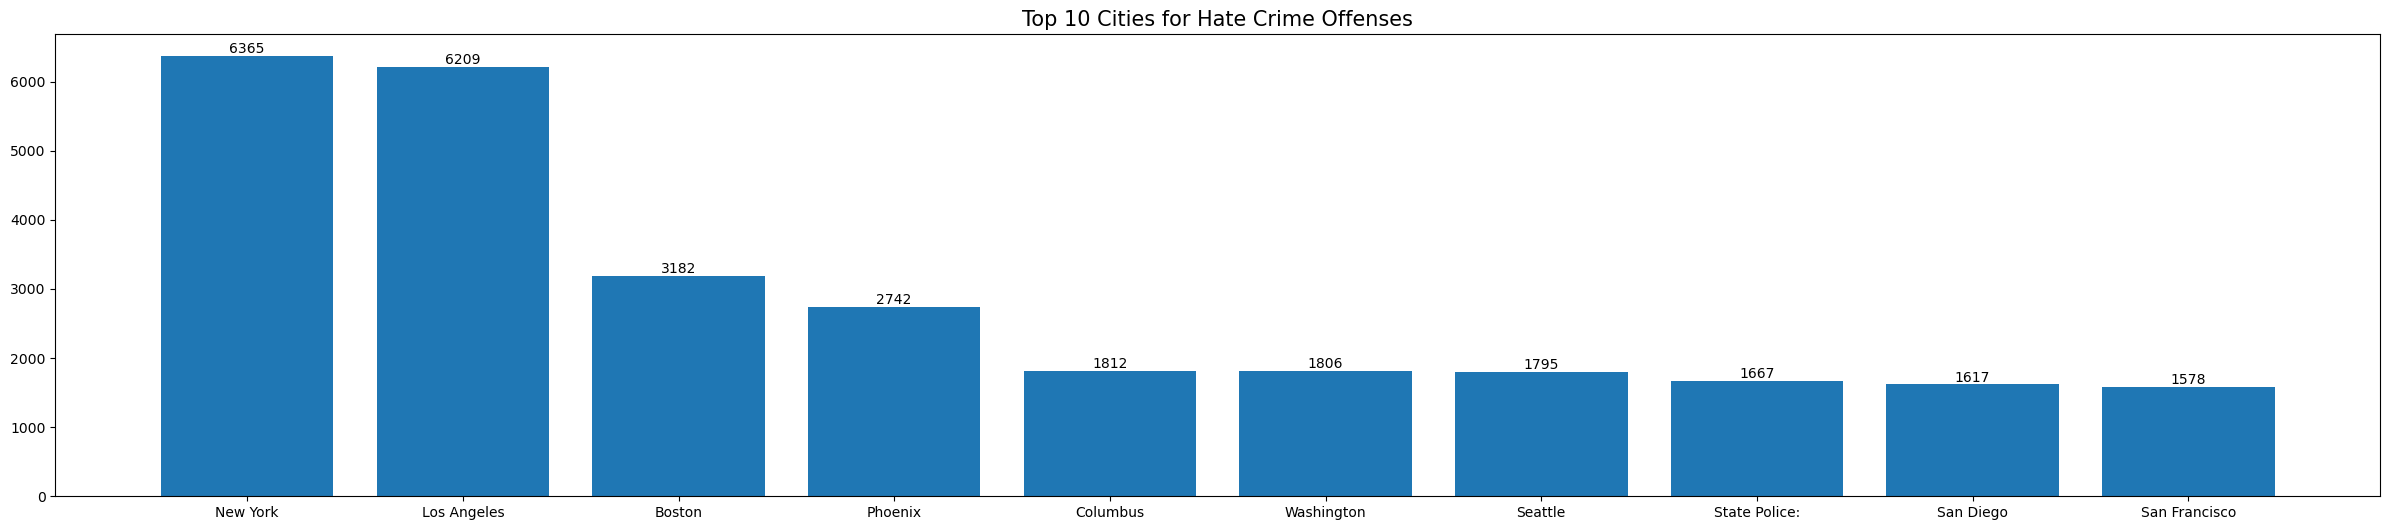

In [495]:
x= hc.pug_agency_name.value_counts()[:10].index
y= hc.pug_agency_name.value_counts()[:10].values
plt.figure(figsize=(30, 6))

plt.bar(x, y)
plt.title("Top 10 Cities for Hate Crime Offenses", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [156]:
top_number = 10
df_ca = hc.query("state_name == 'California'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
list_cities_CA = list(df_ca.head(top_number)['pug_agency_name']) # Guard 'top_number' cities

In [157]:
df_ca.head(top_number)

pug_agency_name  count
0                Los Angeles   6209
1                  San Diego   1617
2              San Francisco   1578
3                 Sacramento    756
4                   San Jose    694
5                  Riverside    612
6                 Long Beach    367
7                     Fresno    292
8  University of California:    277
9                 Santa Cruz    272

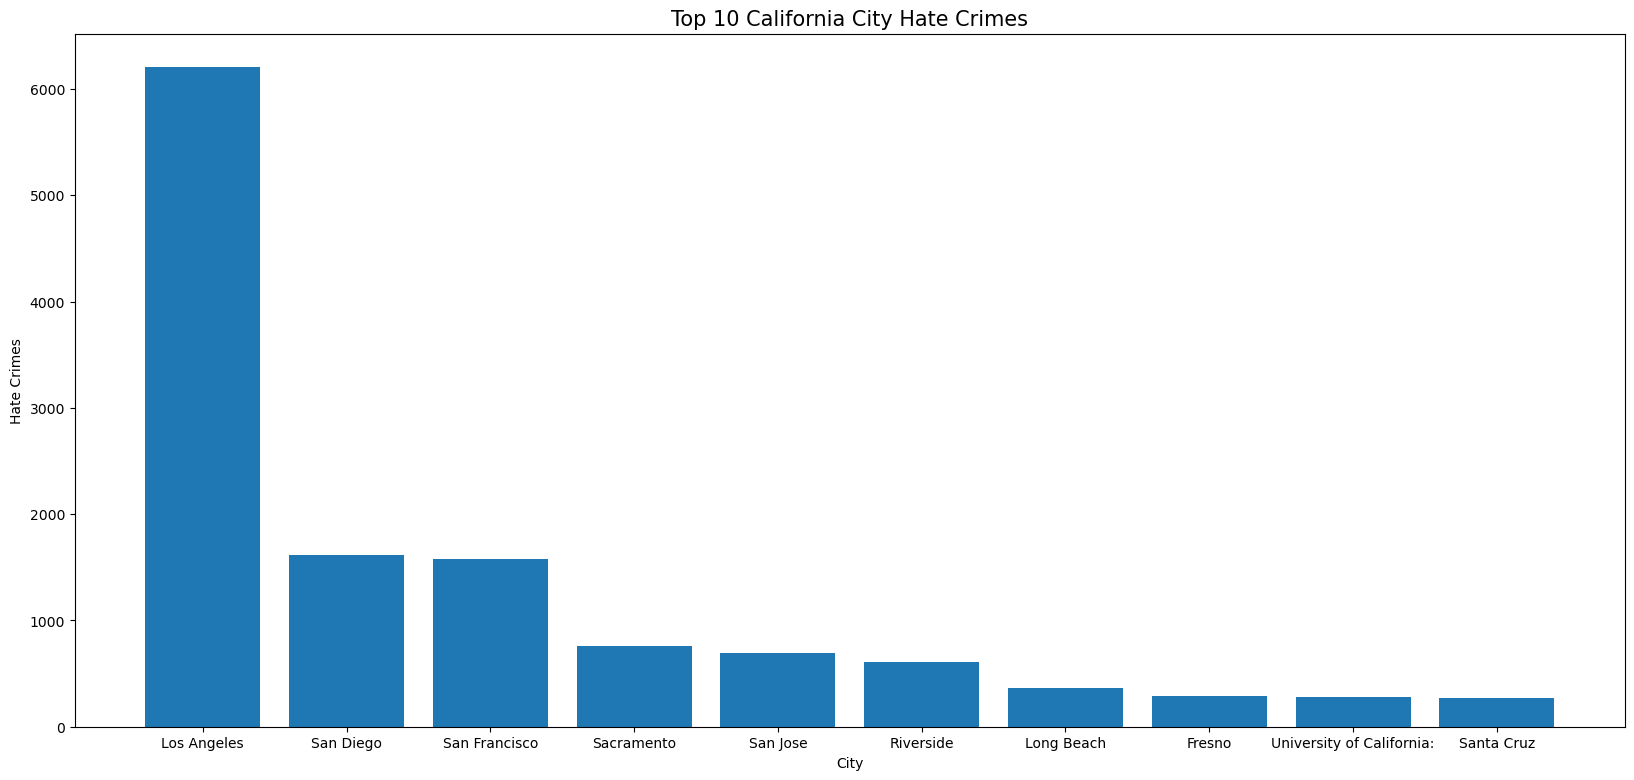

In [158]:
fig, ax = plt.subplots(figsize=(20,9))
ax.bar(df_ca.head(top_number)["pug_agency_name"], df_ca.head(top_number)["count"], width=0.8)
ax.set_title('Top 10 California City Hate Crimes',color = 'black',fontsize=15)
ax.set_xlabel("City")
ax.set_ylabel("Hate Crimes")
plt.show()

In [159]:
top_number = 10
df_nj = hc.query("state_name == 'New Jersey'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
list_cities_NJ = list(df_nj.head(top_number)['pug_agency_name']) # Guard 'top_number' cities

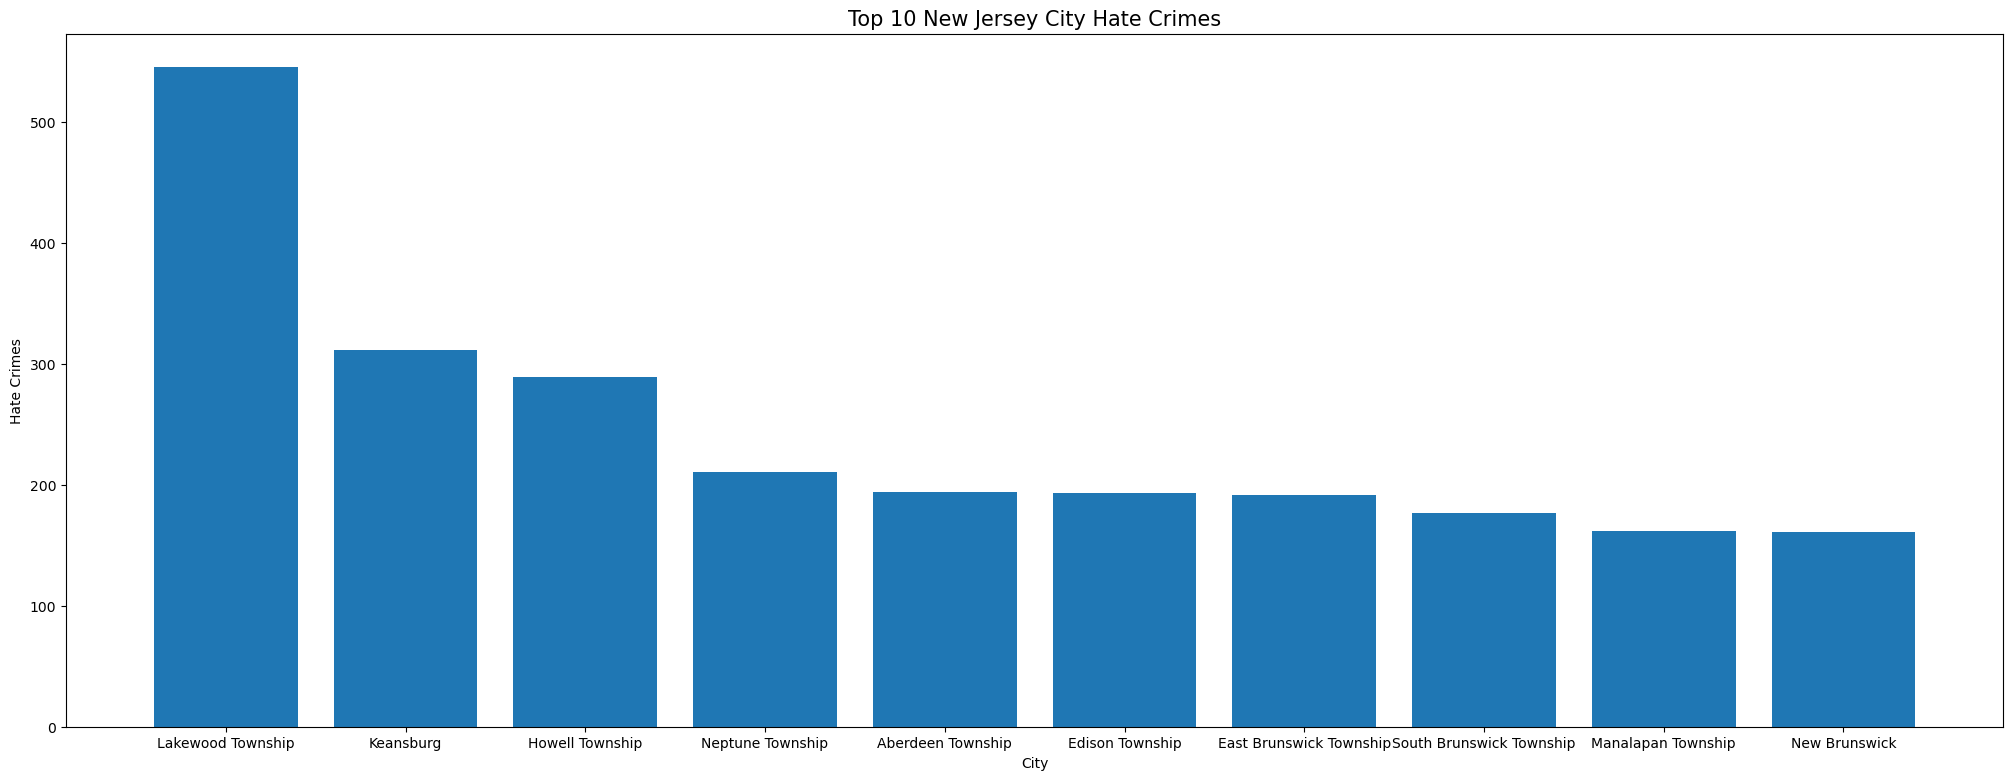

In [160]:
fig, ax = plt.subplots(figsize=(25,9))
ax.bar(df_nj.head(top_number)["pug_agency_name"], df_nj.head(top_number)["count"], width=0.8)
ax.set_title('Top 10 New Jersey City Hate Crimes',color = 'black',fontsize=15)
ax.set_xlabel("City")
ax.set_ylabel("Hate Crimes")
plt.show()

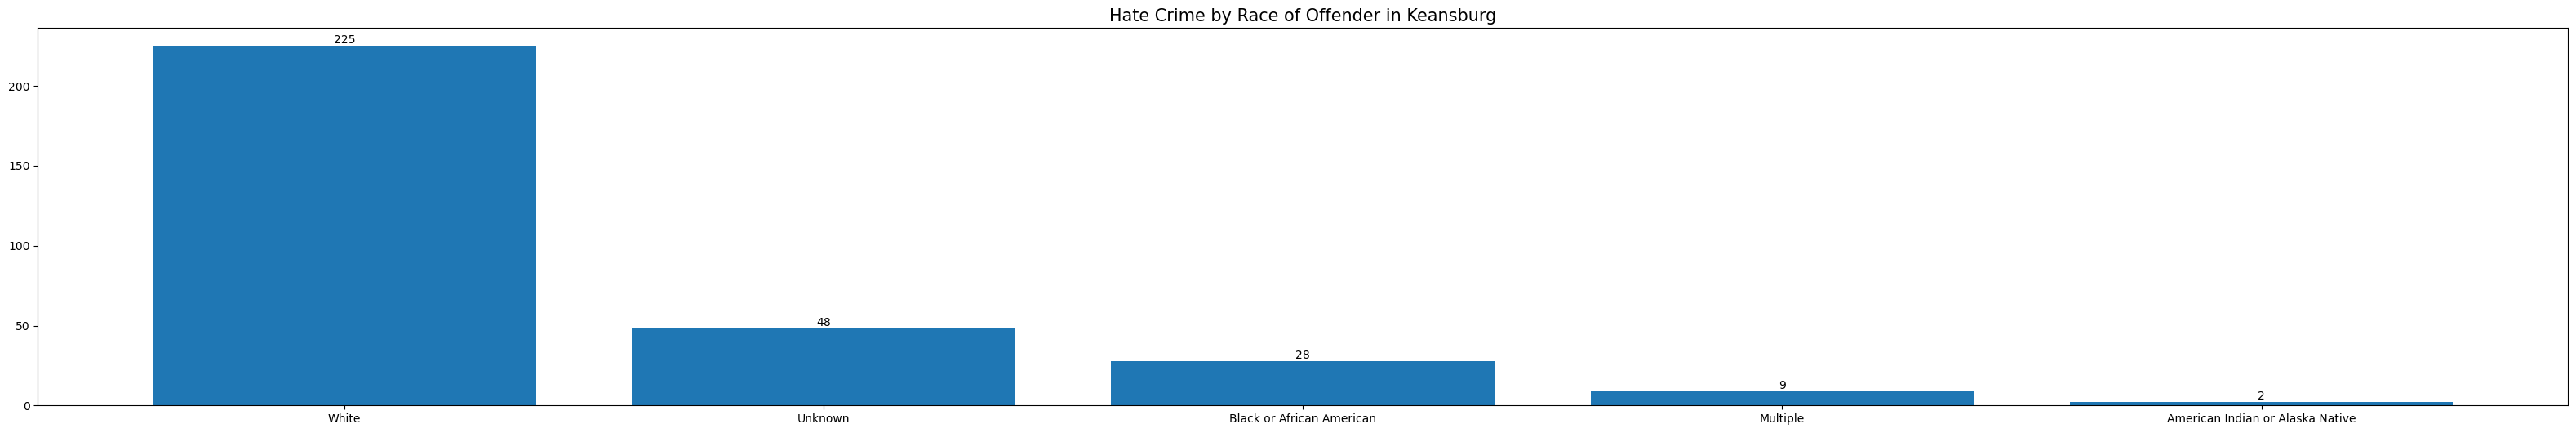

In [161]:
city_mask = hc['pug_agency_name'] == 'Keansburg'
state_mask = hc['state_name'] == 'New Jersey'

kb = hc[city_mask & state_mask] # a dataframe of only city, state

x= kb.offender_race.value_counts()[:10].index
y= kb.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Keansburg", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

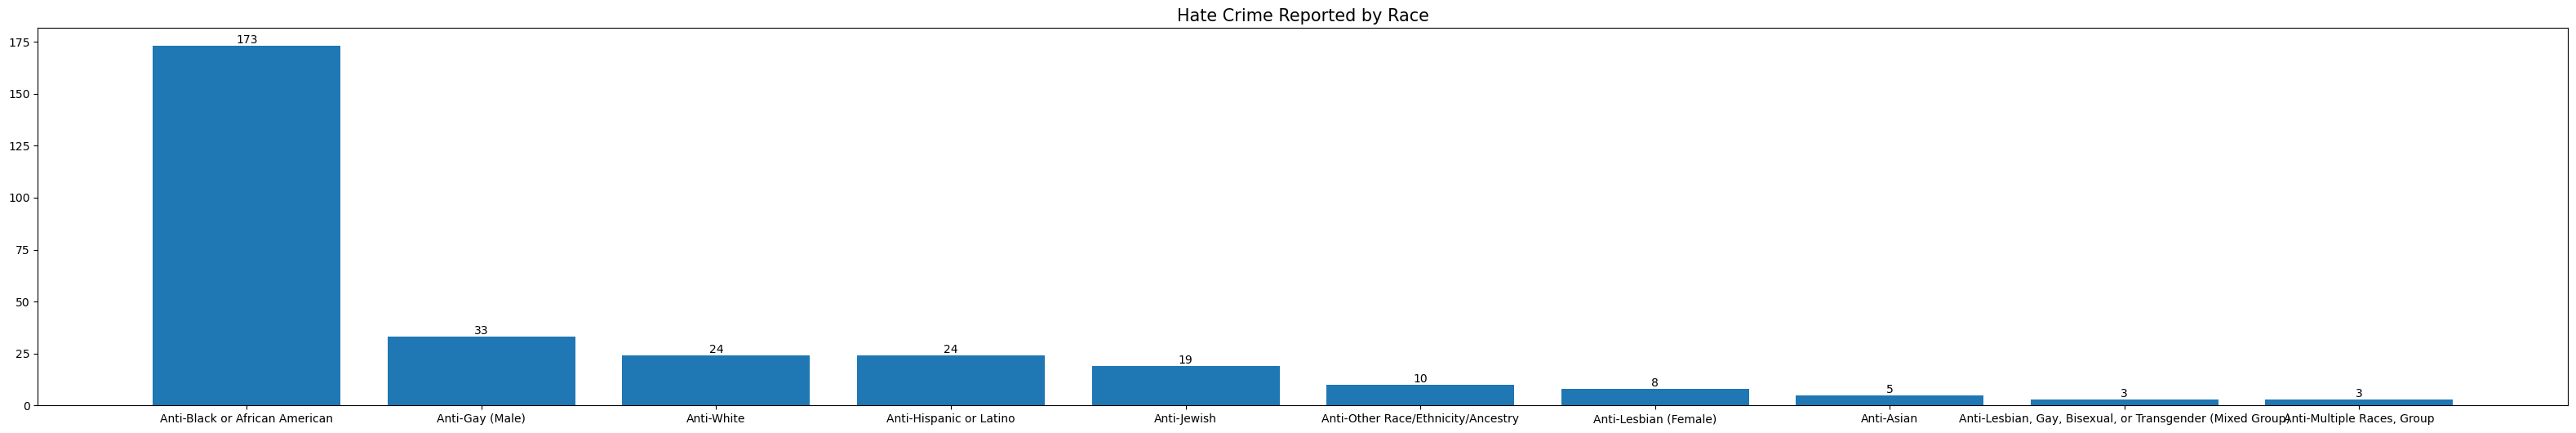

In [162]:
x= kb.bias_desc.value_counts()[:10].index
y= kb.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [163]:
top_number = 10
df_ny = hc.query("state_name == 'New York'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
list_cities_NY = list(df_ny.head(top_number)['pug_agency_name']) # Guard 'top_number' cities

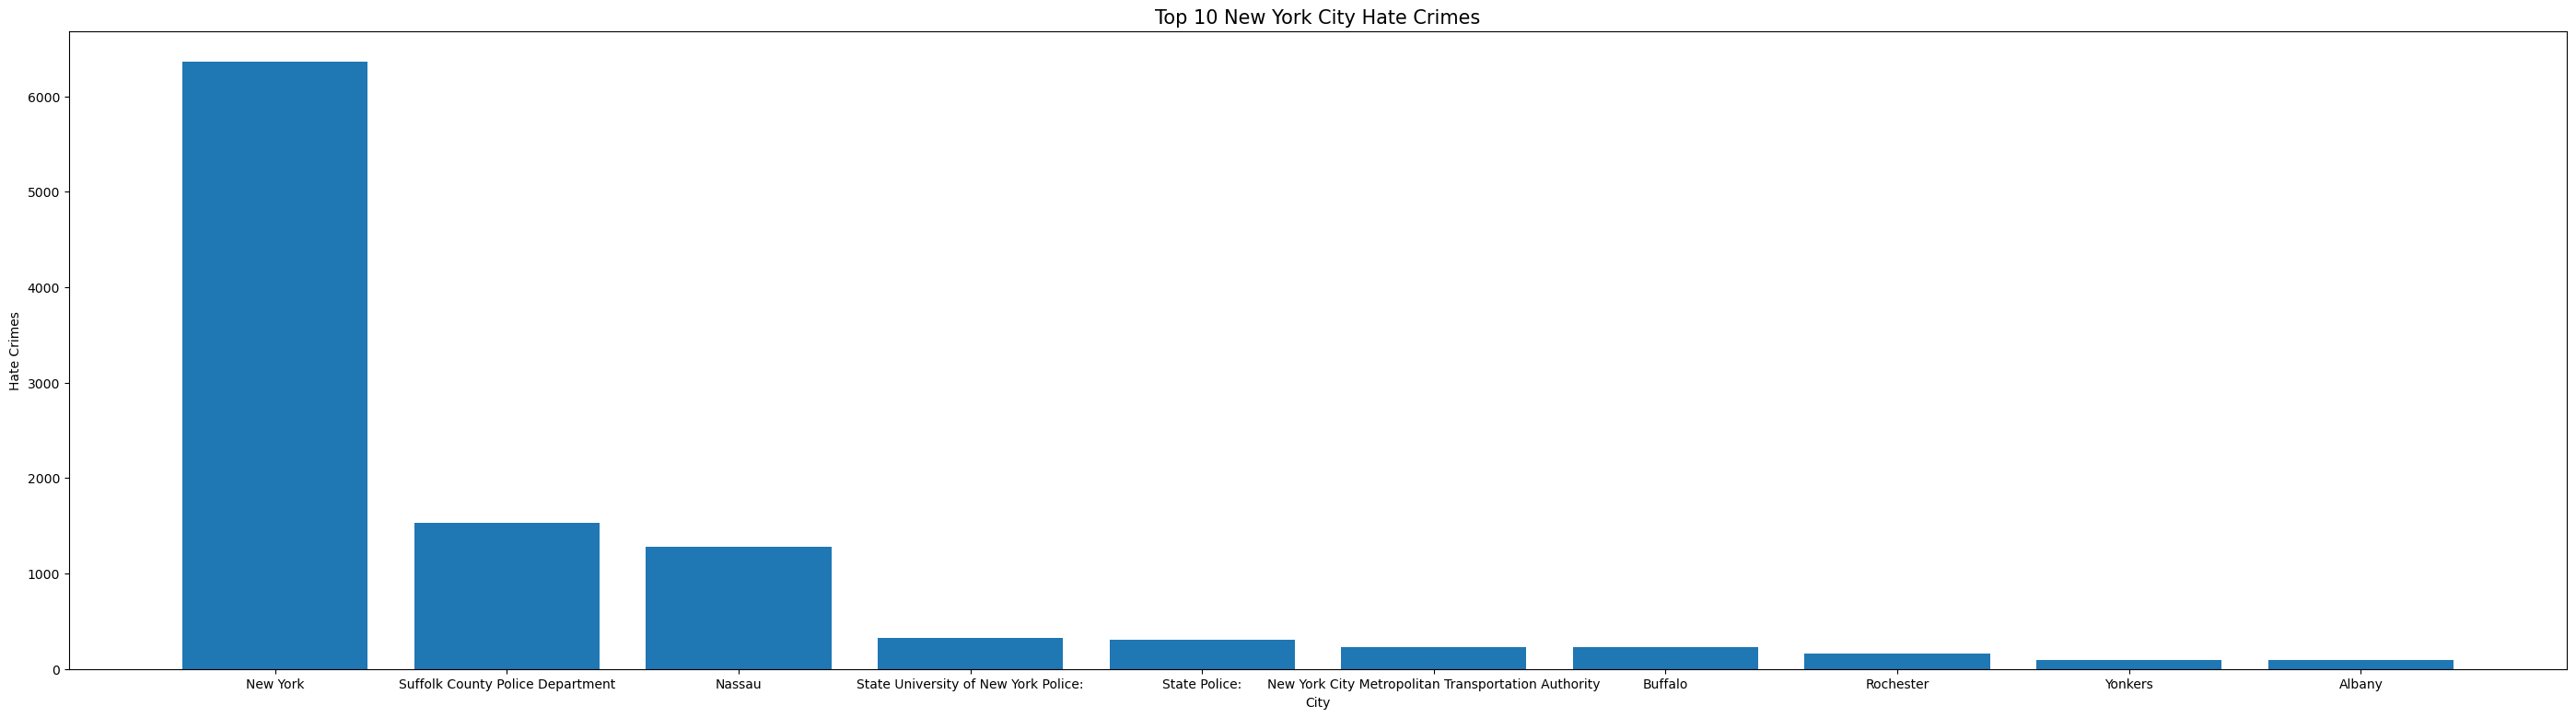

In [164]:
fig, ax = plt.subplots(figsize=(35,9))
ax.bar(df_ny.head(top_number)["pug_agency_name"], df_ny.head(top_number)["count"], width=0.8)
ax.set_title('Top 10 New York City Hate Crimes',color = 'black',fontsize=15)
ax.set_xlabel("City")
ax.set_ylabel("Hate Crimes")
plt.show()

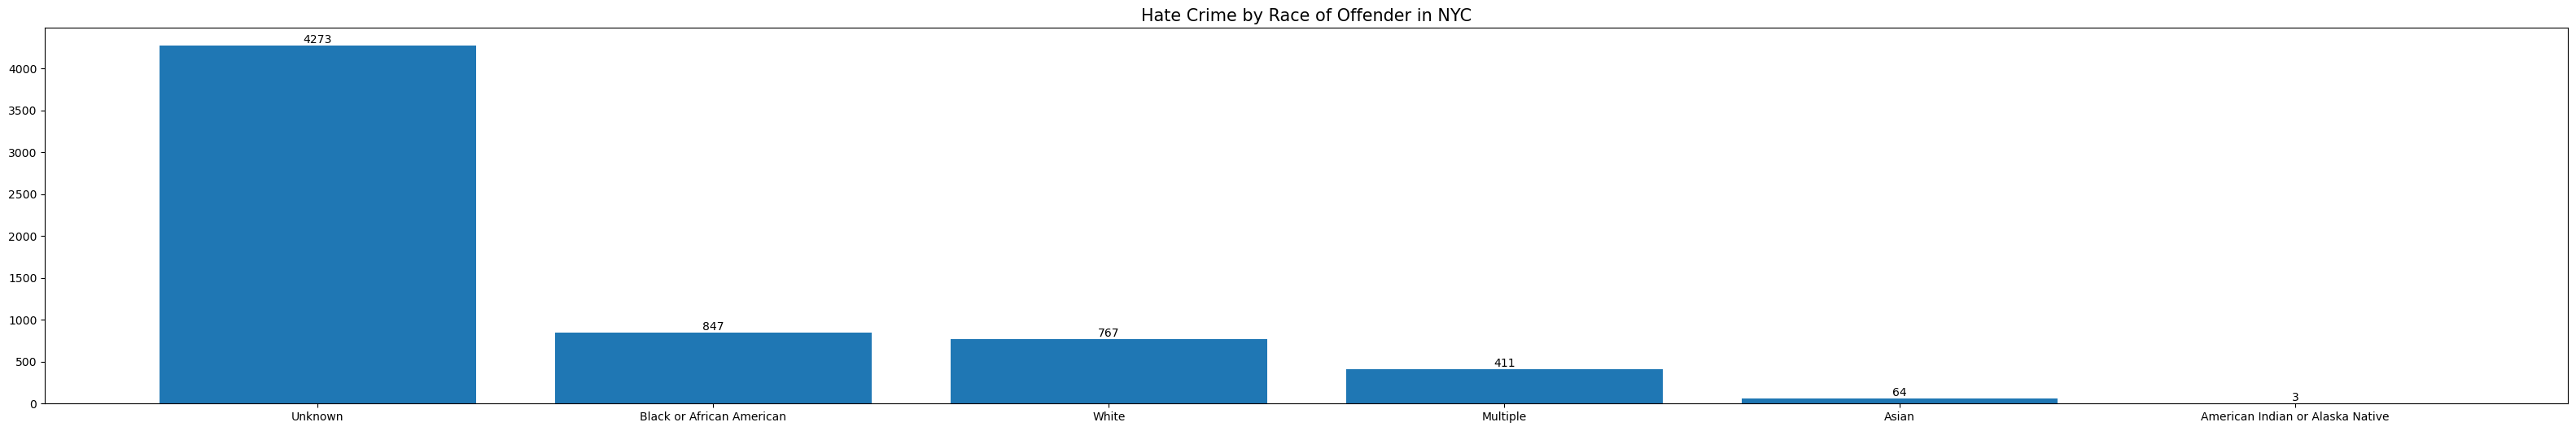

In [165]:
city_mask = hc['pug_agency_name'] == 'New York'
state_mask = hc['state_name'] == 'New York'

NYC = hc[city_mask & state_mask] # a dataframe of only city, state

x= NYC.offender_race.value_counts()[:10].index
y= NYC.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in NYC", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

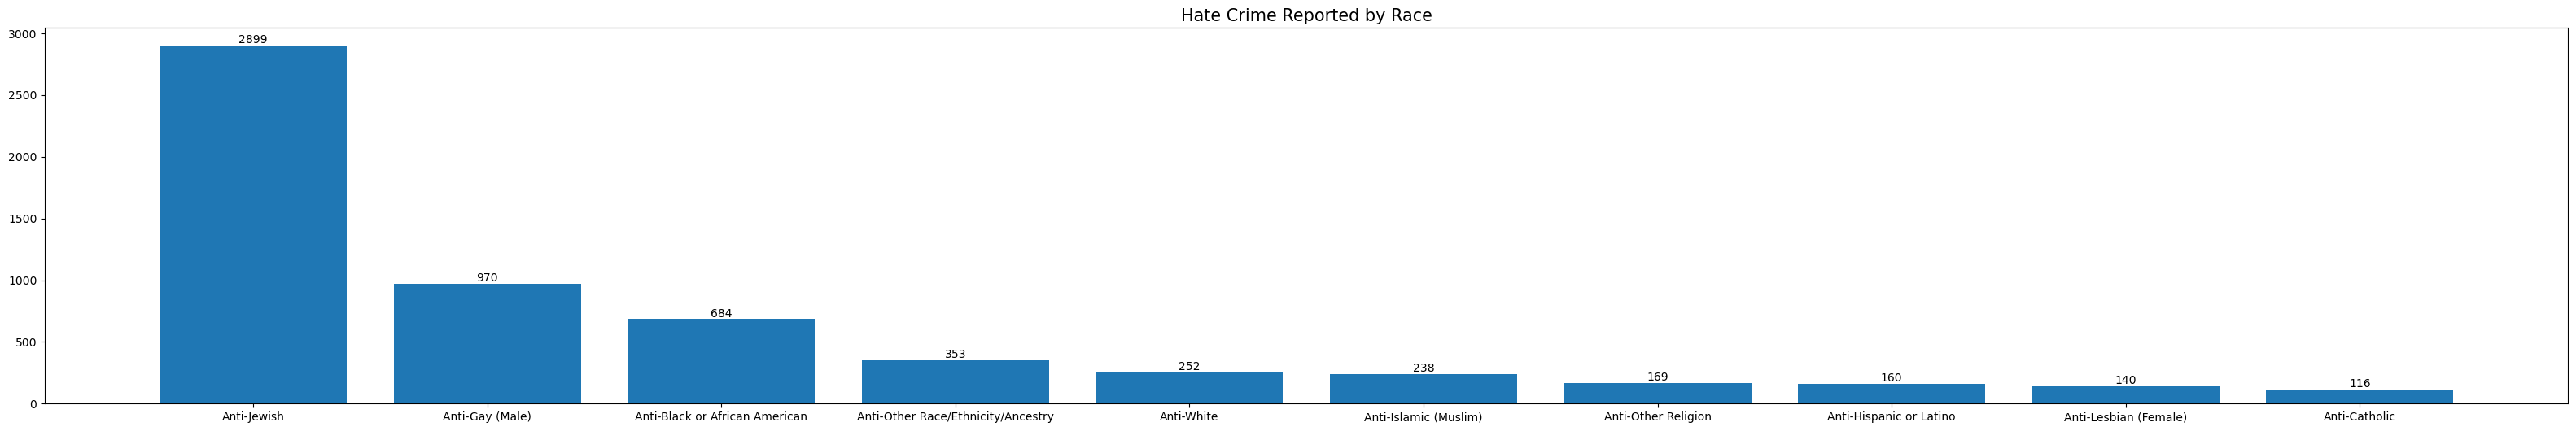

In [166]:
x= NYC.bias_desc.value_counts()[:10].index
y= NYC.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [167]:
top_number = 10
df_mi = hc.query("state_name == 'Michigan'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
list_cities_mi = list(df_mi.head(top_number)['pug_agency_name']) # Guard 'top_number' cities

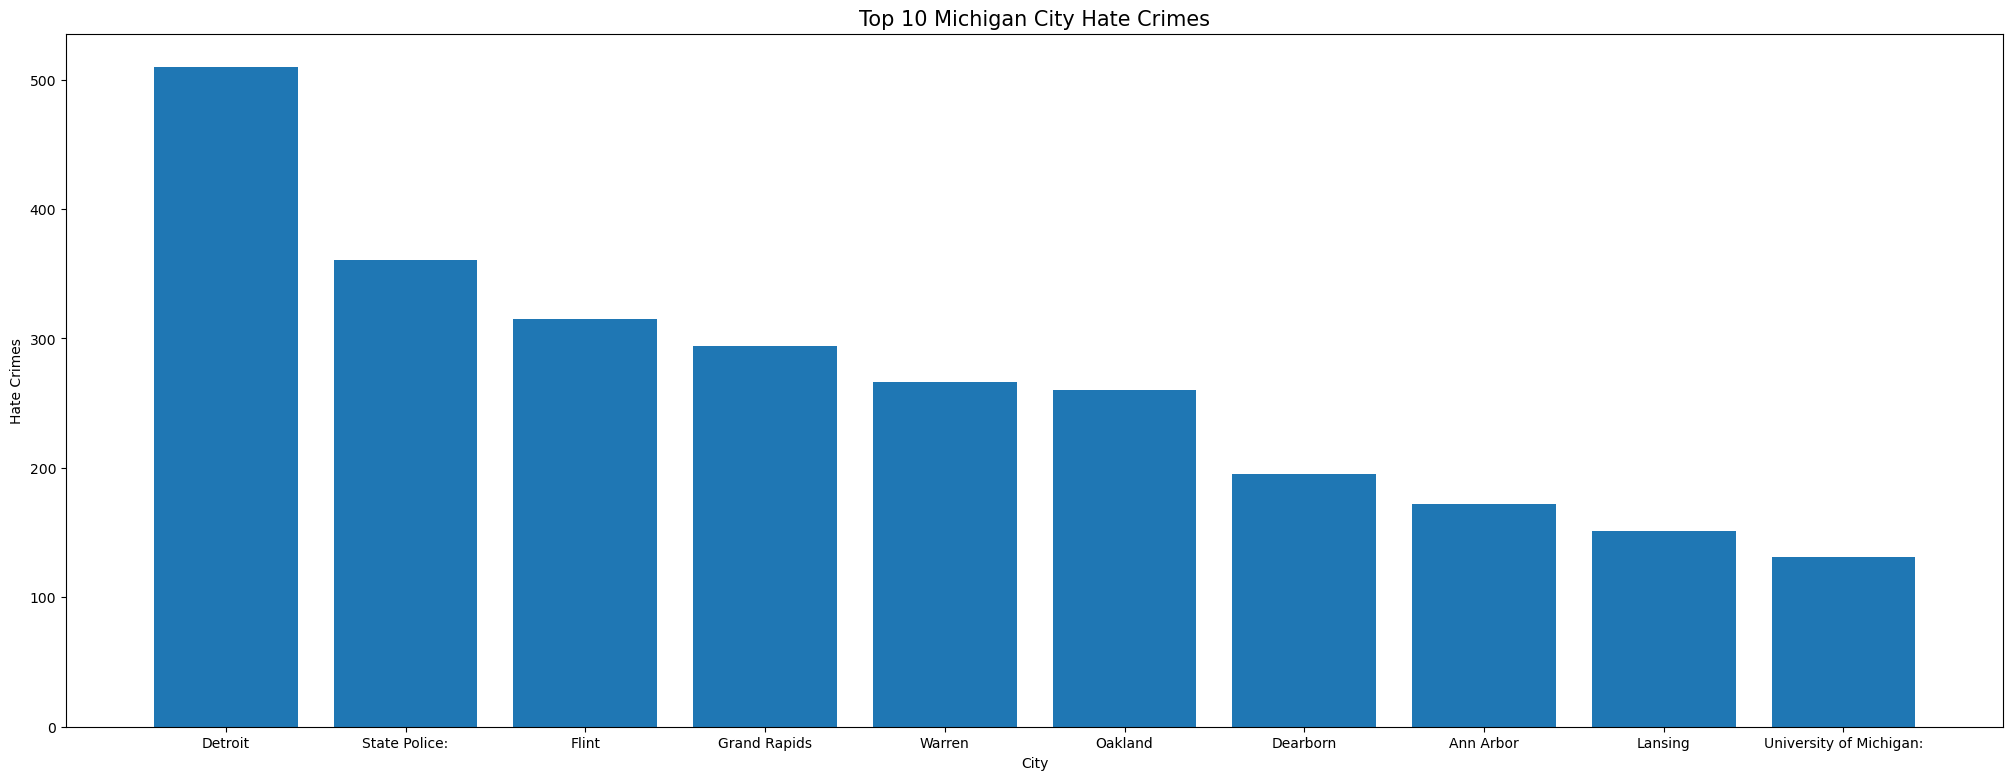

In [168]:
fig, ax = plt.subplots(figsize=(25,9))
ax.bar(df_mi.head(top_number)["pug_agency_name"], df_mi.head(top_number)["count"], width=0.8)
ax.set_title('Top 10 Michigan City Hate Crimes',color = 'black',fontsize=15)
ax.set_xlabel("City")
ax.set_ylabel("Hate Crimes")
plt.show()

In [169]:
top_number = 10
df_ma = hc.query("state_name == 'Massachusetts'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
list_cities_ma = list(df_ma.head(top_number)['pug_agency_name']) # Guard 'top_number' cities

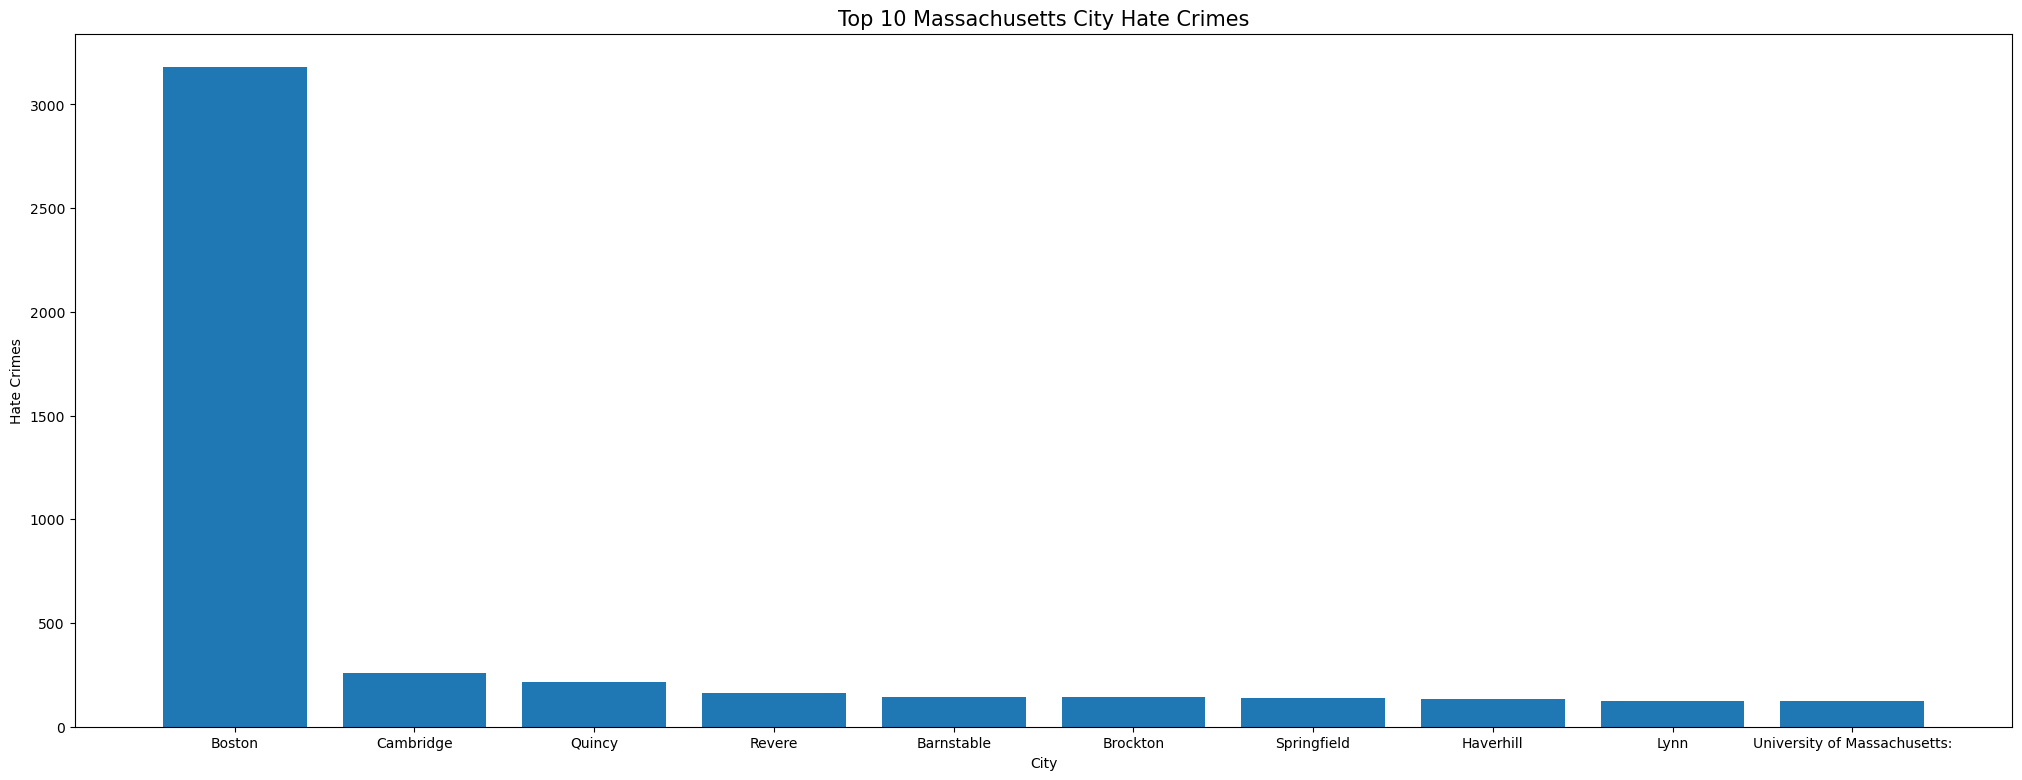

In [170]:
fig, ax = plt.subplots(figsize=(25,9))
ax.bar(df_ma.head(top_number)["pug_agency_name"], df_ma.head(top_number)["count"], width=0.8)
ax.set_title('Top 10 Massachusetts City Hate Crimes',color = 'black',fontsize=15)
ax.set_xlabel("City")
ax.set_ylabel("Hate Crimes")
plt.show()

In [171]:
top_number = 10
df_tn = hc.query("state_name == 'Tennessee'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
list_cities_tn = list(df_tn.head(top_number)['pug_agency_name']) # Guard 'top_number' cities

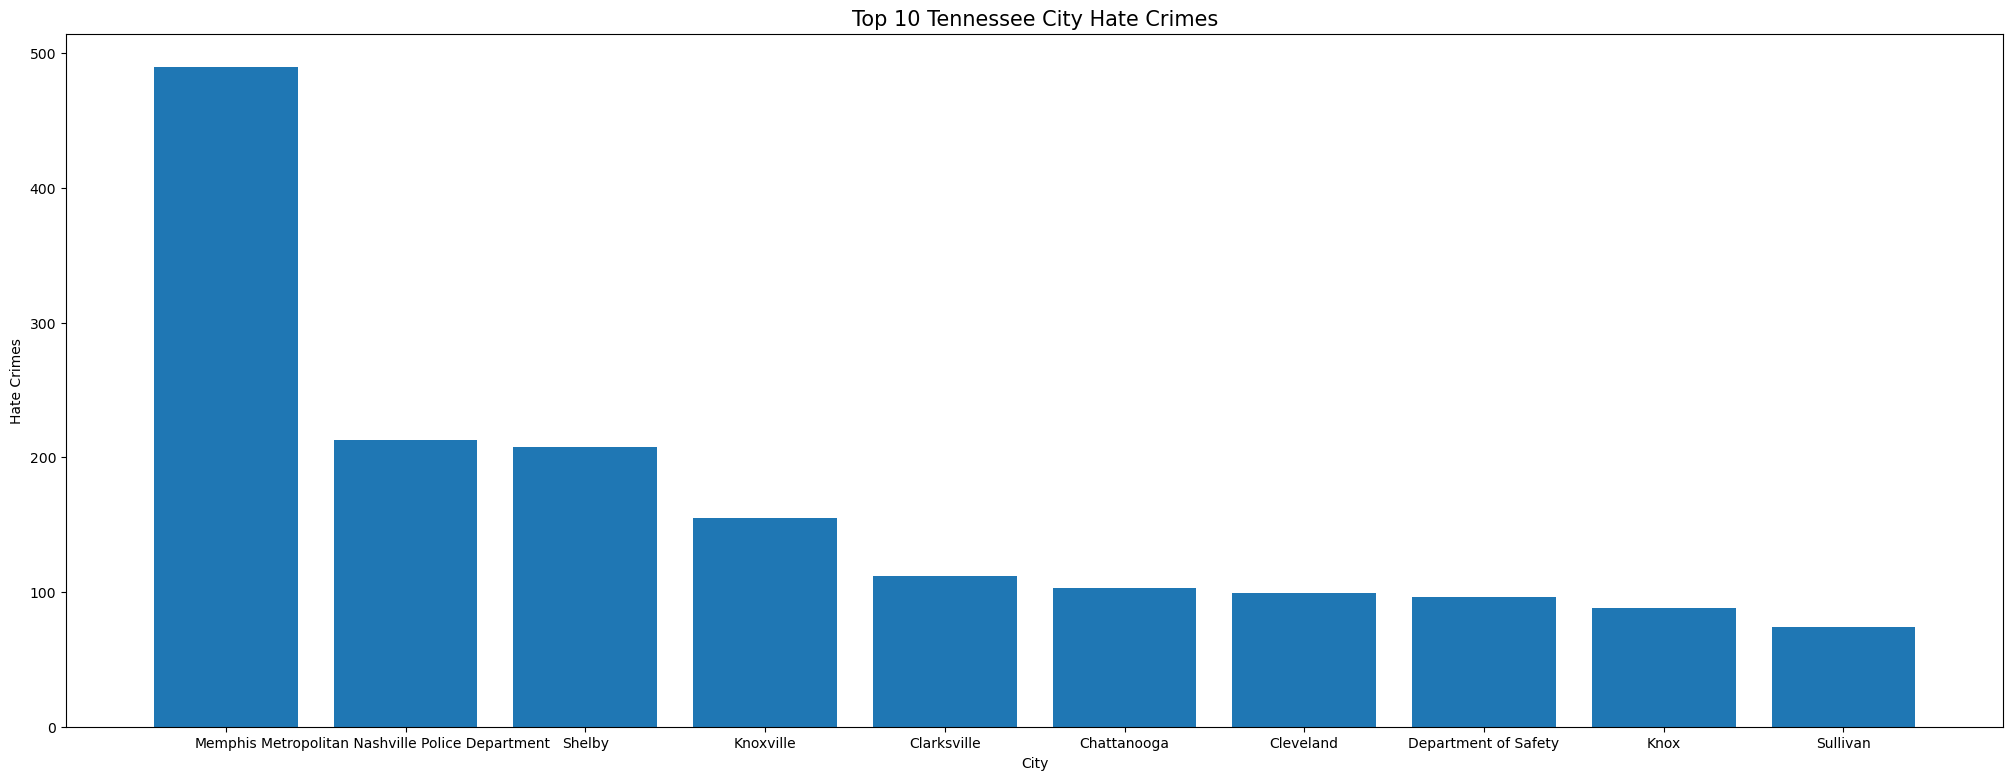

In [172]:
fig, ax = plt.subplots(figsize=(25,9))
ax.bar(df_tn.head(top_number)["pug_agency_name"], df_tn.head(top_number)["count"], width=0.8)
ax.set_title('Top 10 Tennessee City Hate Crimes',color = 'black',fontsize=15)
ax.set_xlabel("City")
ax.set_ylabel("Hate Crimes")
plt.show()

In [173]:
top_number = 10
df_ms = hc.query("state_name == 'Mississippi'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
list_cities_ms = list(df_ms.head(top_number)['pug_agency_name']) # Guard 'top_number' cities

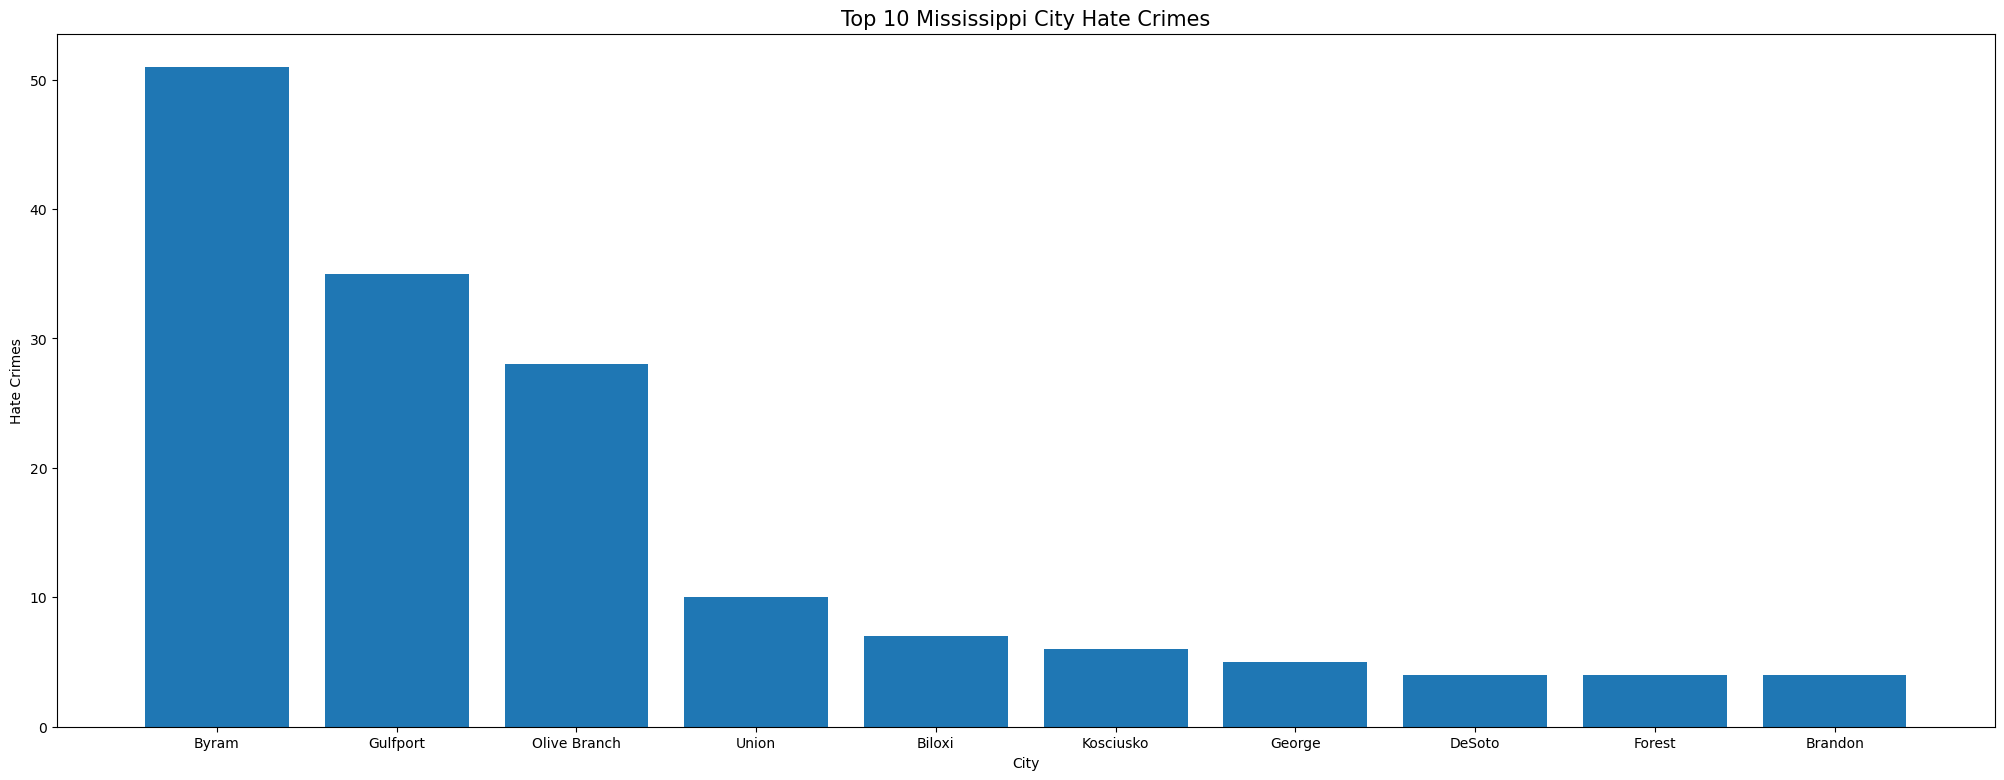

In [174]:
fig, ax = plt.subplots(figsize=(25,9))
ax.bar(df_ms.head(top_number)["pug_agency_name"], df_ms.head(top_number)["count"], width=0.8)
ax.set_title('Top 10 Mississippi City Hate Crimes',color = 'black',fontsize=15)
ax.set_xlabel("City")
ax.set_ylabel("Hate Crimes")
plt.show()

In [175]:
top_number = 10
df_ok = hc.query("state_name == 'Oklahoma'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
list_cities_ok = list(df_ok.head(top_number)['pug_agency_name']) # Guard 'top_number' cities

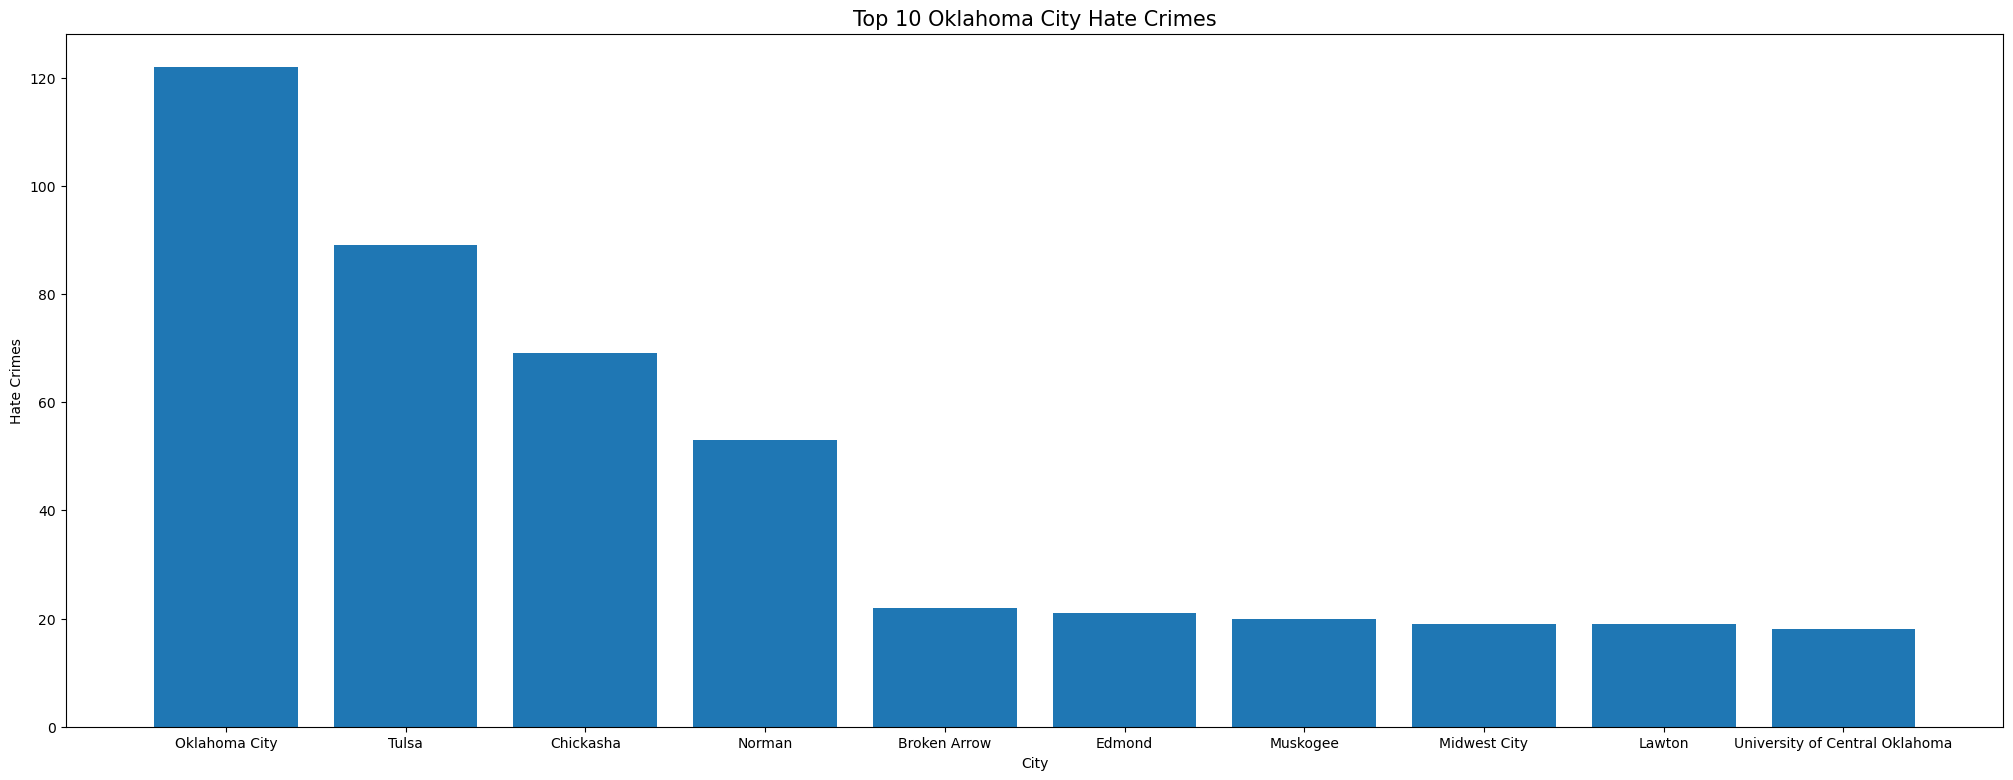

In [176]:
fig, ax = plt.subplots(figsize=(25,9))
ax.bar(df_ok.head(top_number)["pug_agency_name"], df_ok.head(top_number)["count"], width=0.8)
ax.set_title('Top 10 Oklahoma City Hate Crimes',color = 'black',fontsize=15)
ax.set_xlabel("City")
ax.set_ylabel("Hate Crimes")
plt.show()

In [177]:
top_number = 10
df_ar = hc.query("state_name == 'Arkansas'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
list_cities_ar = list(df_ar.head(top_number)['pug_agency_name']) # Guard 'top_number' cities

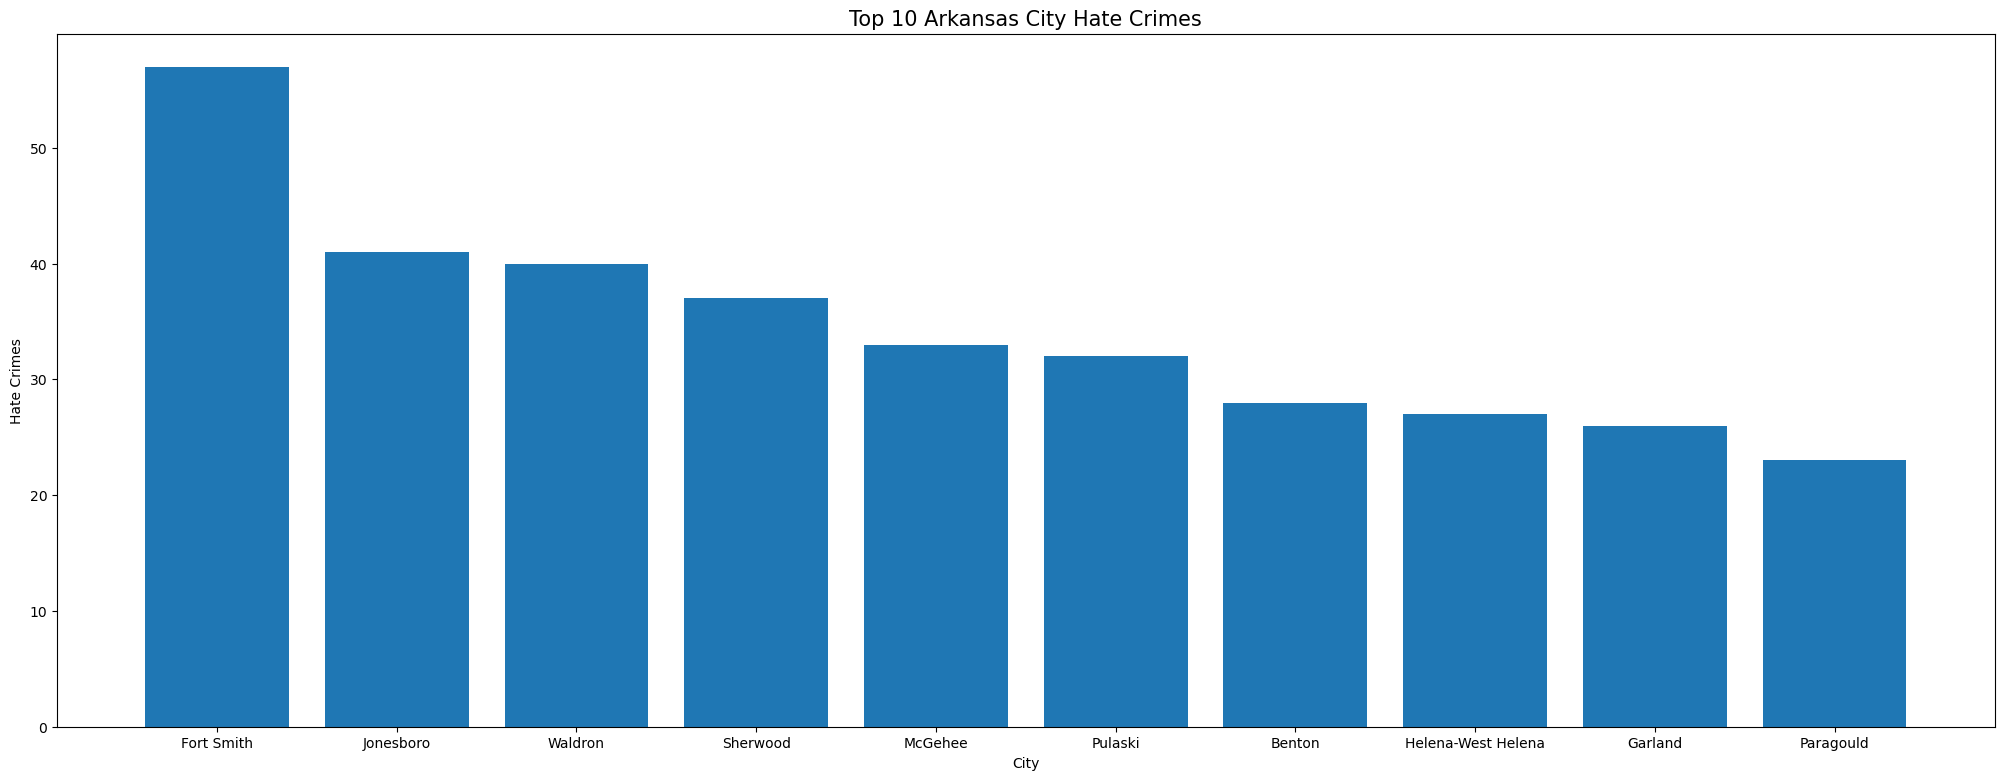

In [178]:
fig, ax = plt.subplots(figsize=(25,9))
ax.bar(df_ar.head(top_number)["pug_agency_name"], df_ar.head(top_number)["count"], width=0.8)
ax.set_title('Top 10 Arkansas City Hate Crimes',color = 'black',fontsize=15)
ax.set_xlabel("City")
ax.set_ylabel("Hate Crimes")
plt.show()

In [179]:
top_number = 10
df_oh = hc.query("state_name == 'Ohio'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
list_cities_oh = list(df_oh.head(top_number)['pug_agency_name']) # Guard 'top_number' cities

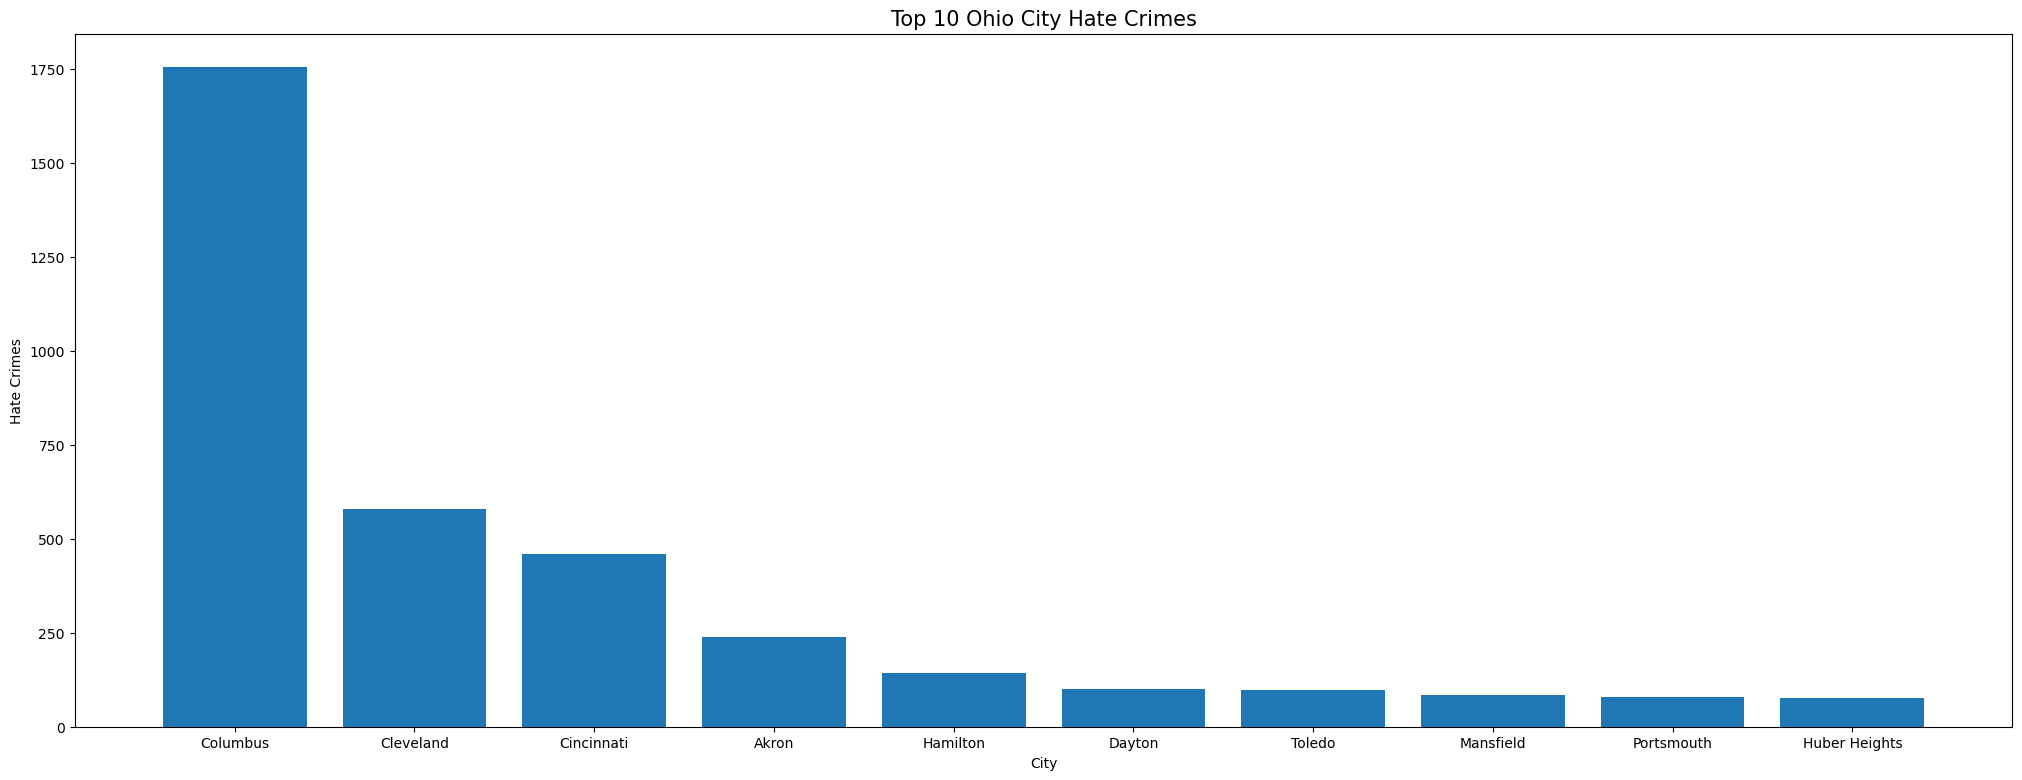

In [180]:
fig, ax = plt.subplots(figsize=(25,9))
ax.bar(df_oh.head(top_number)["pug_agency_name"], df_oh.head(top_number)["count"], width=0.8)
ax.set_title('Top 10 Ohio City Hate Crimes',color = 'black',fontsize=15)
ax.set_xlabel("City")
ax.set_ylabel("Hate Crimes")
plt.show()

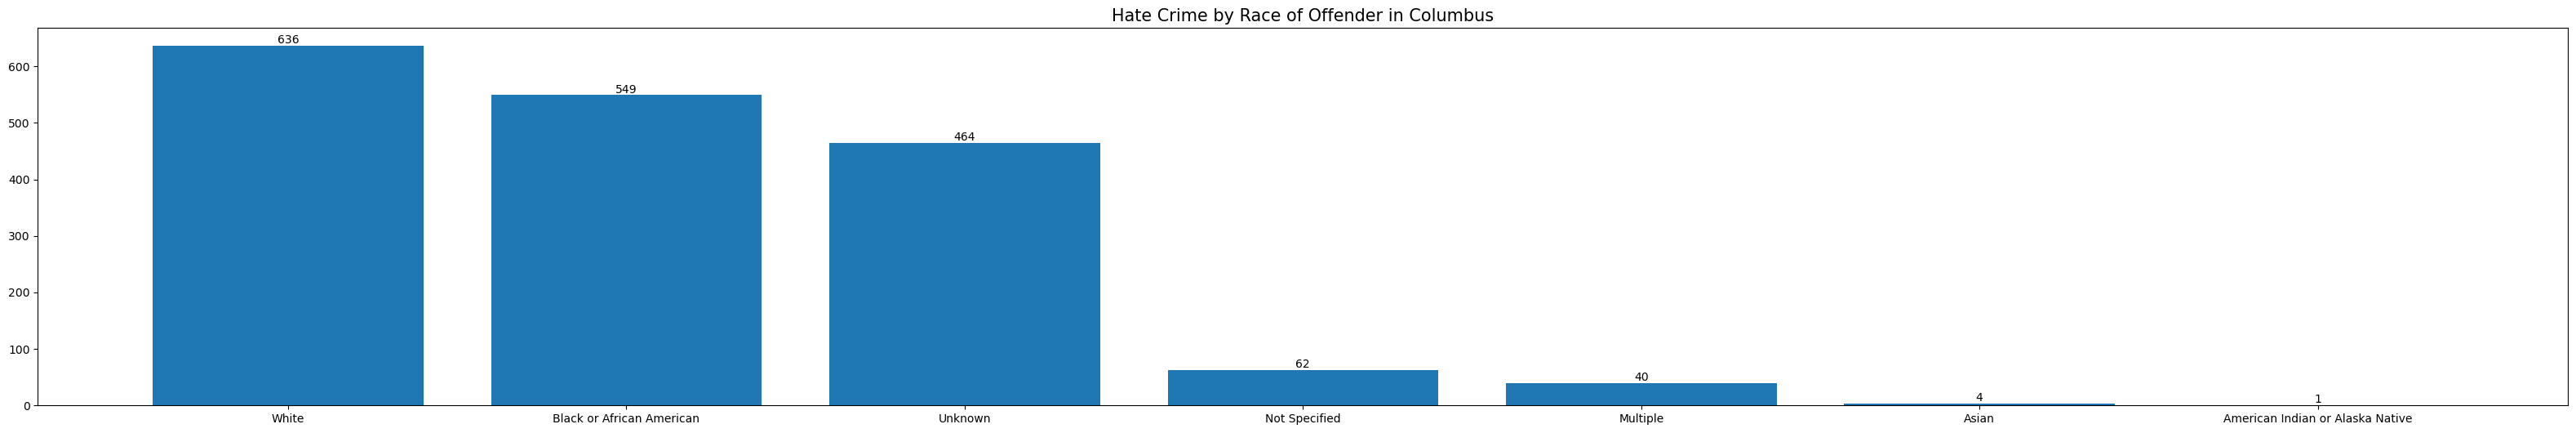

In [181]:
city_mask = hc['pug_agency_name'] == 'Columbus'
state_mask = hc['state_name'] == 'Ohio'

col = hc[city_mask & state_mask] # a dataframe of only Columbus, OH

x= col.offender_race.value_counts()[:10].index
y= col.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Columbus", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

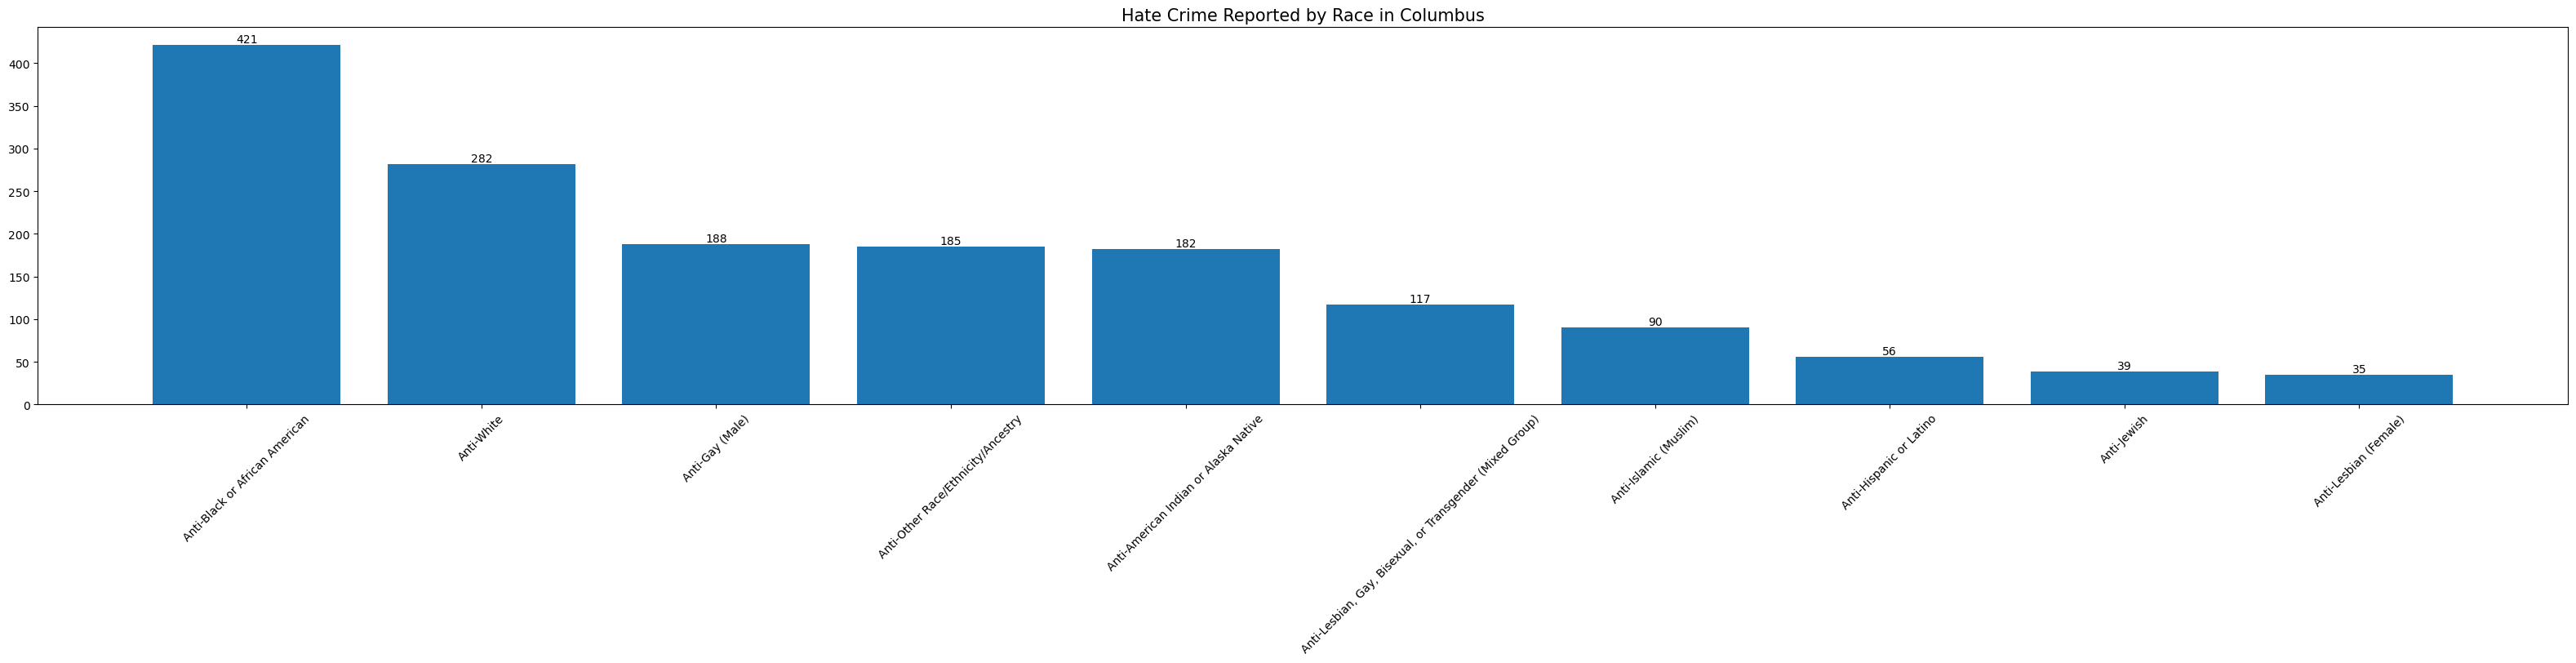

In [182]:
x= col.bias_desc.value_counts()[:10].index
y= col.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Columbus", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [183]:
city_mask = hc['pug_agency_name'] == 'San Francisco'
state_mask = hc['state_name'] == 'California'

hca = hc[city_mask & state_mask] # a dataframe of only SF, California

In [184]:
hca

pug_agency_name pub_agency_unit agency_type_name state_abbr  \
1081     San Francisco             NaN             City         CA   
1082     San Francisco             NaN             City         CA   
1083     San Francisco             NaN             City         CA   
1084     San Francisco             NaN             City         CA   
1085     San Francisco             NaN             City         CA   
...                ...             ...              ...        ...   
145089   San Francisco             NaN             City         CA   
145090   San Francisco             NaN             City         CA   
145091   San Francisco             NaN             City         CA   
145092   San Francisco             NaN             City         CA   
145093   San Francisco             NaN             City         CA   

        state_name  month   day    year  adult_victim_count  \
1081    California    1.0   1.0  2000.0                 NaN   
1082    California    1.0   7.0  2000.0                 NaN   
1083    California    1.0  12.0  2000.0                 NaN   
1084    California    1.0  18.0  2000.0                 NaN   
1085    California    1.0  20.0  2000.0                 NaN   
...            ...    ...   ...     ...                 ...   
145089  California    3.0  23.0  2020.0                 1.0   
145090  California    1.0  18.0  2020.0                 1.0   
145091  California    3.0  13.0  2020.0                 1.0   
145092  California    3.0   3.0  2020.0                 1.0   
145093  California    3.0  14.0  2020.0                 1.0   

        juvenile_victim_count  ...  adult_offender_count  \
1081                      NaN  ...                   NaN   
1082                      NaN  ...                   NaN   
1083                      NaN  ...                   NaN   
1084                      NaN  ...                   NaN   
1085                      NaN  ...                   NaN   
...                       ...  ...                   ...   
145089                    0.0  ...                   1.0   
145090                    0.0  ...                   1.0   
145091                    0.0  ...                   1.0   
145092                    0.0  ...                   0.0   
145093                    0.0  ...                   1.0   

        juvenile_offender_count              offender_race  \
1081                        NaN                    Unknown   
1082                        NaN  Black or African American   
1083                        NaN                    Unknown   
1084                        NaN                    Unknown   
1085                        NaN                      White   
...                         ...                        ...   
145089                      0.0                      White   
145090                      0.0                      White   
145091                      0.0                      White   
145092                      0.0                    Unknown   
145093                      0.0                      White   

        offender_ethnicity victim_count  \
1081         Not Specified          2.0   
1082         Not Specified          1.0   
1083         Not Specified          4.0   
1084         Not Specified          1.0   
1085         Not Specified          1.0   
...                    ...          ...   
145089  Hispanic or Latino          1.0   
145090             Unknown          1.0   
145091             Unknown          1.0   
145092             Unknown          1.0   
145093             Unknown          1.0   

                                    offense_name total_individual_victims  \
1081                                       Arson                      2.0   
1082                          Aggravated Assault                      1.0   
1083                                Intimidation                      4.0   
1084    Destruction/Damage/Vandalism of Property                      0.0   
1085                                Intim

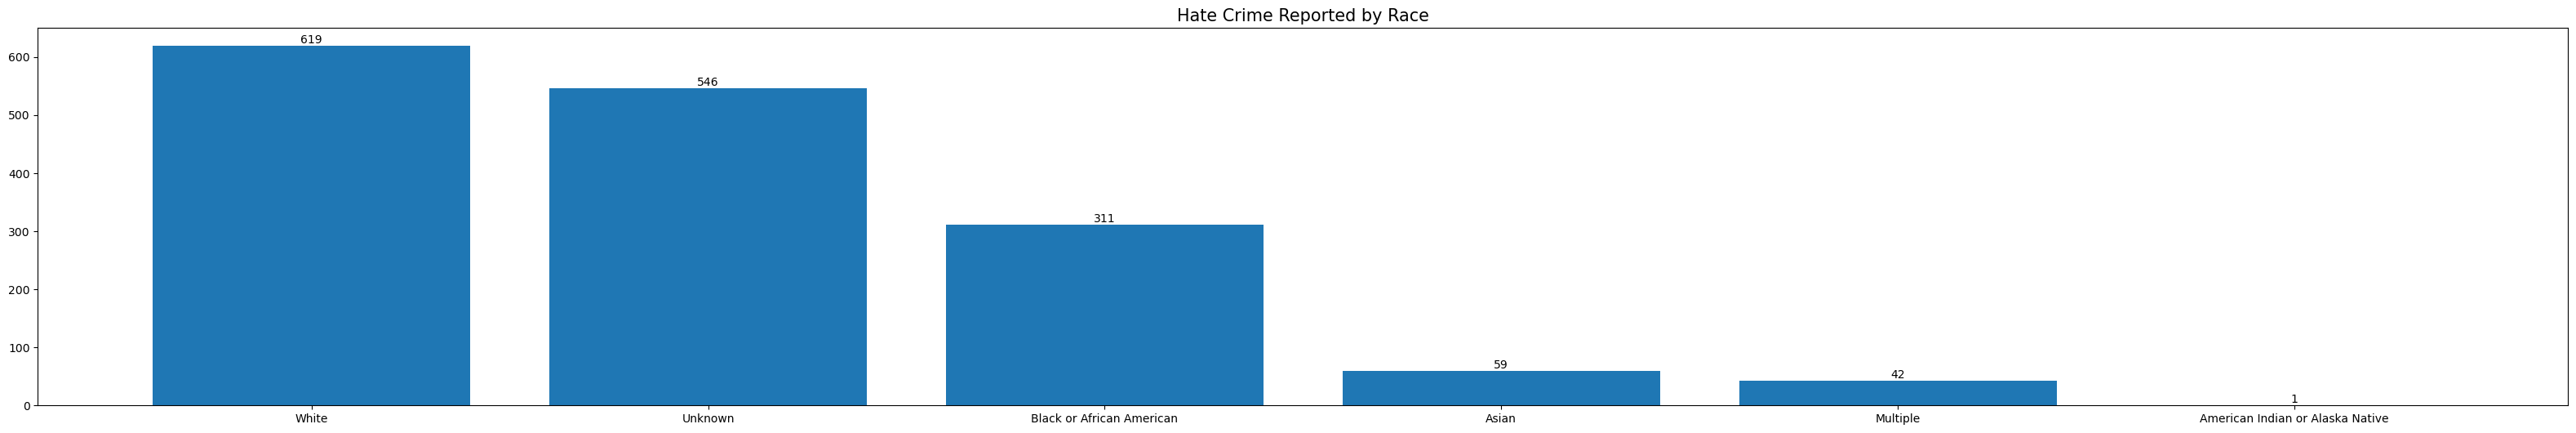

In [185]:
x= hca.offender_race.value_counts()[:10].index
y= hca.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

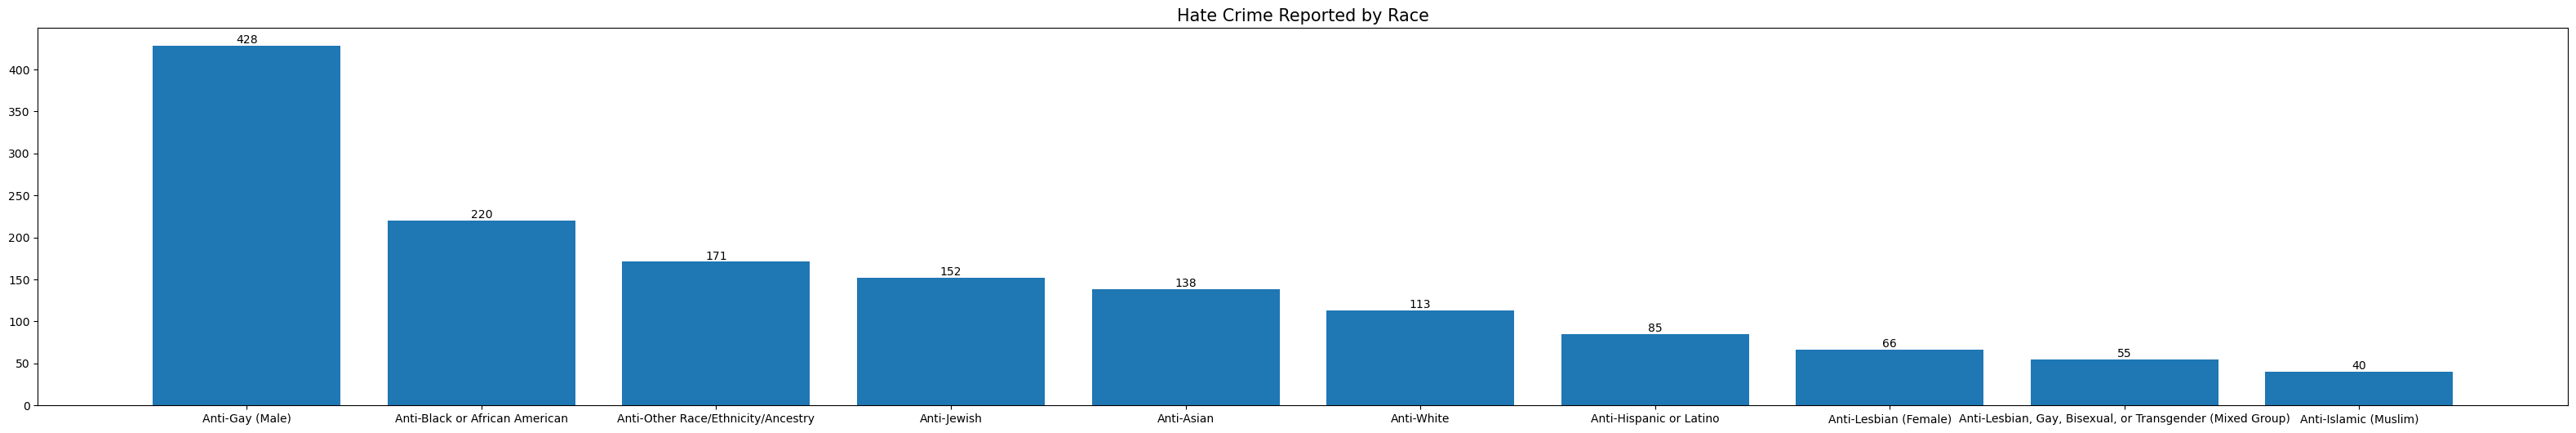

In [186]:
x= hca.bias_desc.value_counts()[:10].index
y= hca.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [187]:
#putting f in front of a string creates a format str
def func(state_name, top_number = 5): 
   

  
    df = hc.query(f"state_name == '{state_name}'").groupby(['pug_agency_name']).count()['day'].sort_values(ascending = False).reset_index().rename({'day': 'count'}, axis = 1)
    list_cities = list(df.head(top_number)['pug_agency_name']) # Guard 'top_number' cities
    fig, ax = plt.subplots(figsize=(25,9))
    ax.bar(df.head(top_number)["pug_agency_name"], df.head(top_number)["count"], width=0.8)
    ax.set_title(f'{state_name}',color = 'black',fontsize=15)
    ax.set_xlabel("City")
    ax.set_ylabel("Hate Crimes")
    plt.show()

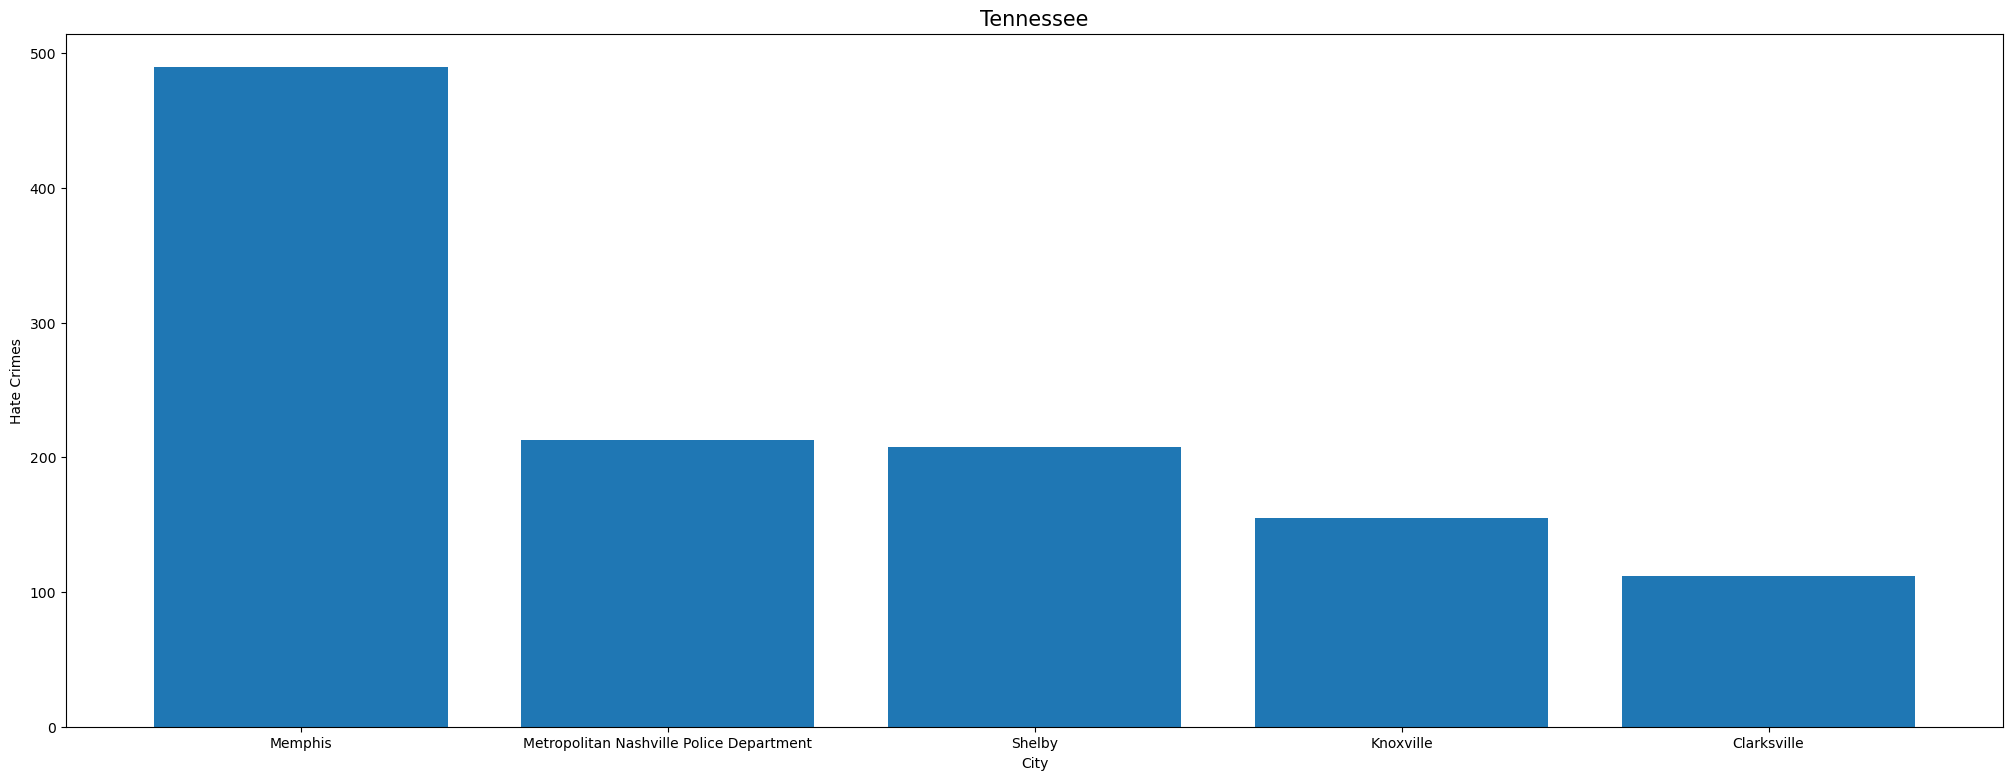

In [188]:
#make sure you put a set of quotes around 'state' to call it
func('Tennessee')

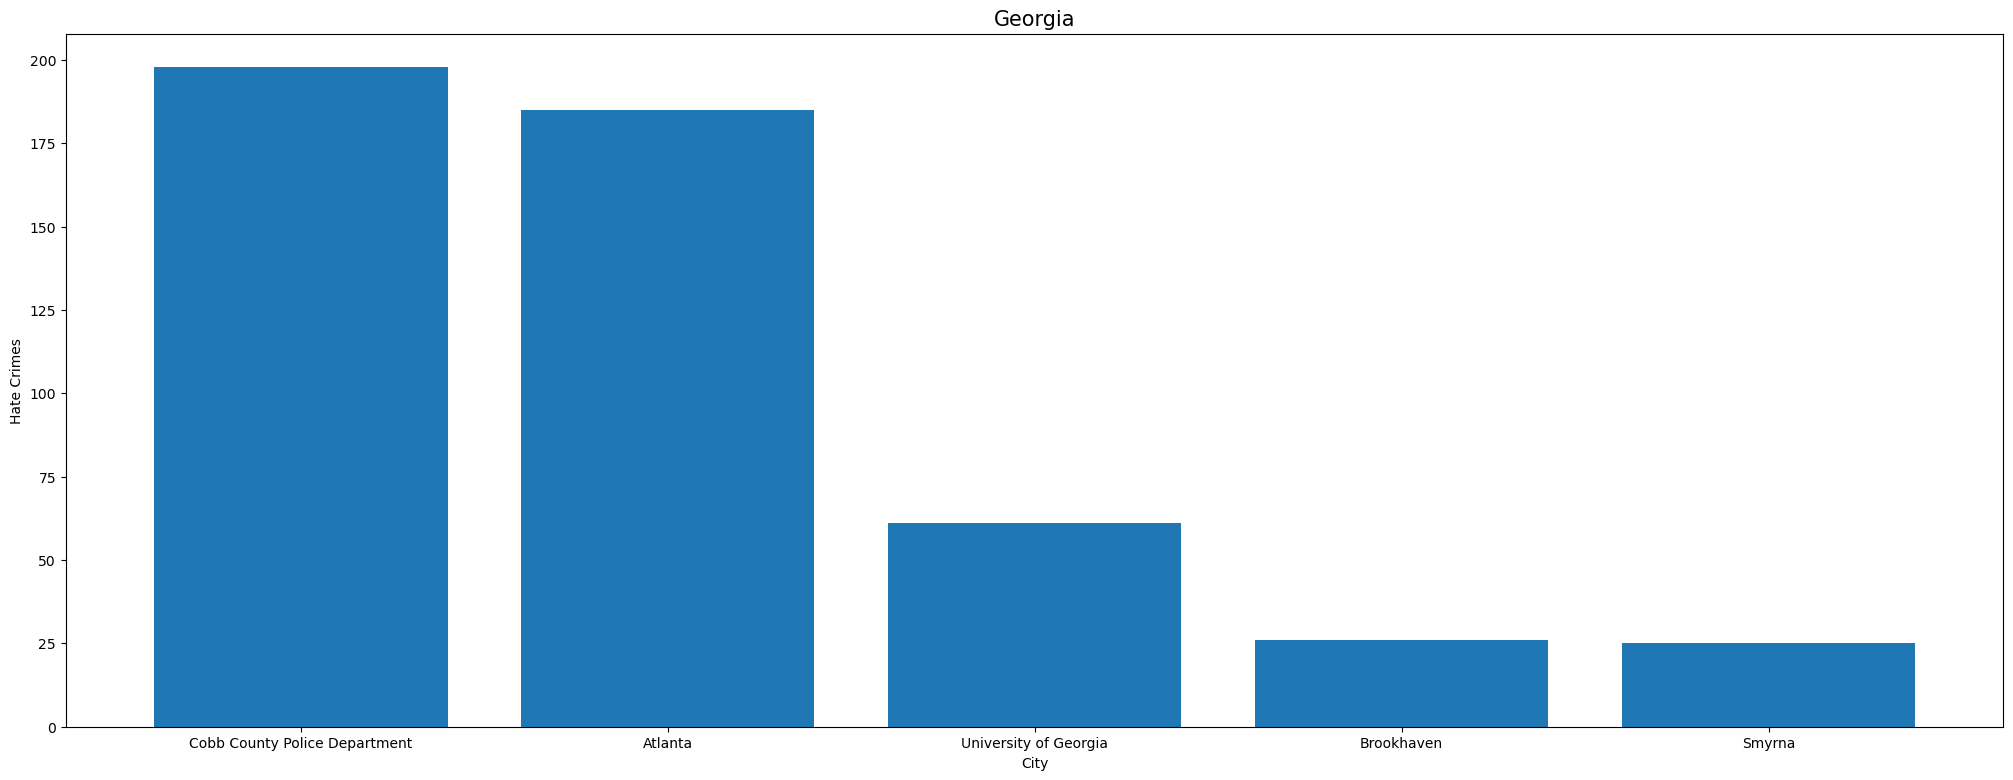

In [189]:
func('Georgia')

In [190]:
city_mask = hc['pug_agency_name'] == 'Detroit'
state_mask = hc['state_name'] == 'Michigan'

det = hc[city_mask & state_mask] # a dataframe of only Detroit, MI

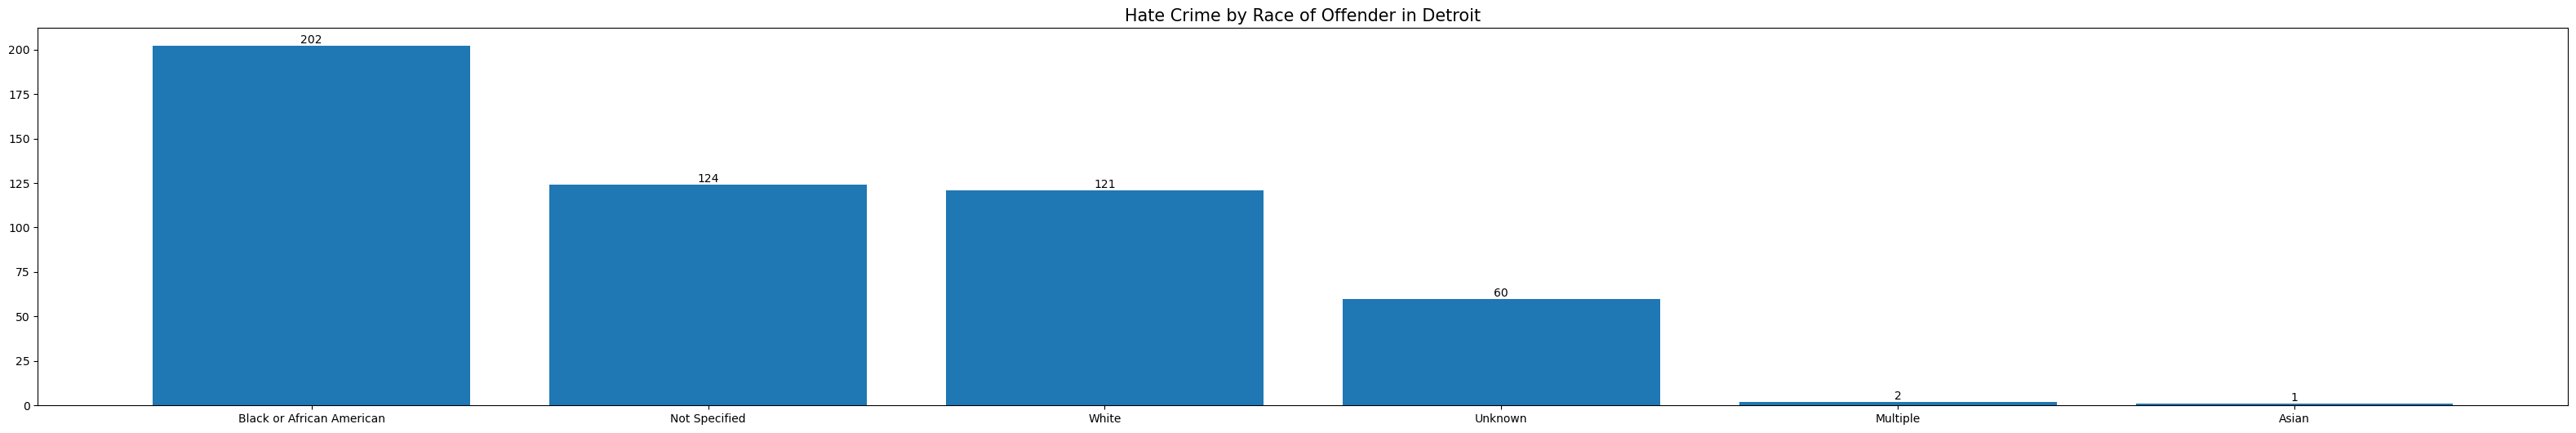

In [191]:
x= det.offender_race.value_counts()[:10].index
y= det.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Detroit", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

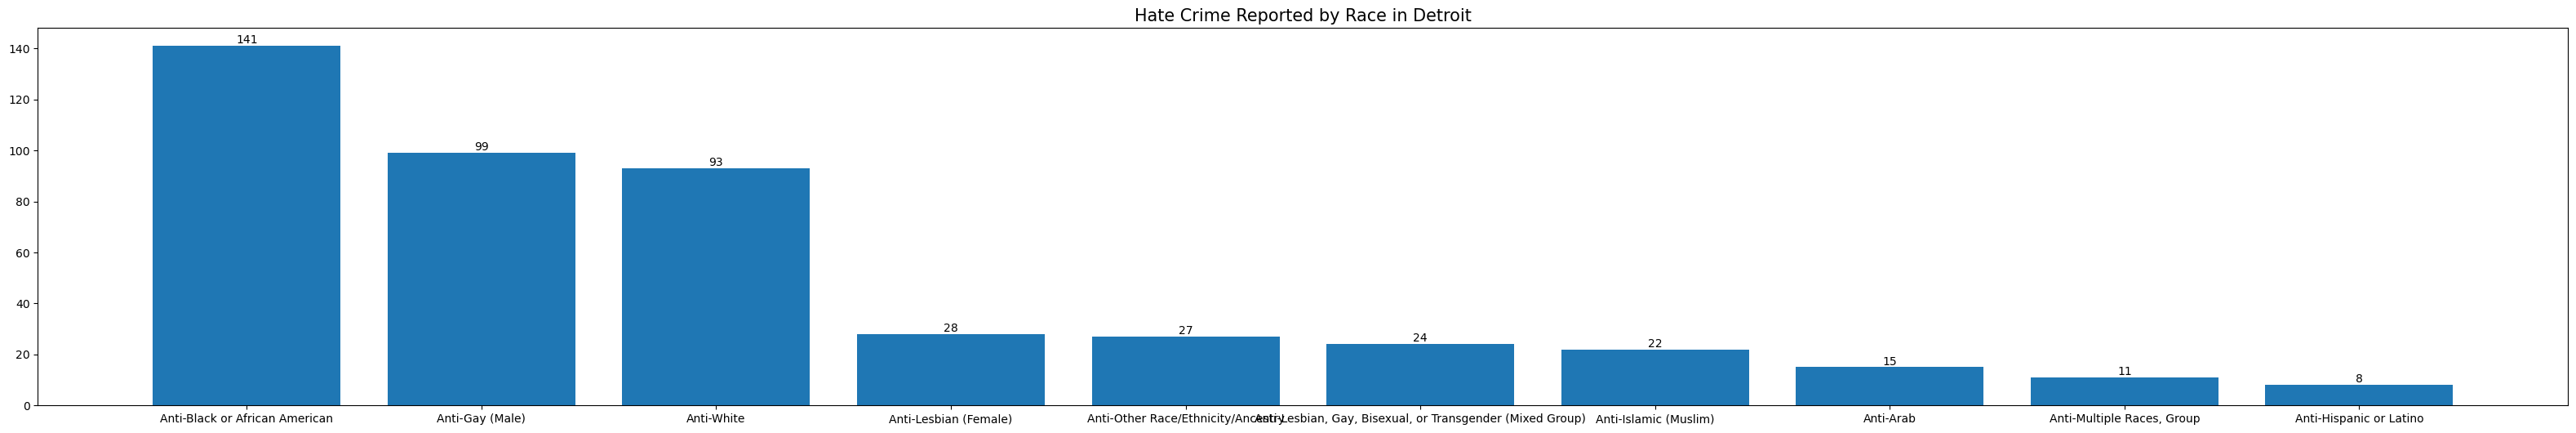

In [192]:
x= det.bias_desc.value_counts()[:10].index
y= det.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Detroit", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

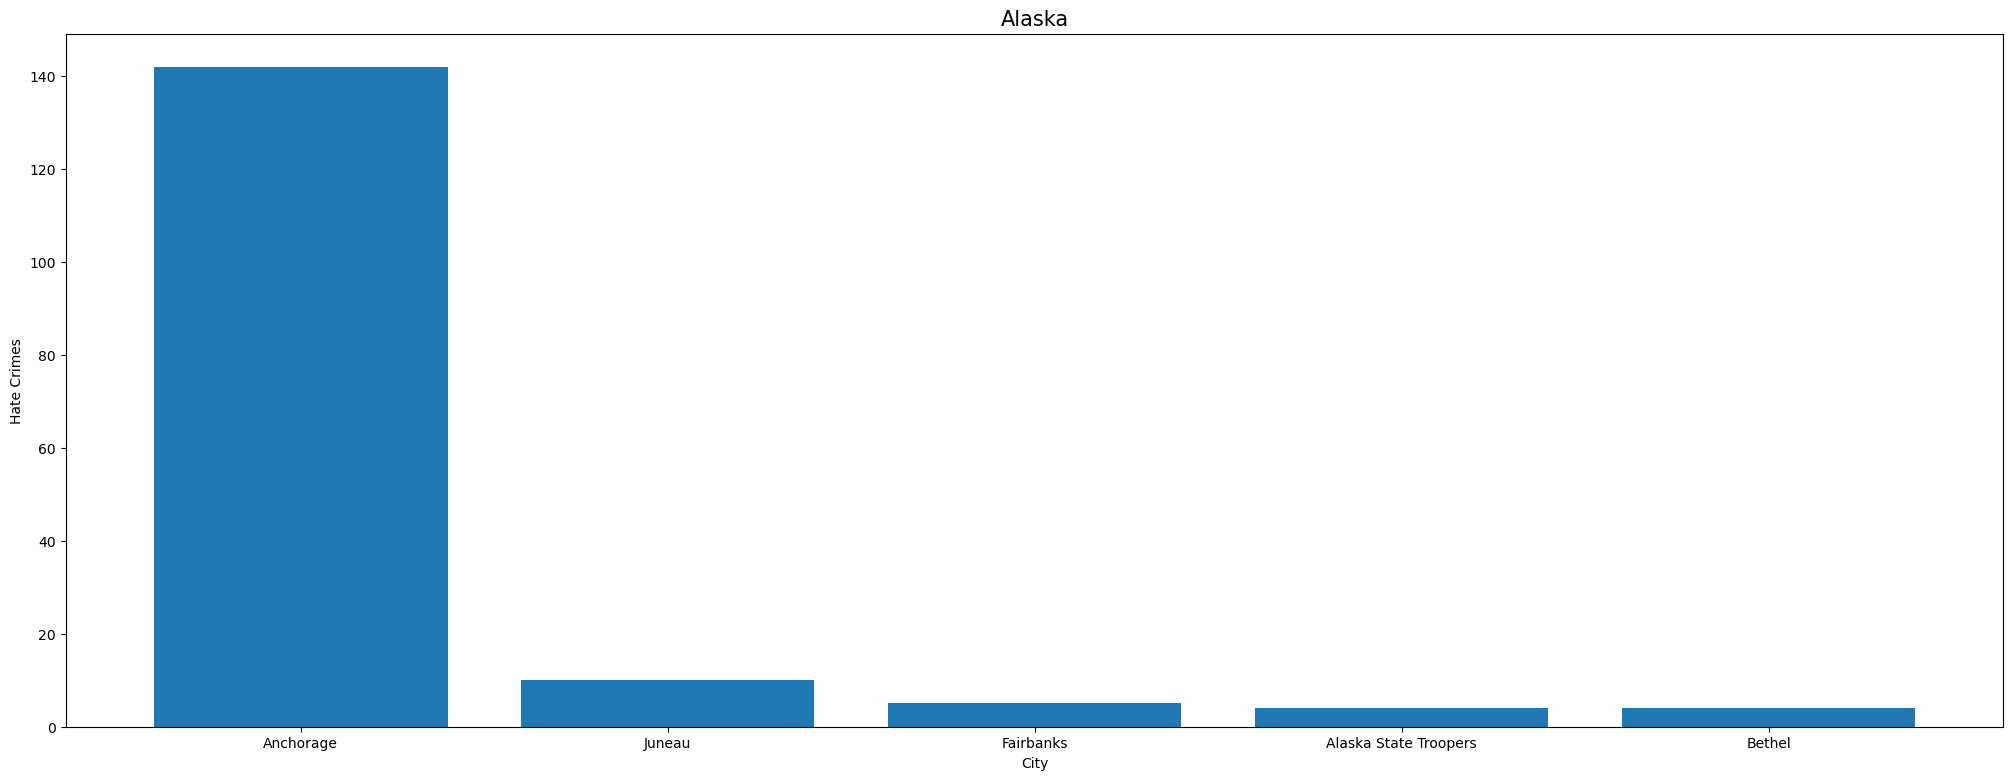

In [193]:
func('Alaska')

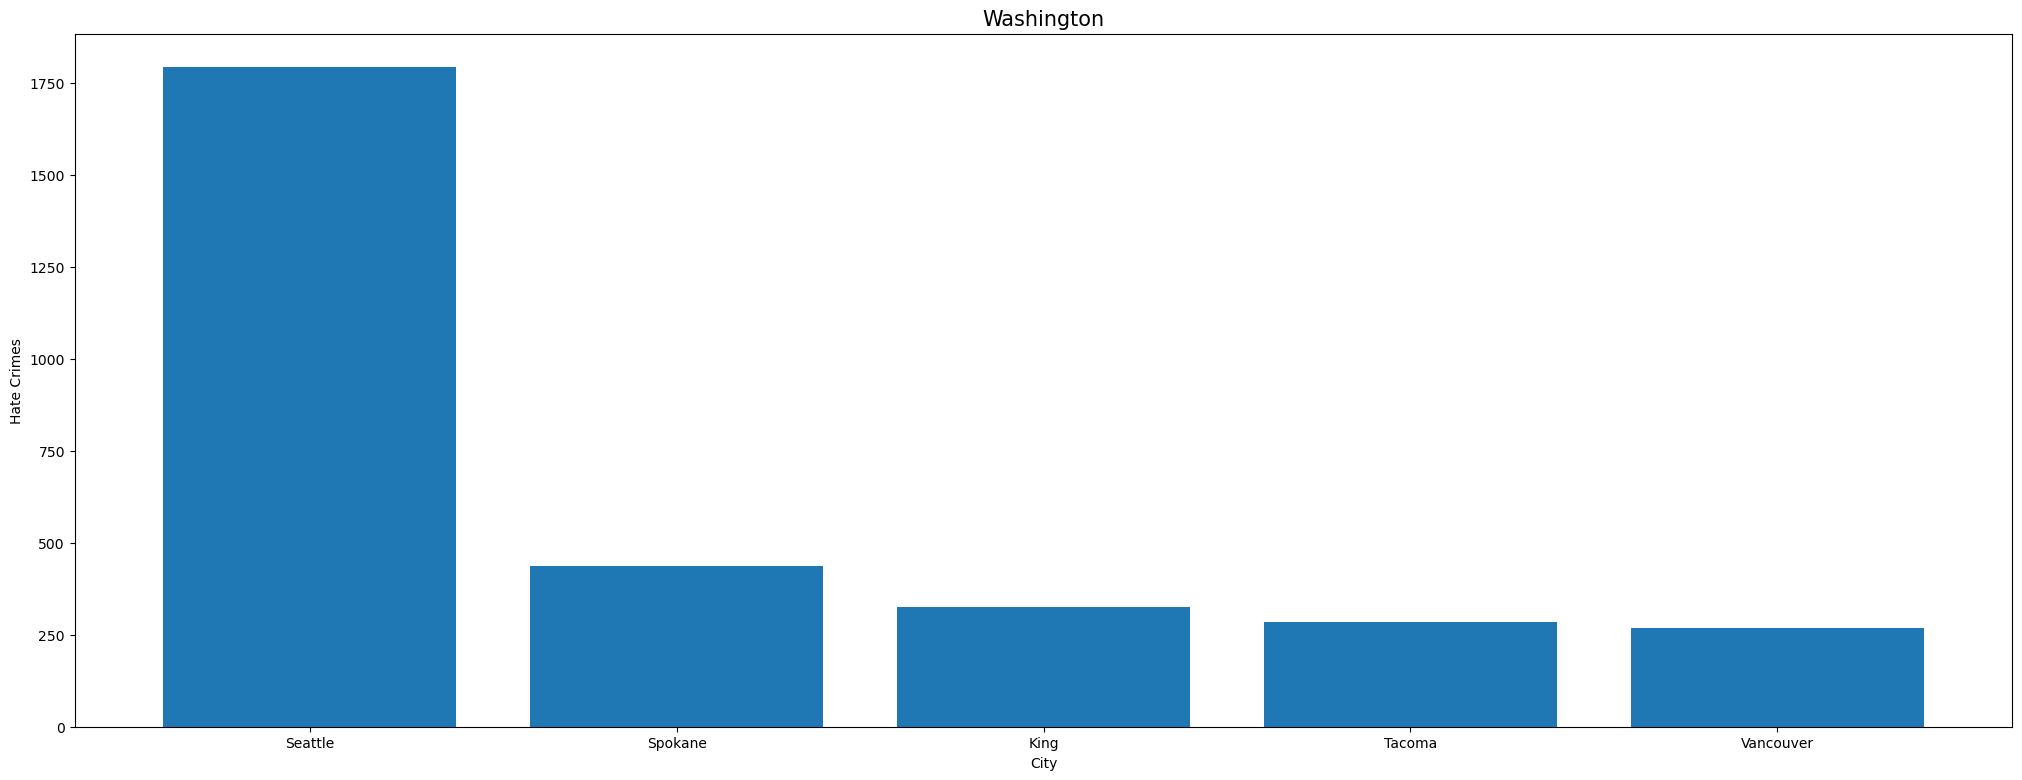

In [194]:
func('Washington')

In [195]:
city_mask = hc['pug_agency_name'] == 'Seattle'
state_mask = hc['state_name'] == 'Washington'

s = hc[city_mask & state_mask] # a dataframe of only Detroit, MI

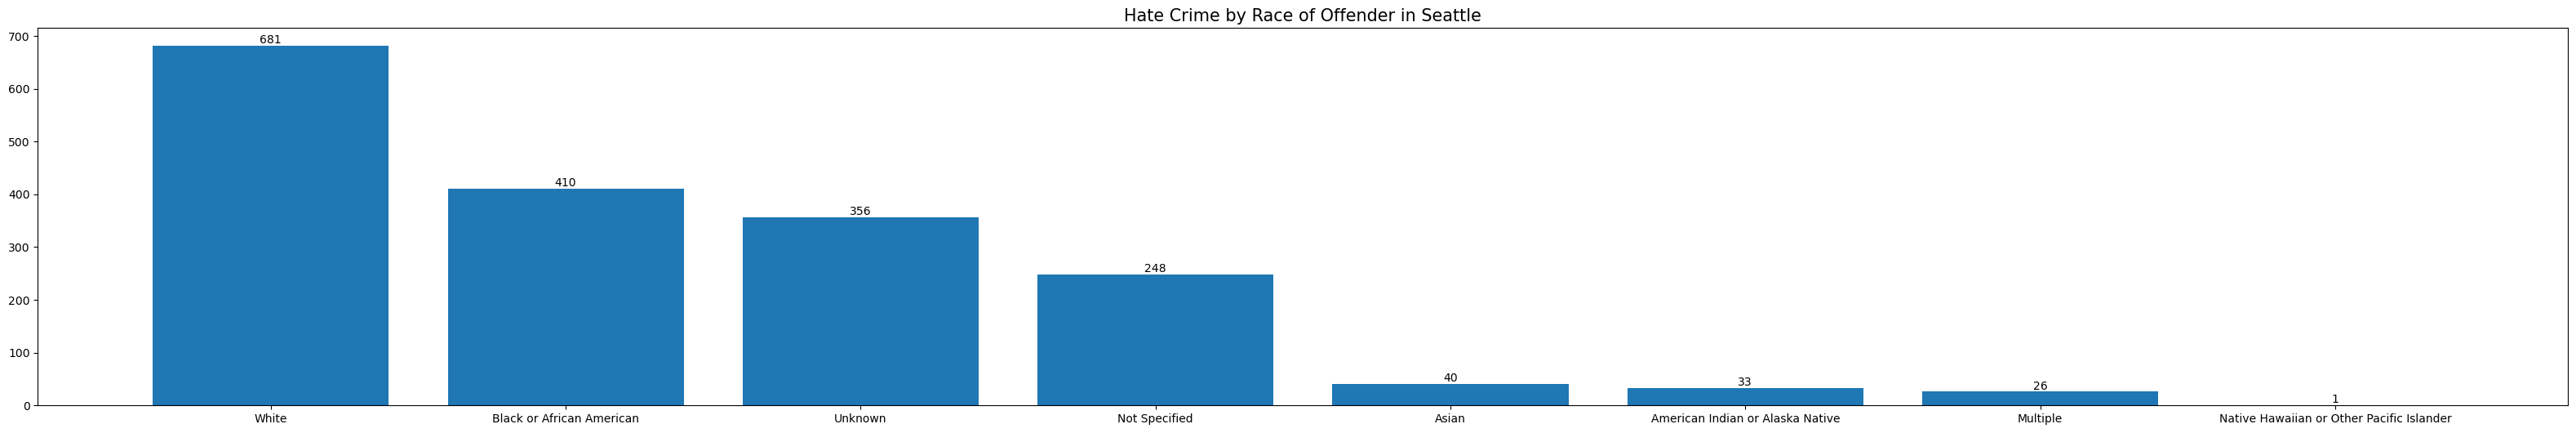

In [196]:
x= s.offender_race.value_counts()[:10].index
y= s.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Seattle", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

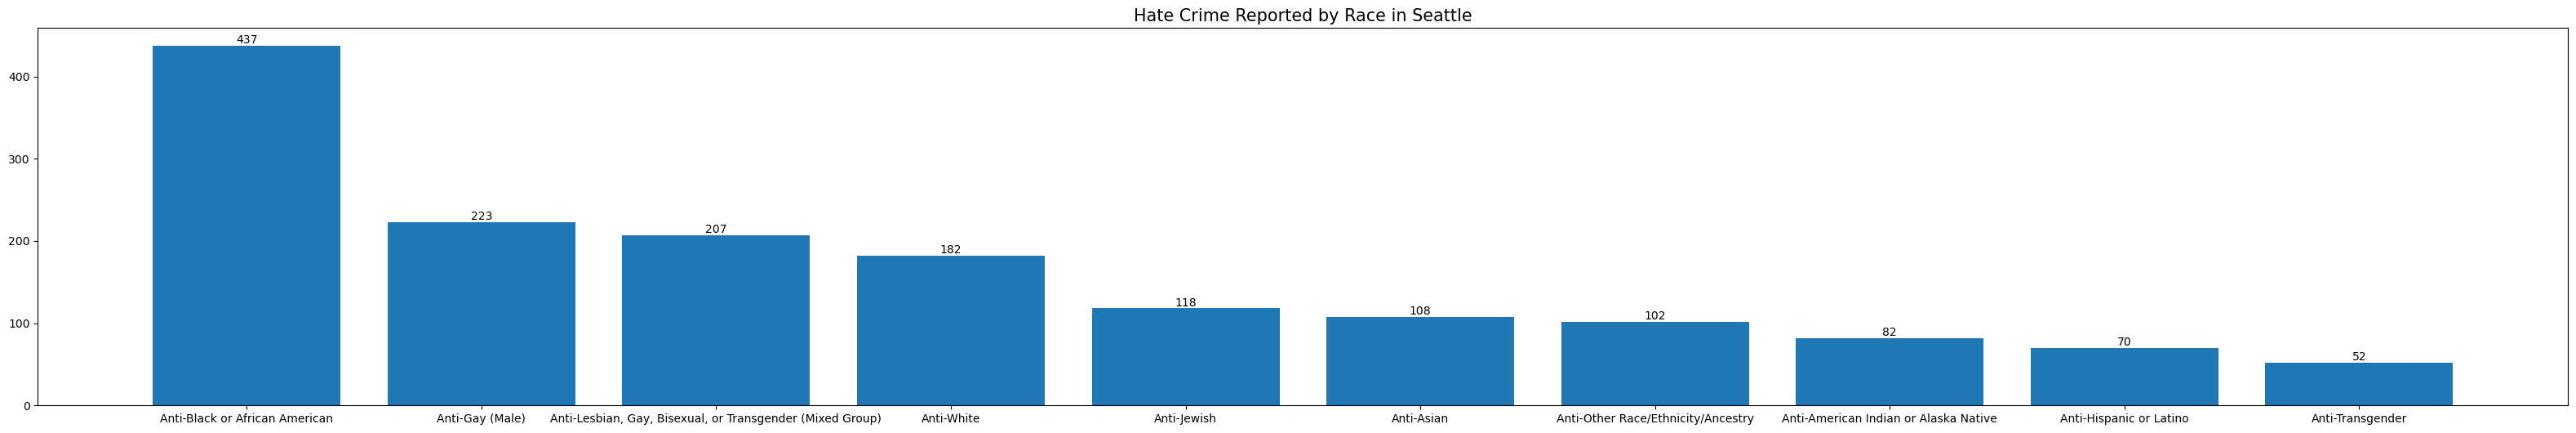

In [197]:
x= s.bias_desc.value_counts()[:10].index
y= s.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Seattle", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

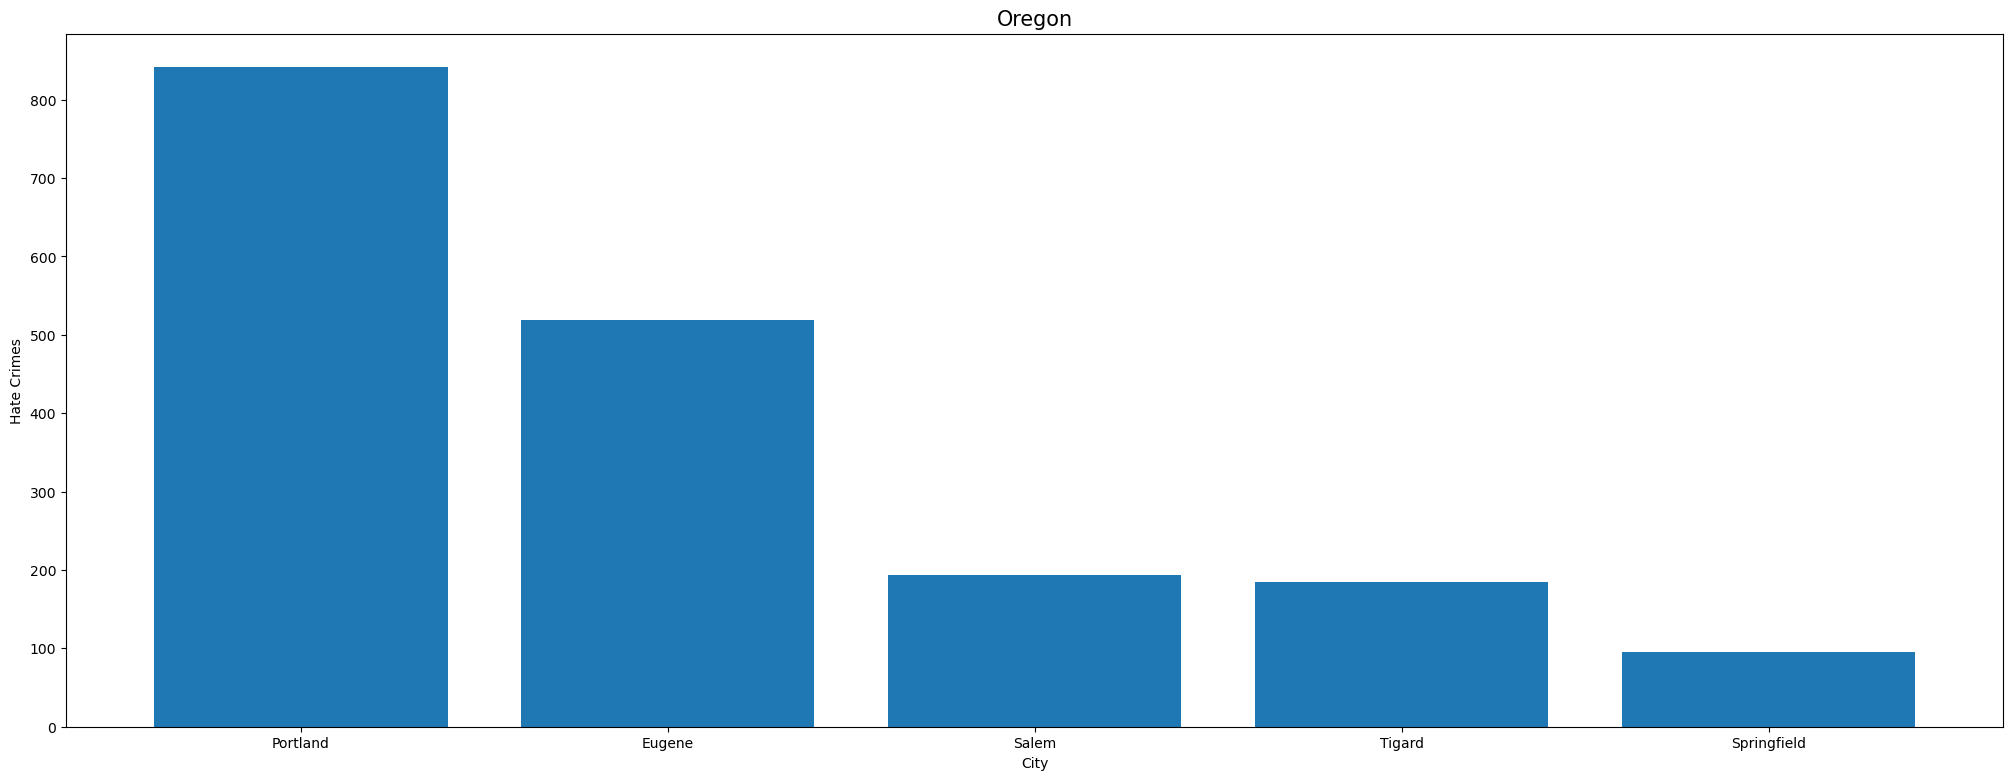

In [198]:
func('Oregon')

In [199]:
city_mask = hc['pug_agency_name'] == 'Portland'
state_mask = hc['state_name'] == 'Oregon'

portland = hc[city_mask & state_mask] # a dataframe of only Portland, OR

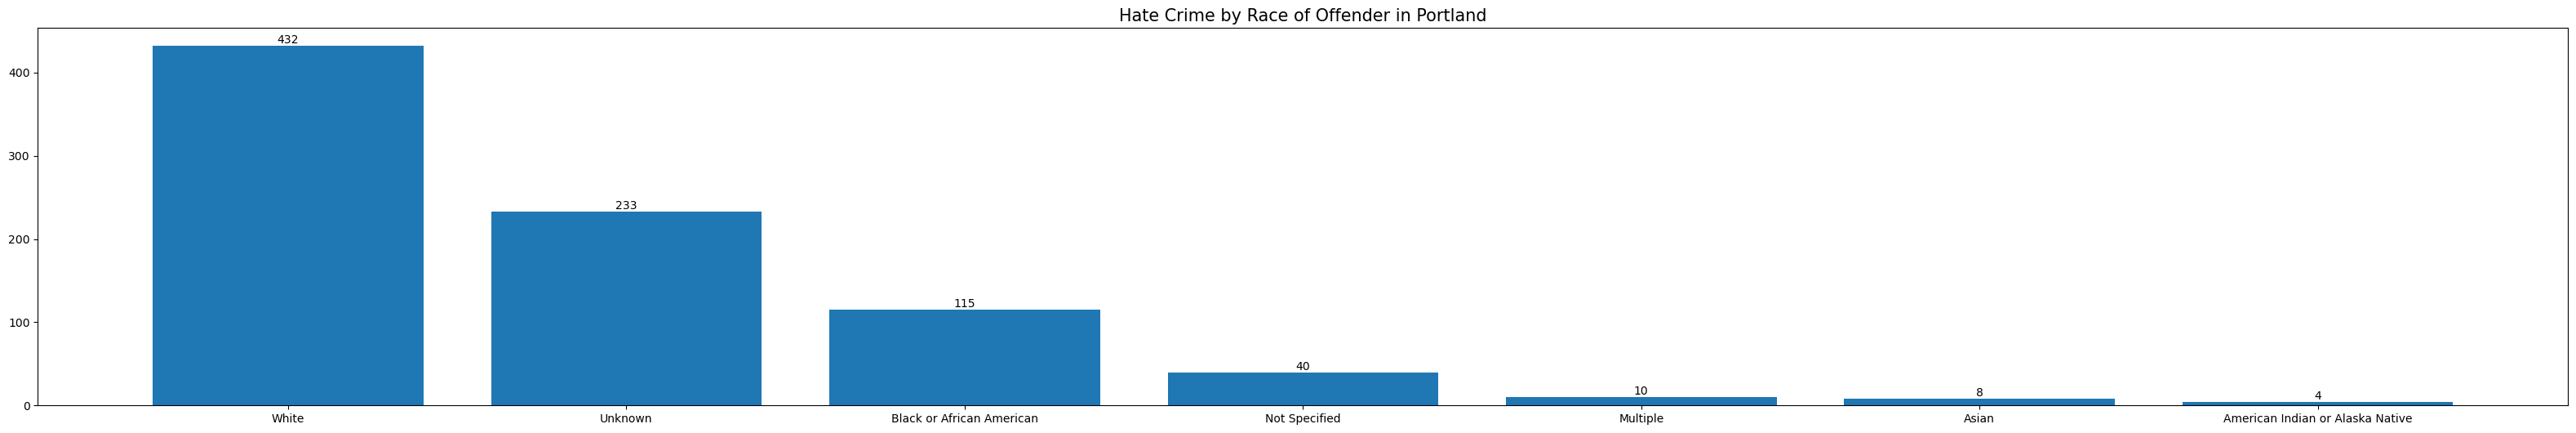

In [200]:
x= portland.offender_race.value_counts()[:10].index
y= portland.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Portland", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

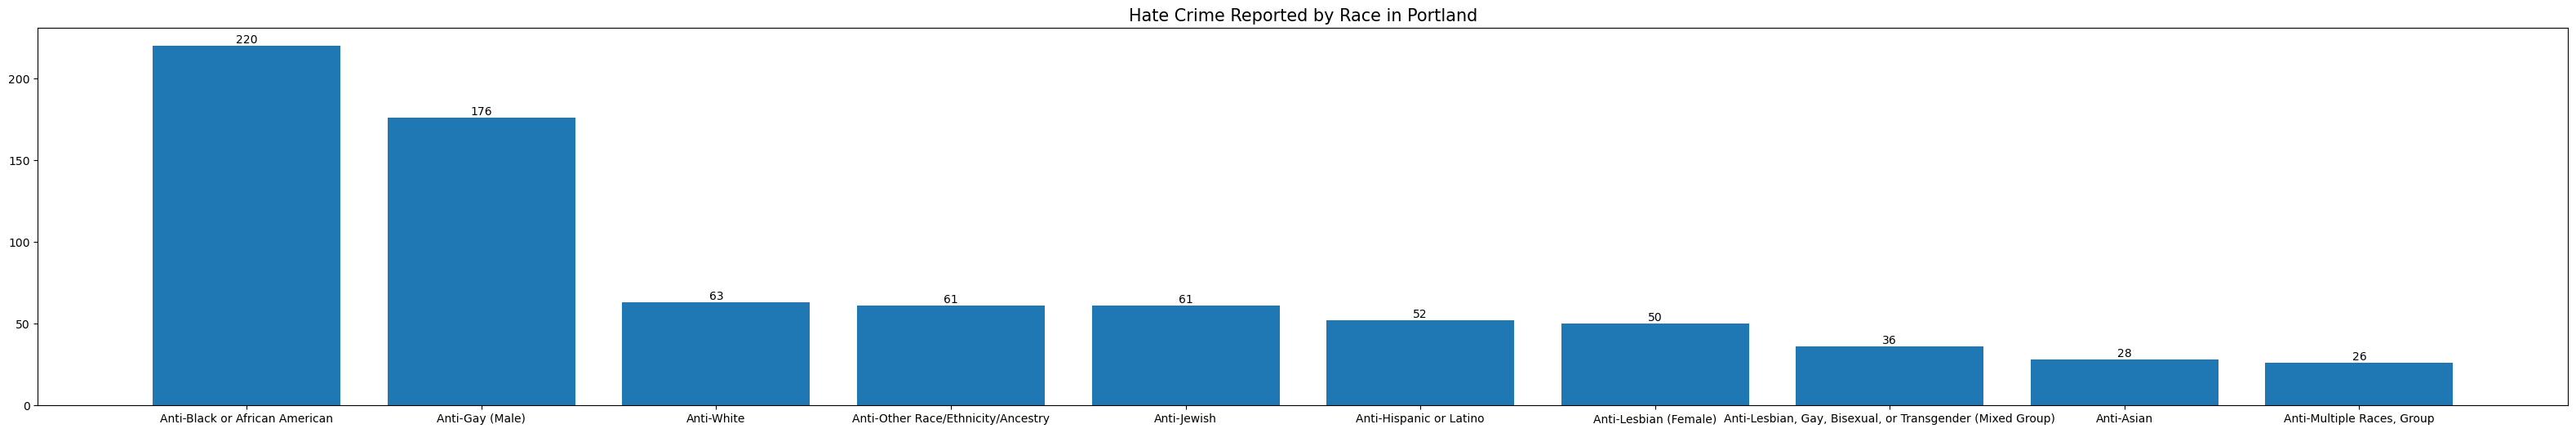

In [201]:
x= portland.bias_desc.value_counts()[:10].index
y= portland.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Portland", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [202]:
city_mask = hc['pug_agency_name'] == 'Eugene'
state_mask = hc['state_name'] == 'Oregon'

eugene = hc[city_mask & state_mask] # a dataframe of only Eugene, OR

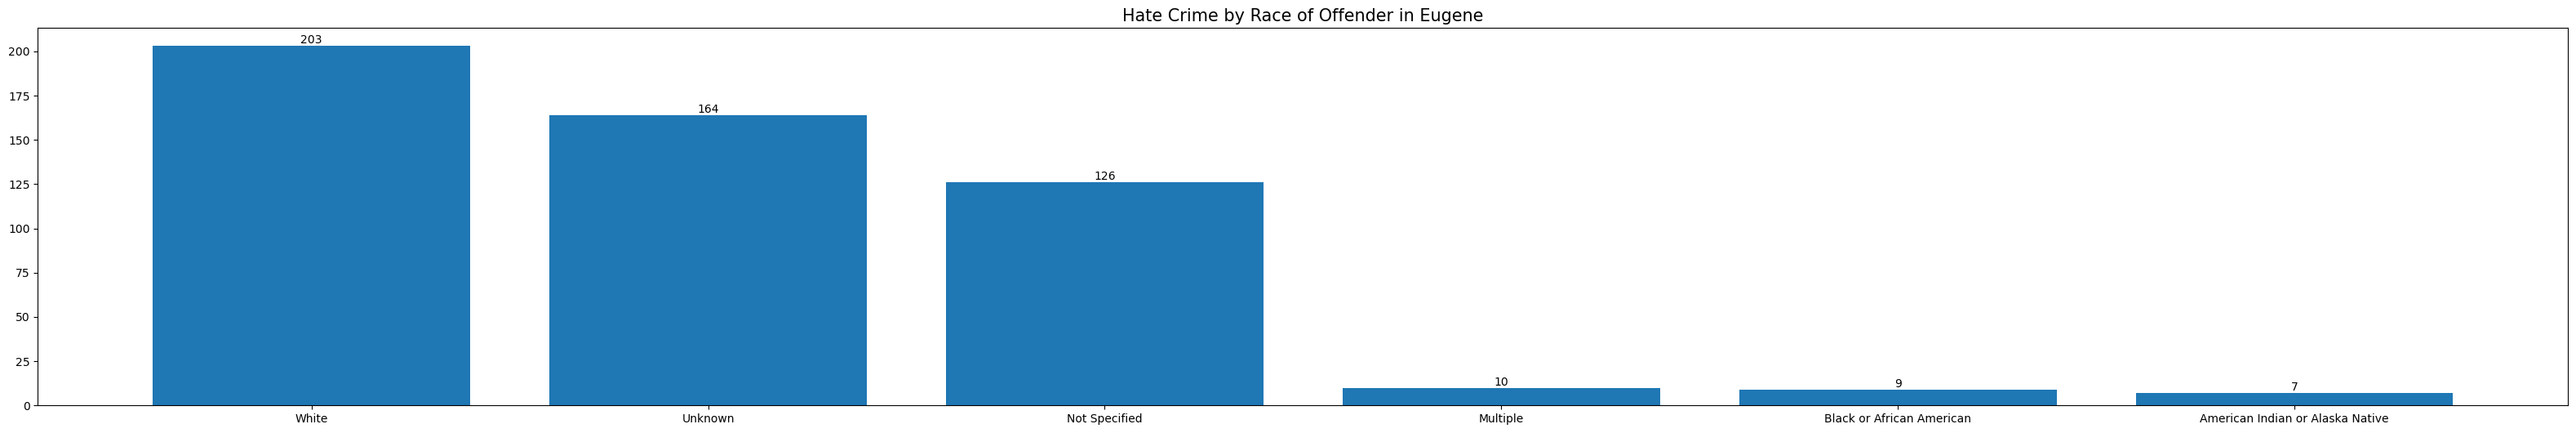

In [203]:
x= eugene.offender_race.value_counts()[:10].index
y= eugene.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Eugene", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

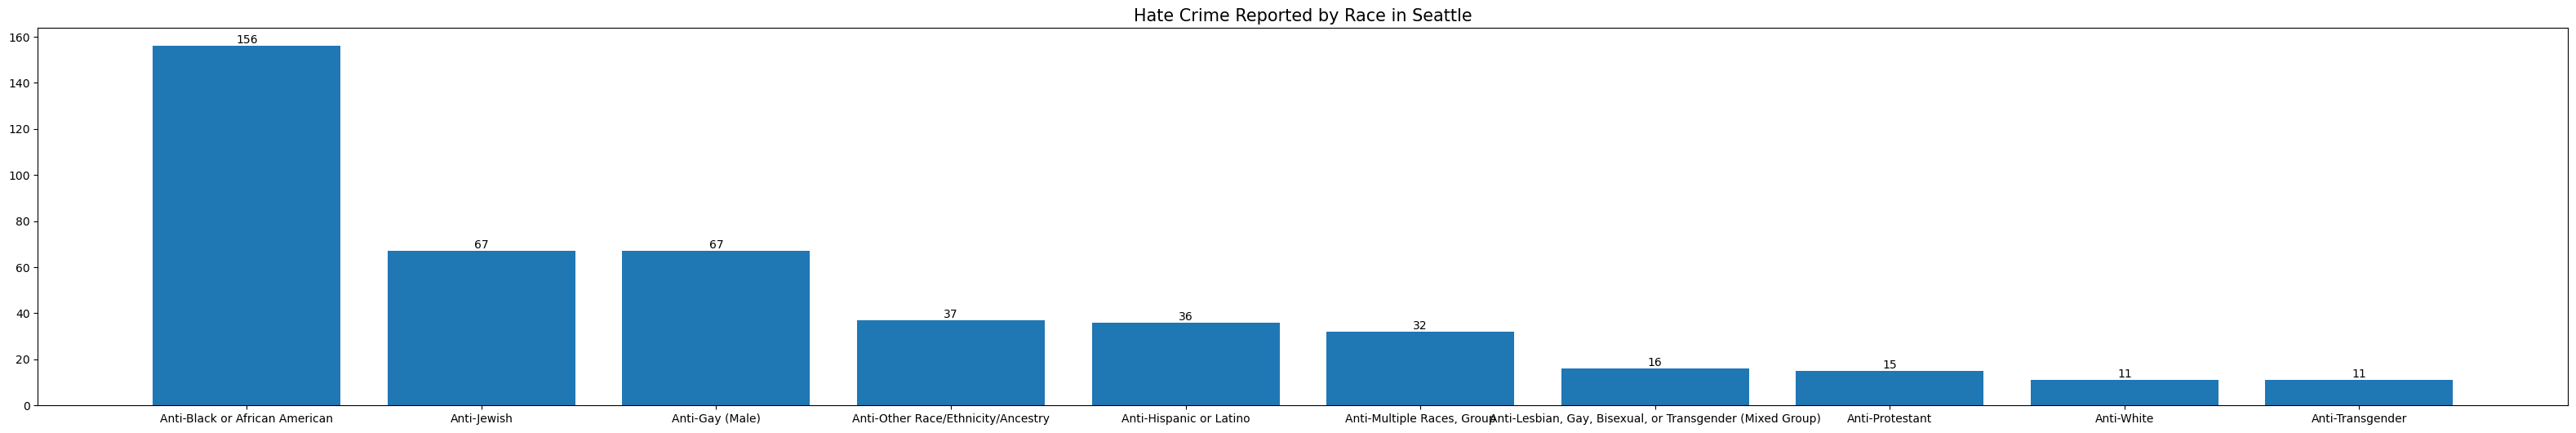

In [204]:
x= eugene.bias_desc.value_counts()[:10].index
y= eugene.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Seattle", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

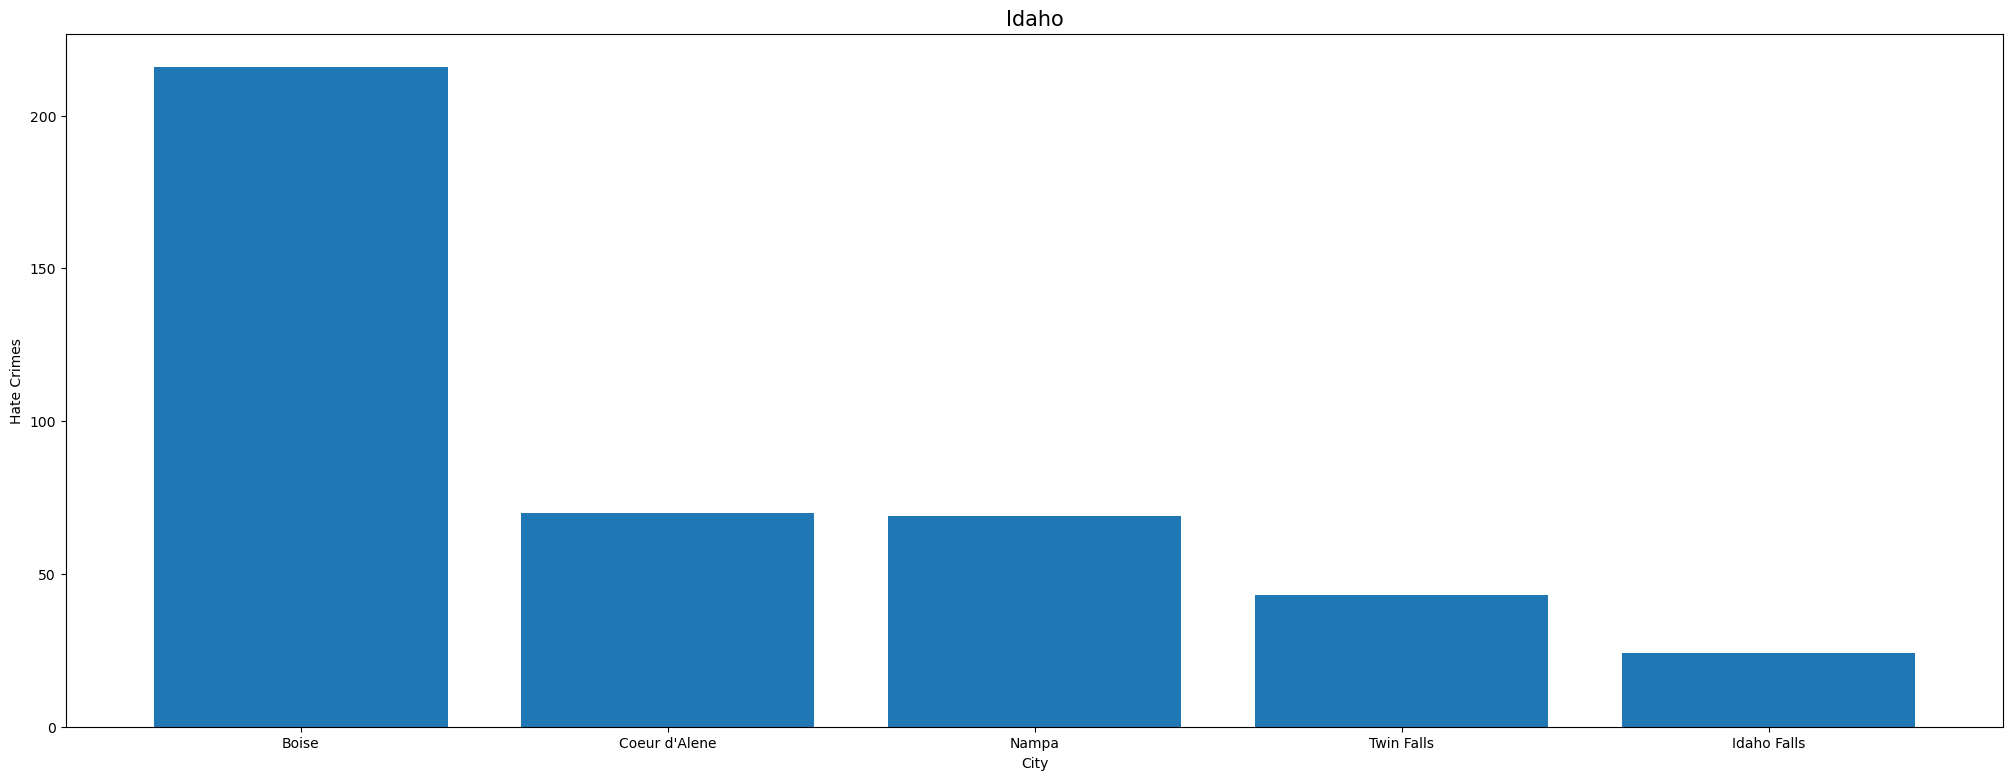

In [205]:
func('Idaho')

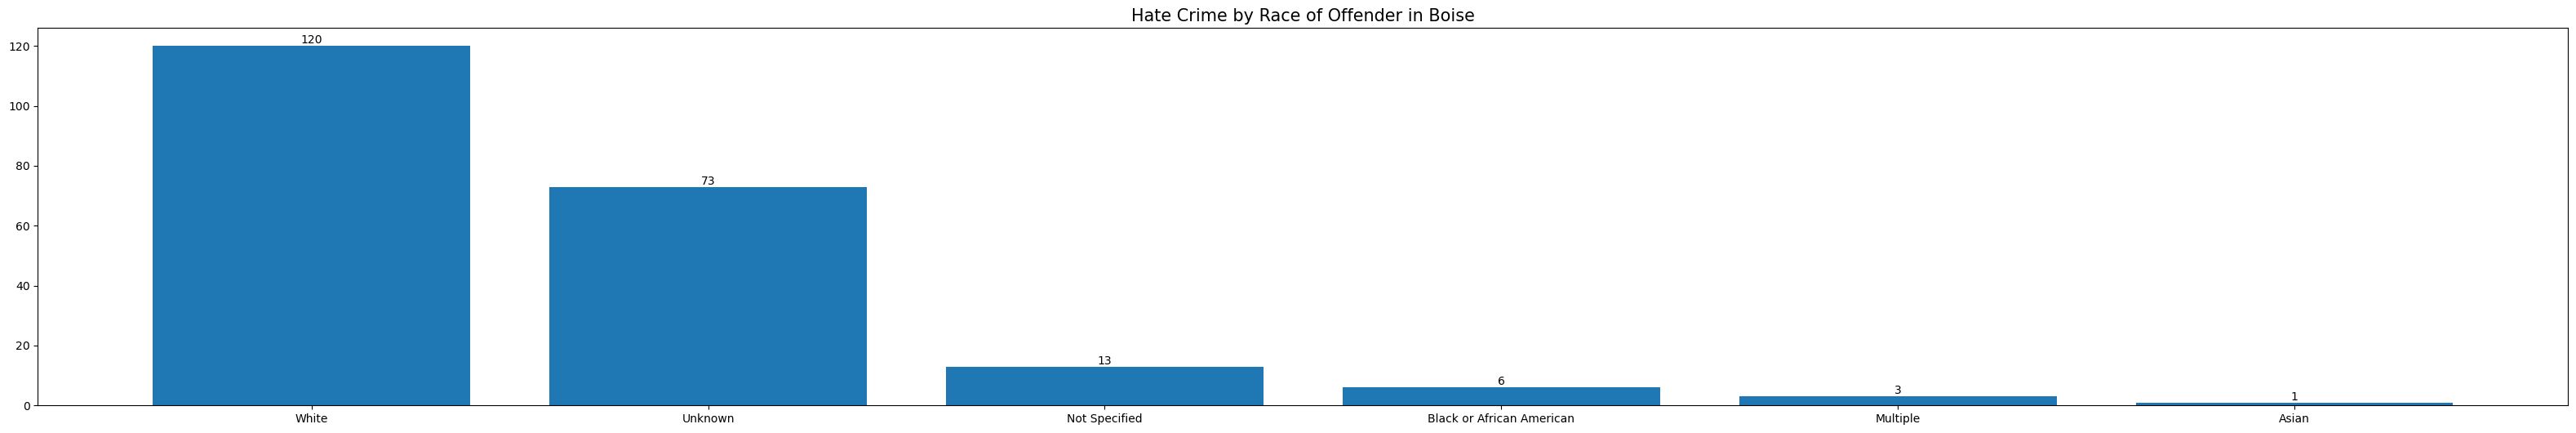

In [206]:
city_mask = hc['pug_agency_name'] == 'Boise'
state_mask = hc['state_name'] == 'Idaho'

Boise = hc[city_mask & state_mask] # a dataframe of only Boise, ID

x= Boise.offender_race.value_counts()[:10].index
y= Boise.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Boise", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )


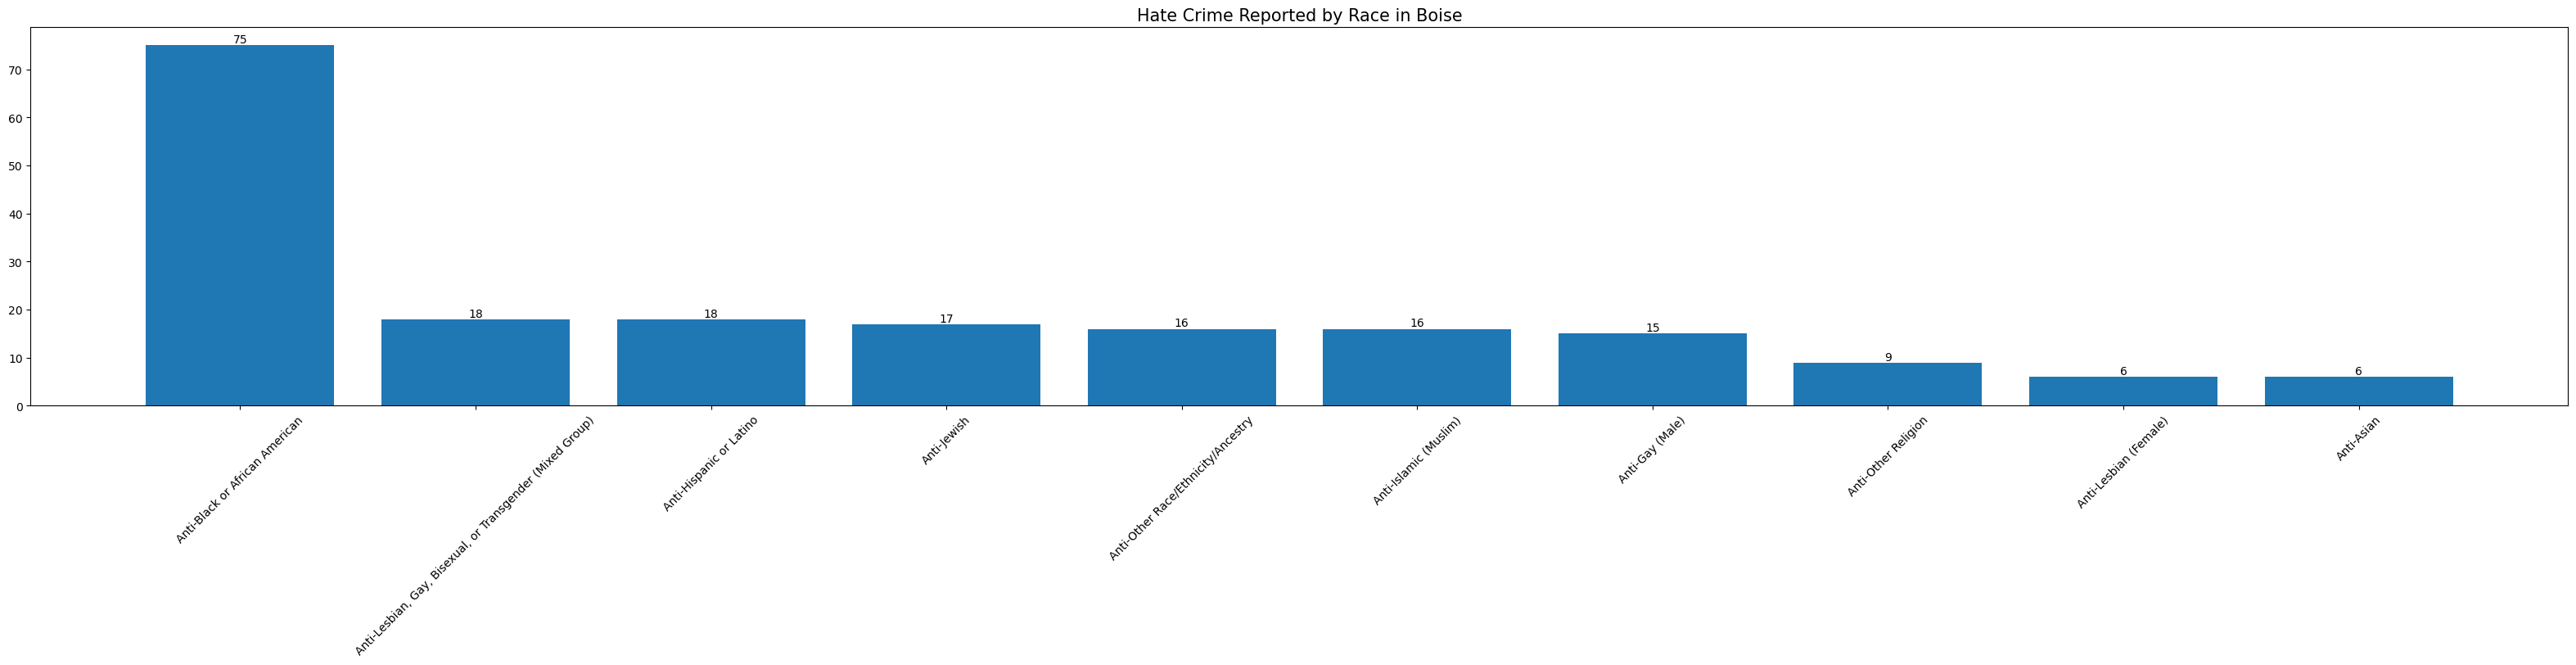

In [207]:
x= Boise.bias_desc.value_counts()[:10].index
y= Boise.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Boise", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )


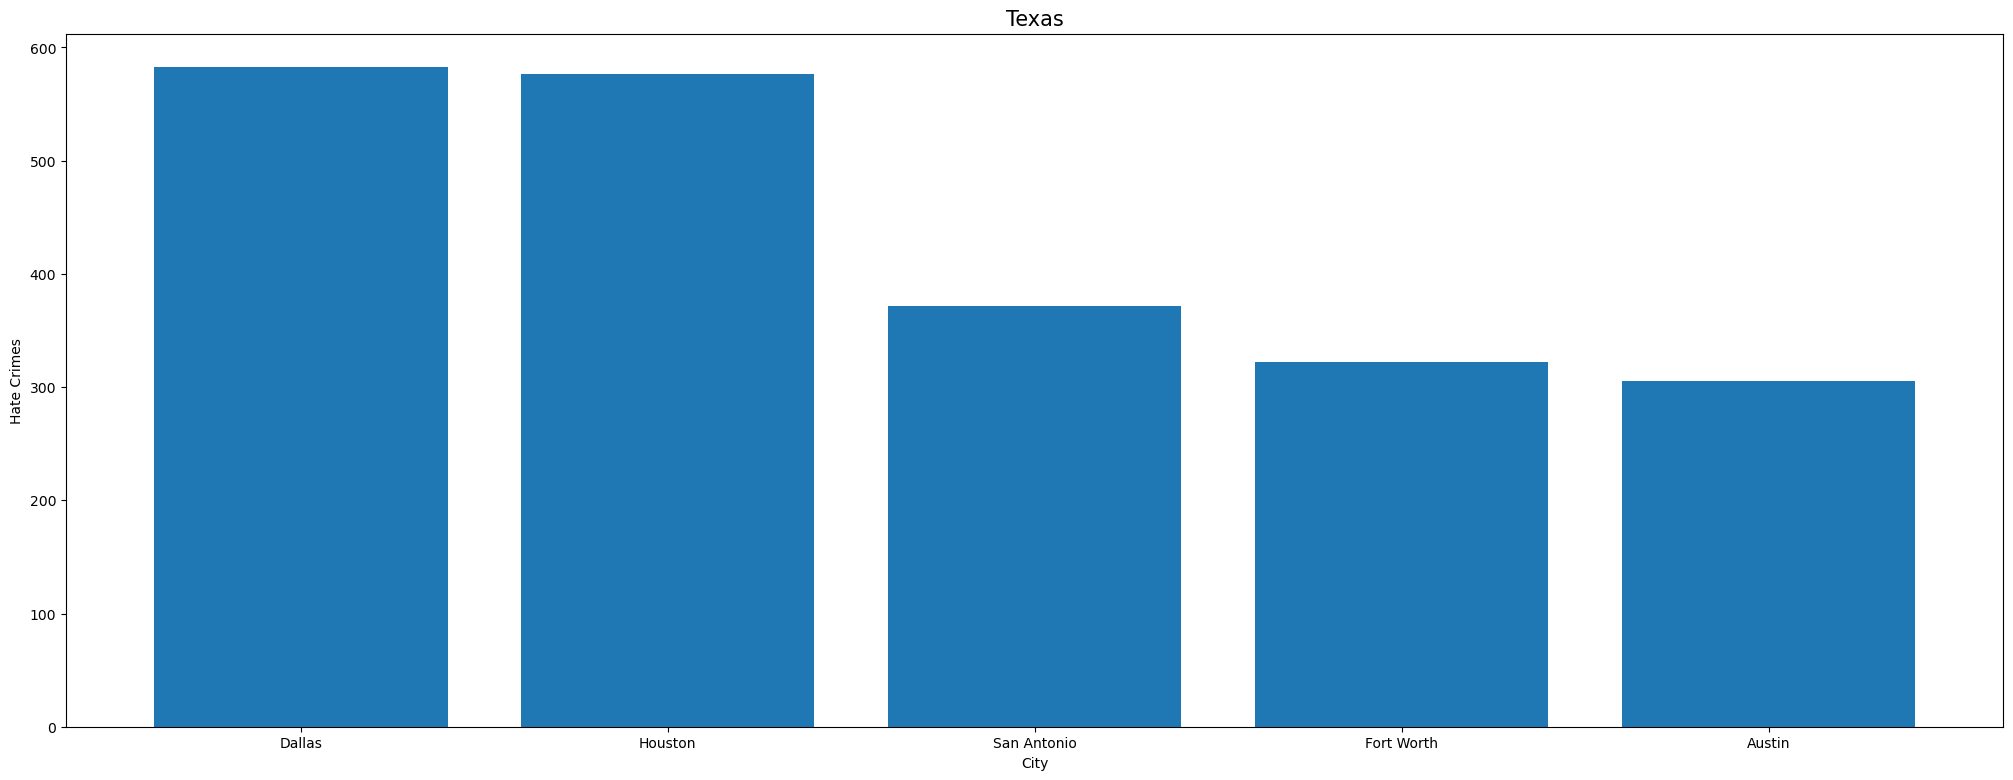

In [208]:
func('Texas')

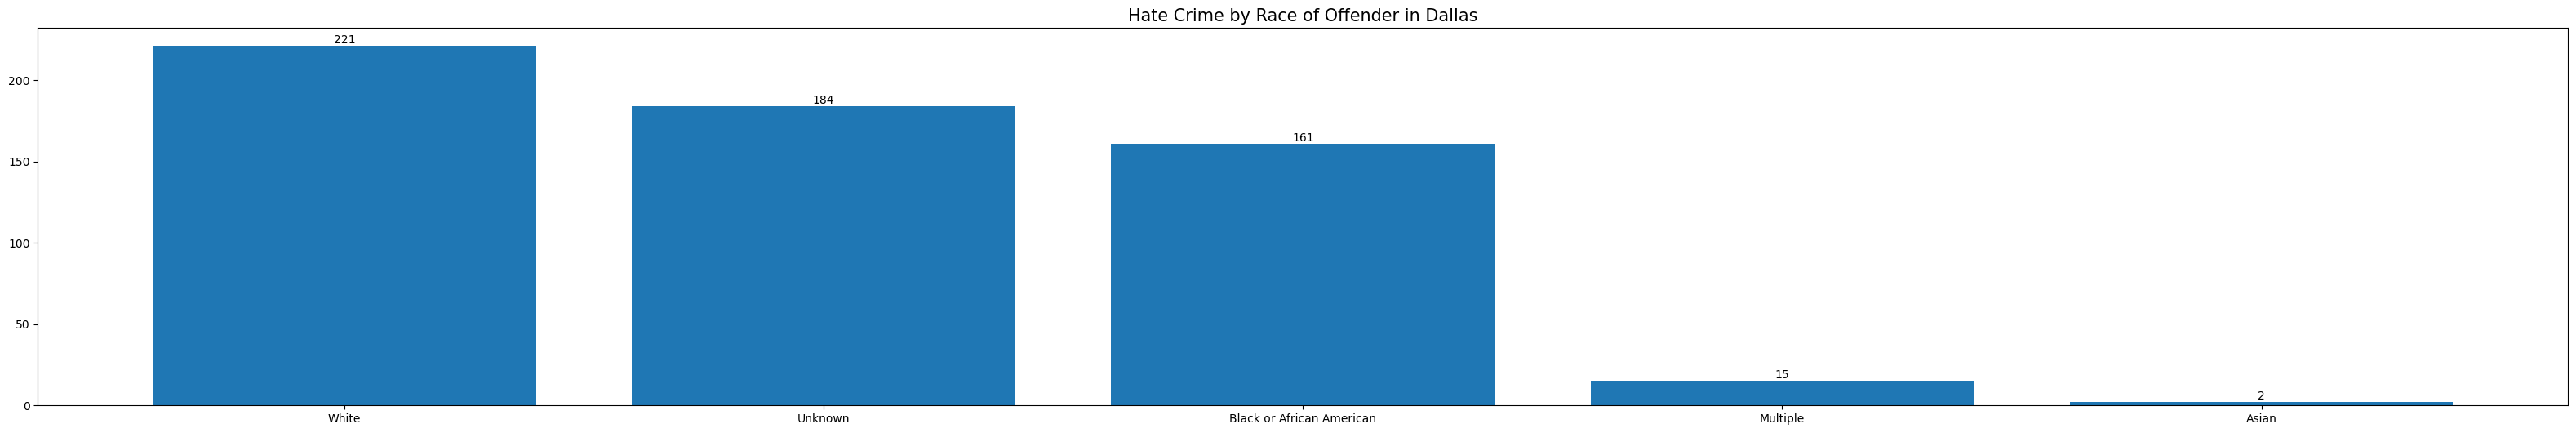

In [209]:
city_mask = hc['pug_agency_name'] == 'Dallas'
state_mask = hc['state_name'] == 'Texas'

Dallas = hc[city_mask & state_mask] # a dataframe of only Boise, ID

x= Dallas.offender_race.value_counts()[:10].index
y= Dallas.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Dallas", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

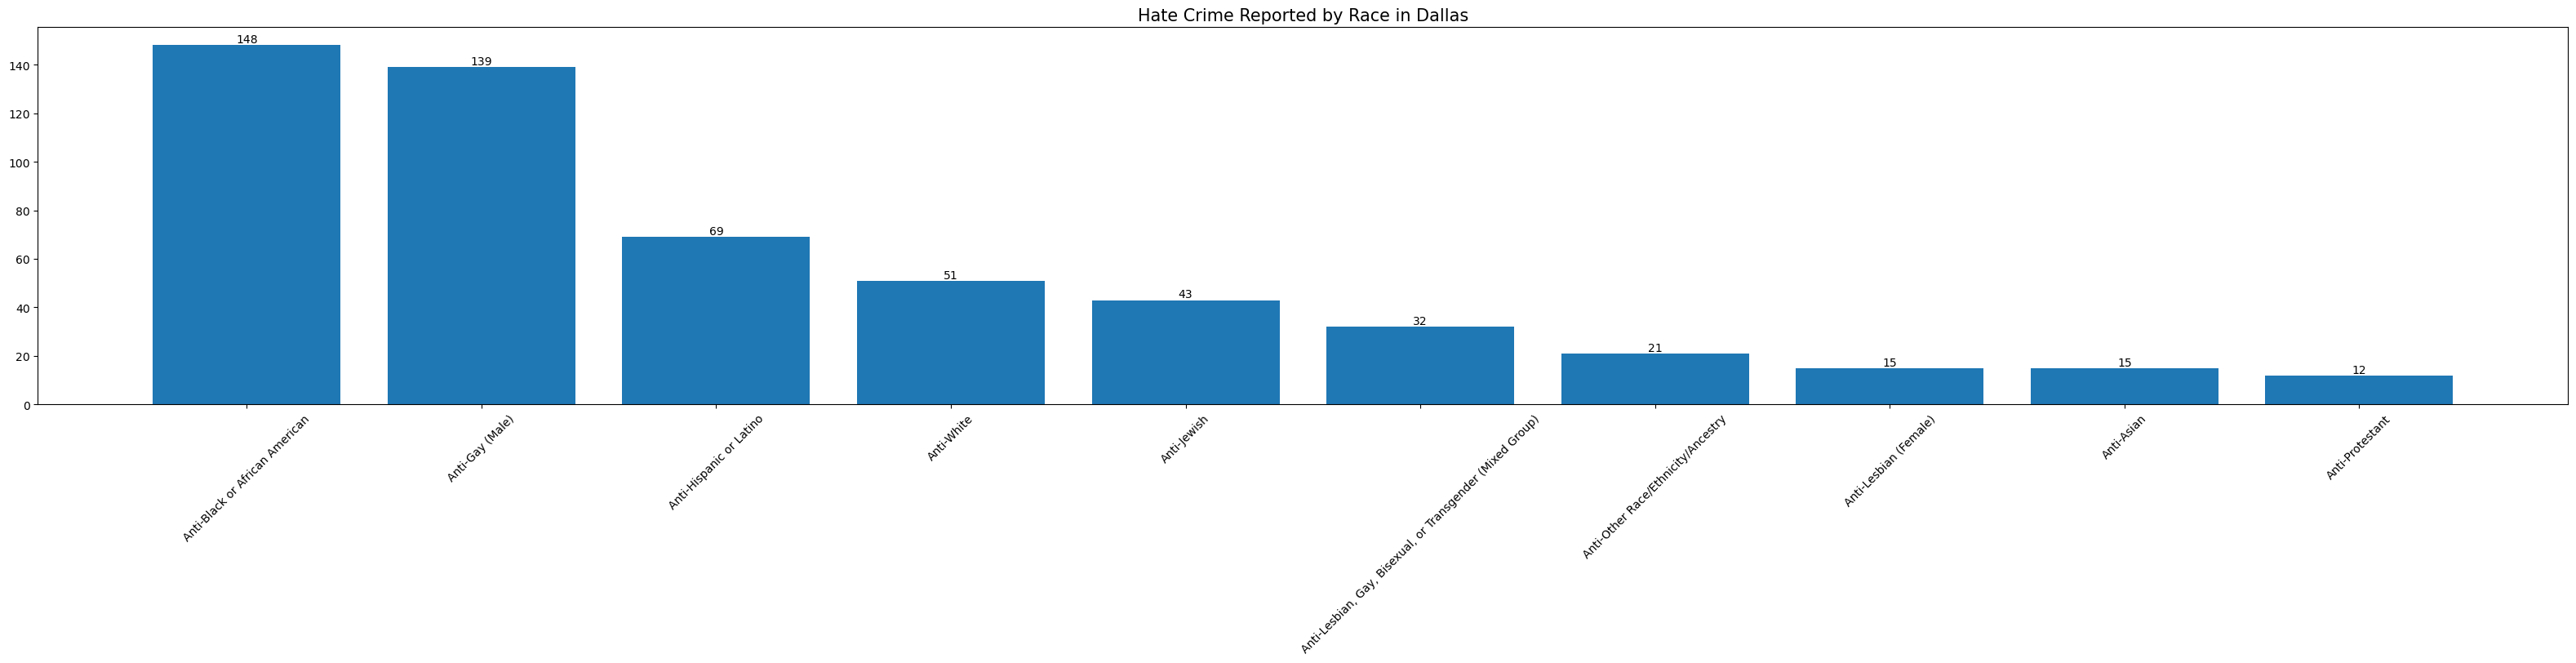

In [210]:
x= Dallas.bias_desc.value_counts()[:10].index
y= Dallas.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Dallas", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

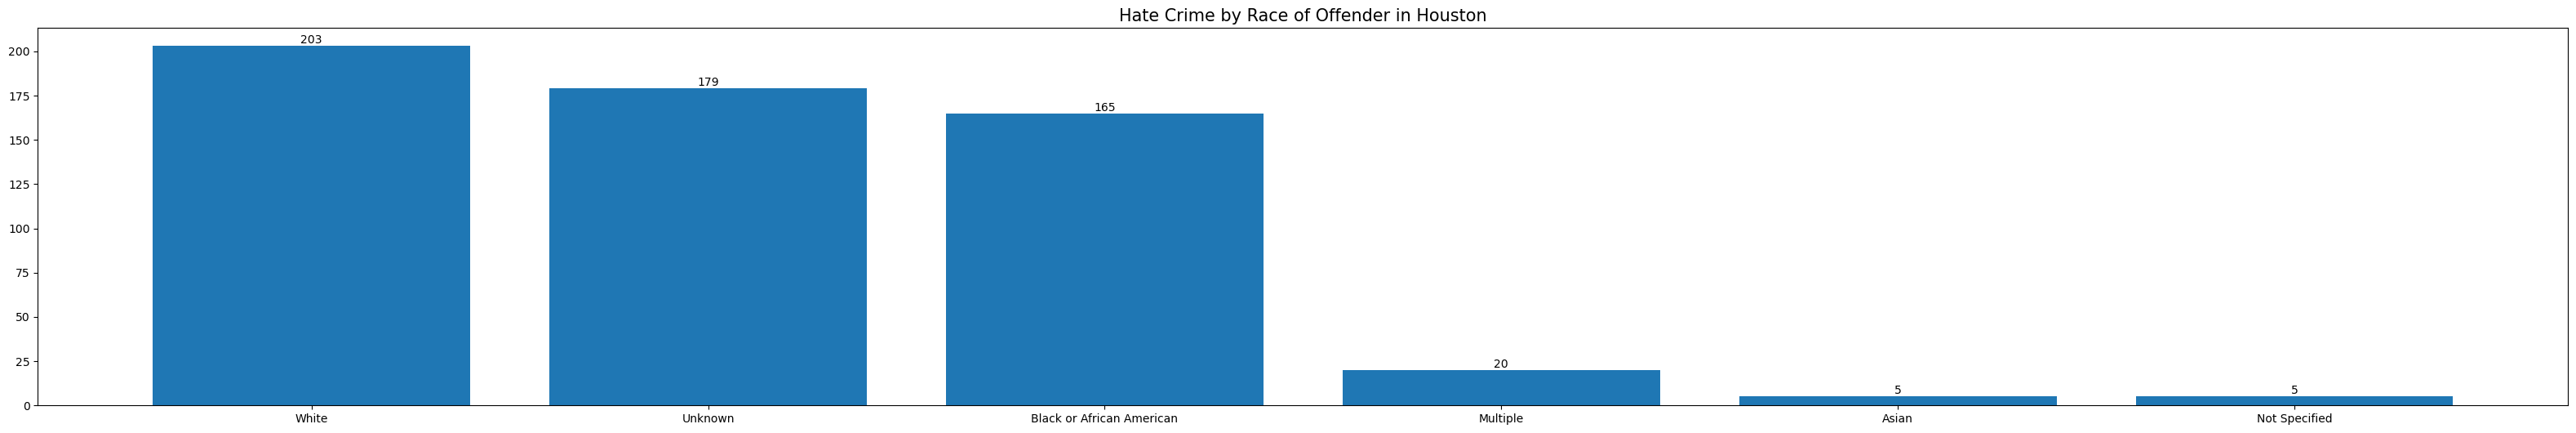

In [211]:
city_mask = hc['pug_agency_name'] == 'Houston'
state_mask = hc['state_name'] == 'Texas'

Houston = hc[city_mask & state_mask] # a dataframe of only Boise, ID

x= Houston.offender_race.value_counts()[:10].index
y= Houston.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Houston", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

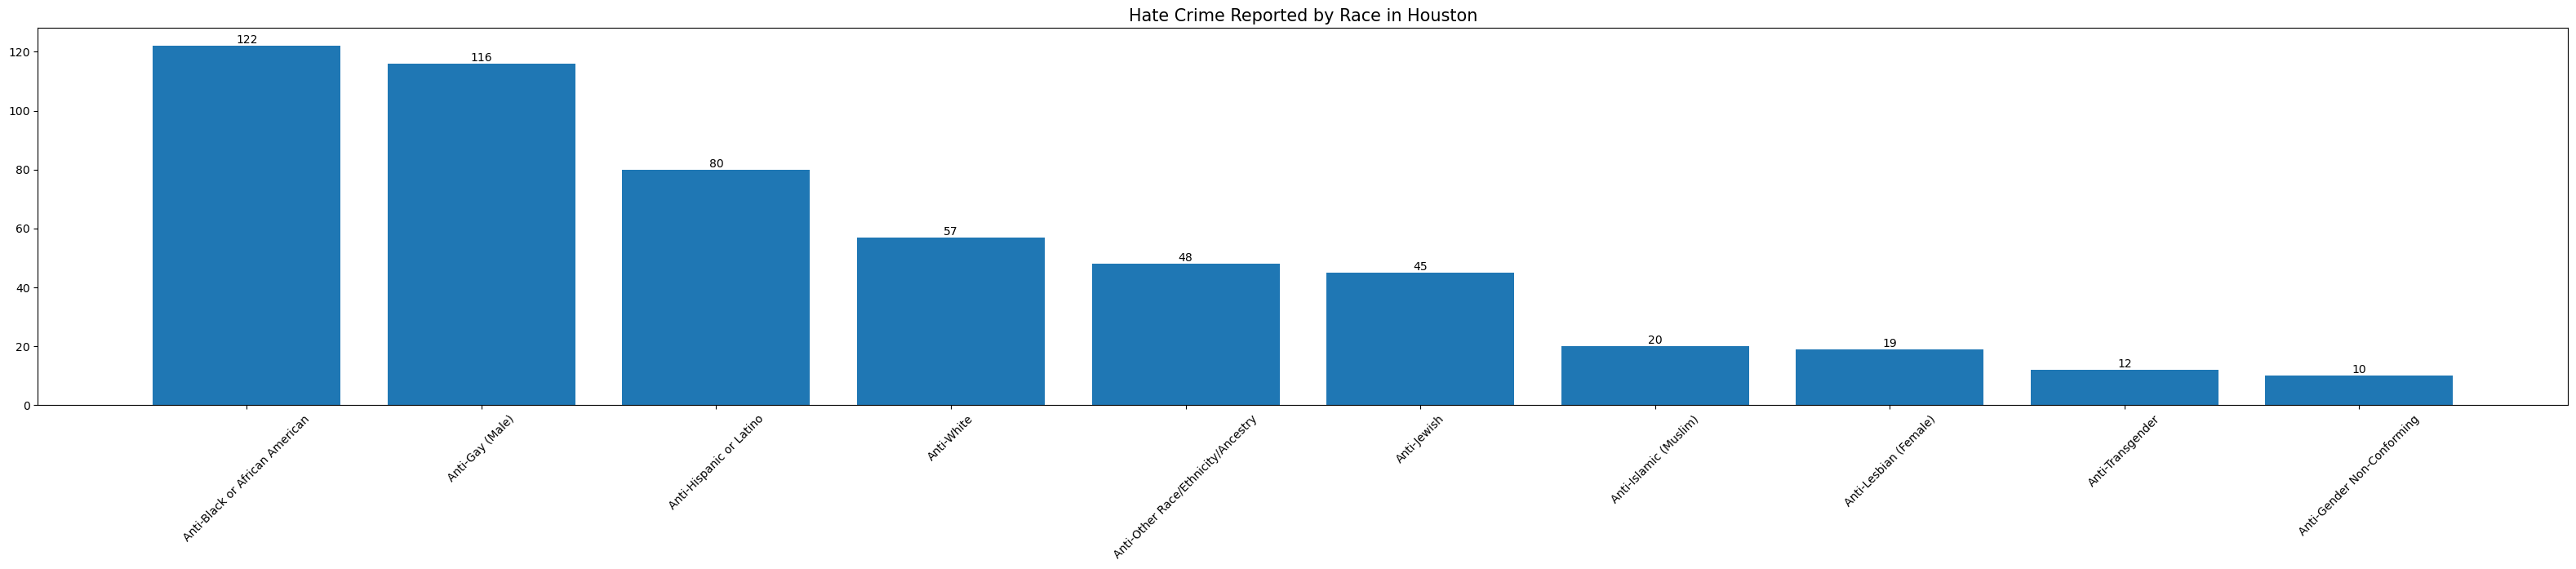

In [212]:
x= Houston.bias_desc.value_counts()[:10].index
y= Houston.bias_desc.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Houston", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

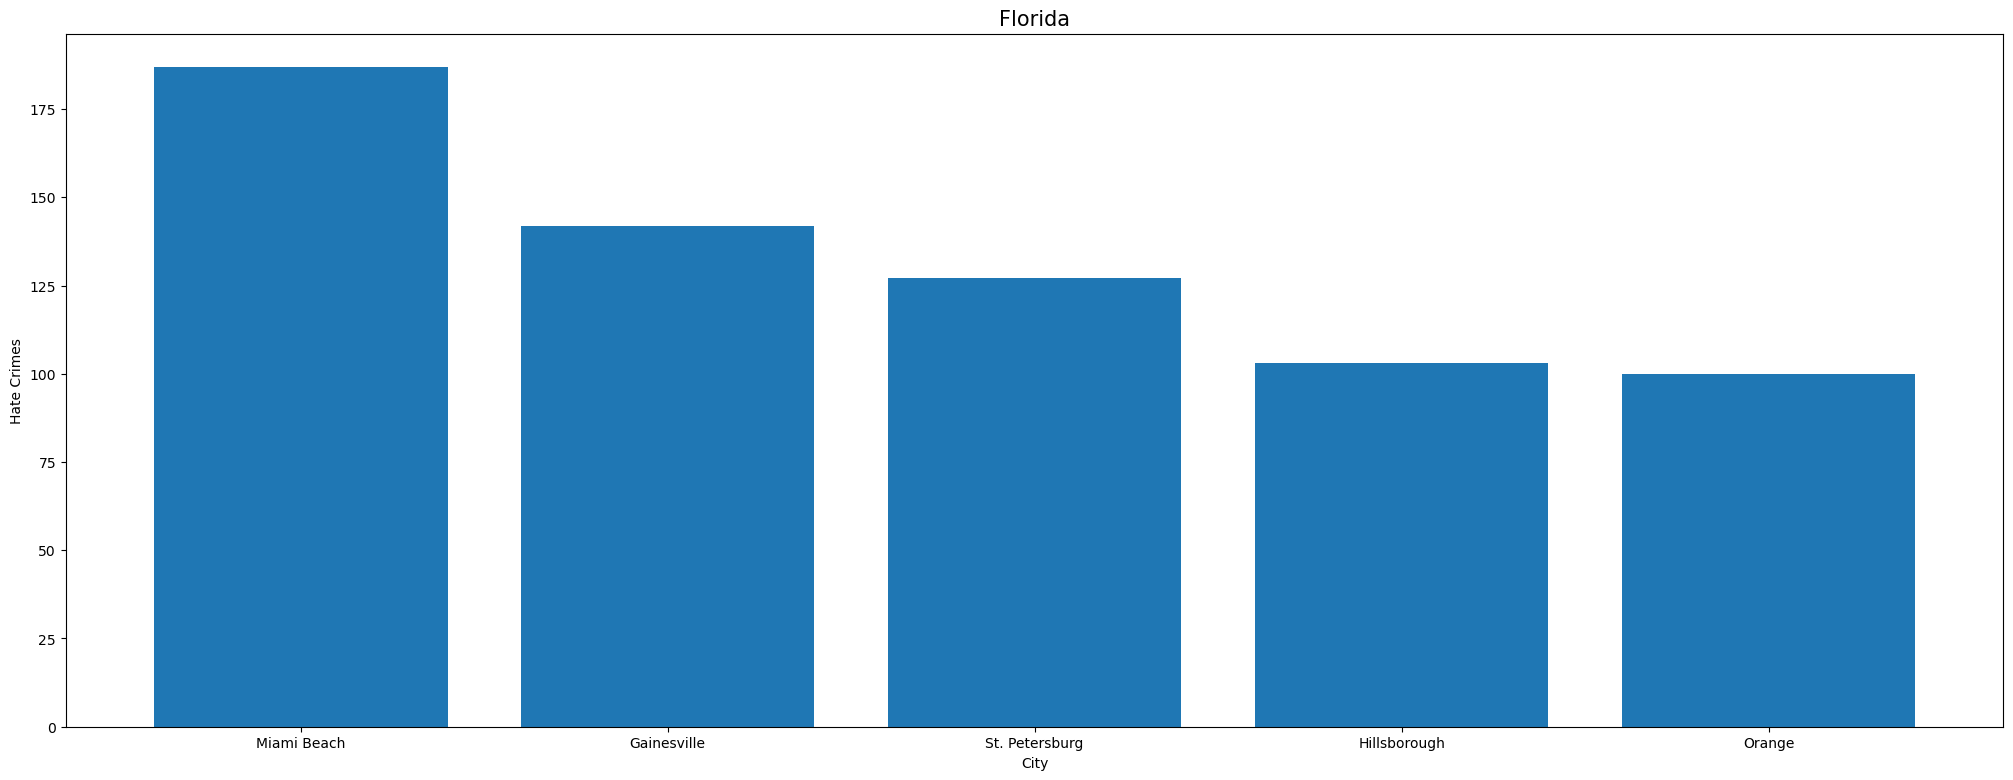

In [213]:
func('Florida')

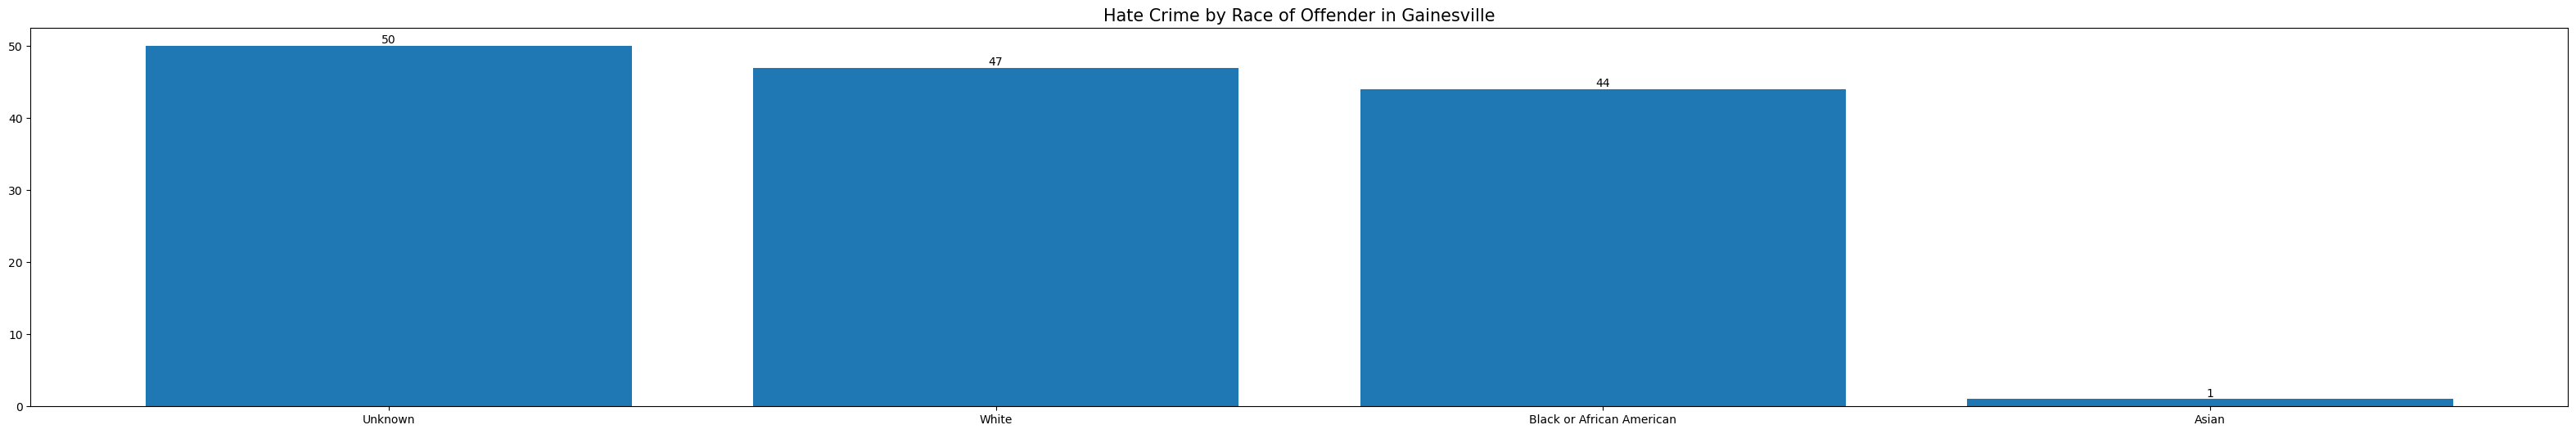

In [214]:
city_mask = hc['pug_agency_name'] == 'Gainesville'
state_mask = hc['state_name'] == 'Florida'

Gainesville = hc[city_mask & state_mask] # a dataframe of only Boise, ID

x= Gainesville.offender_race.value_counts()[:10].index
y= Gainesville.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Gainesville", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

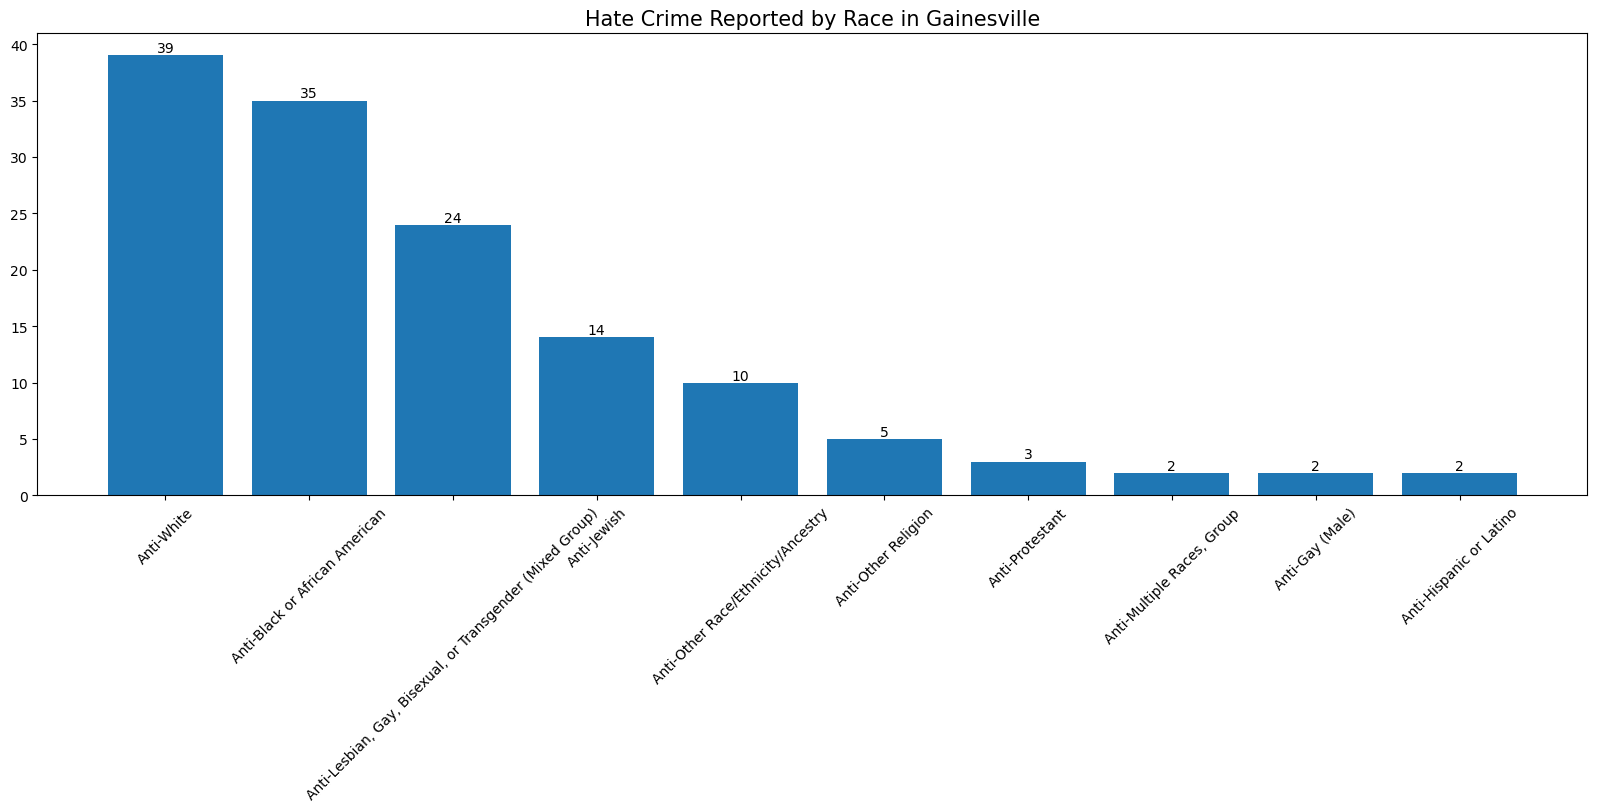

In [215]:
x= Gainesville.bias_desc.value_counts()[:10].index
y= Gainesville.bias_desc.value_counts()[:10].values
plt.figure(figsize=(20, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Gainesville", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

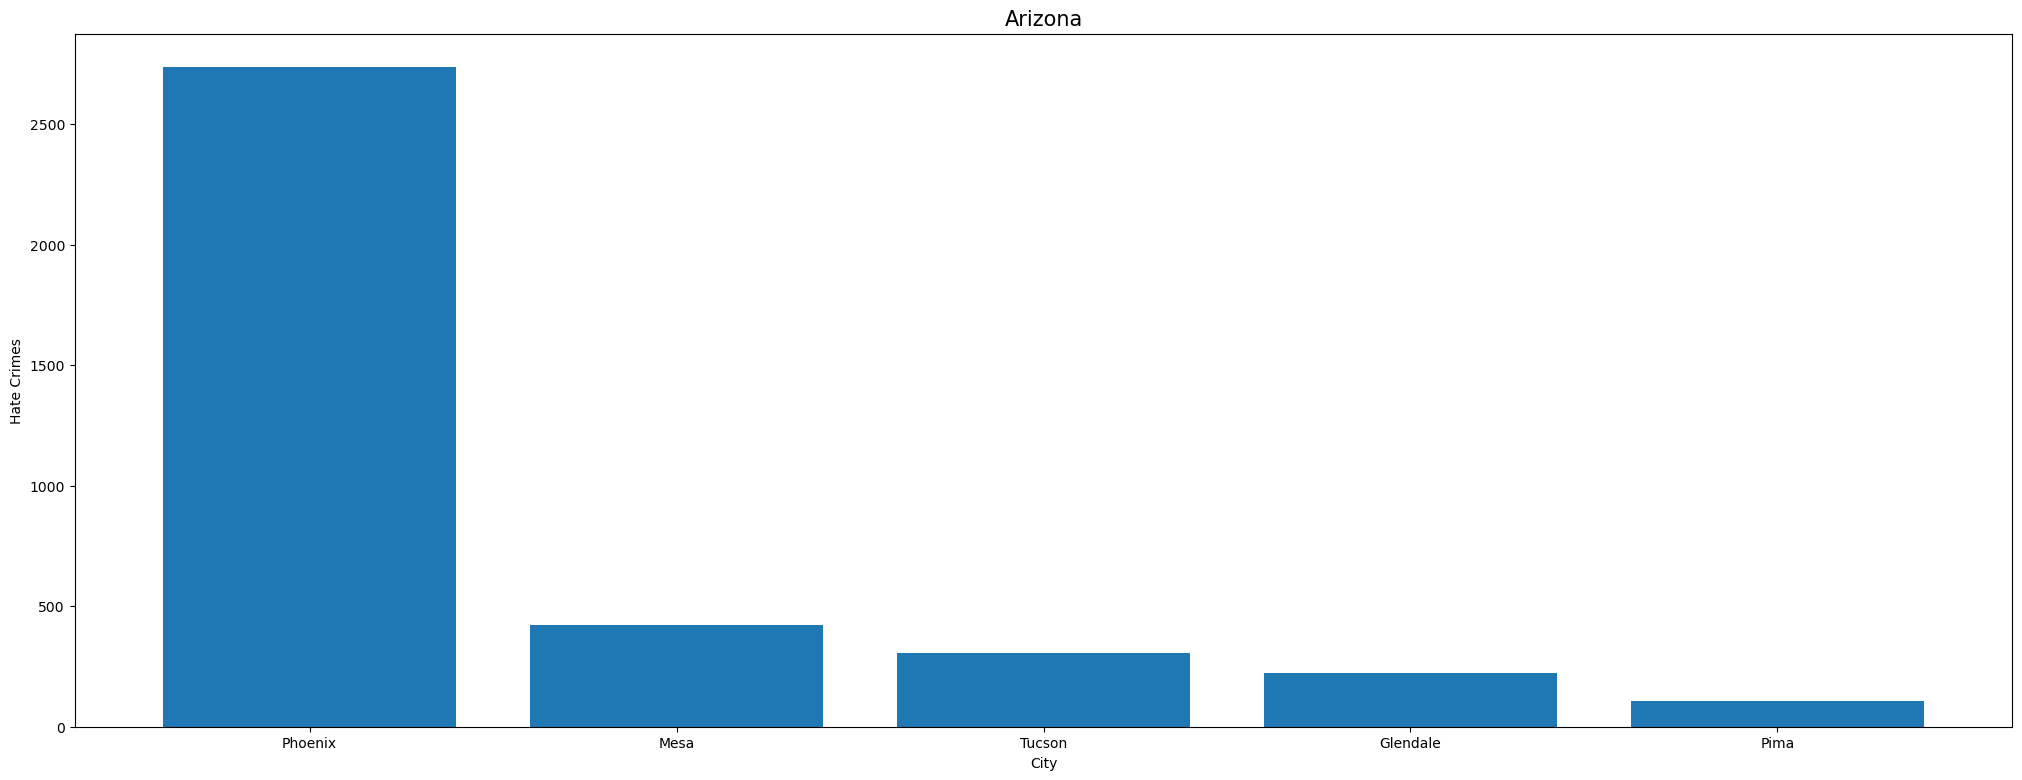

In [216]:
func('Arizona')

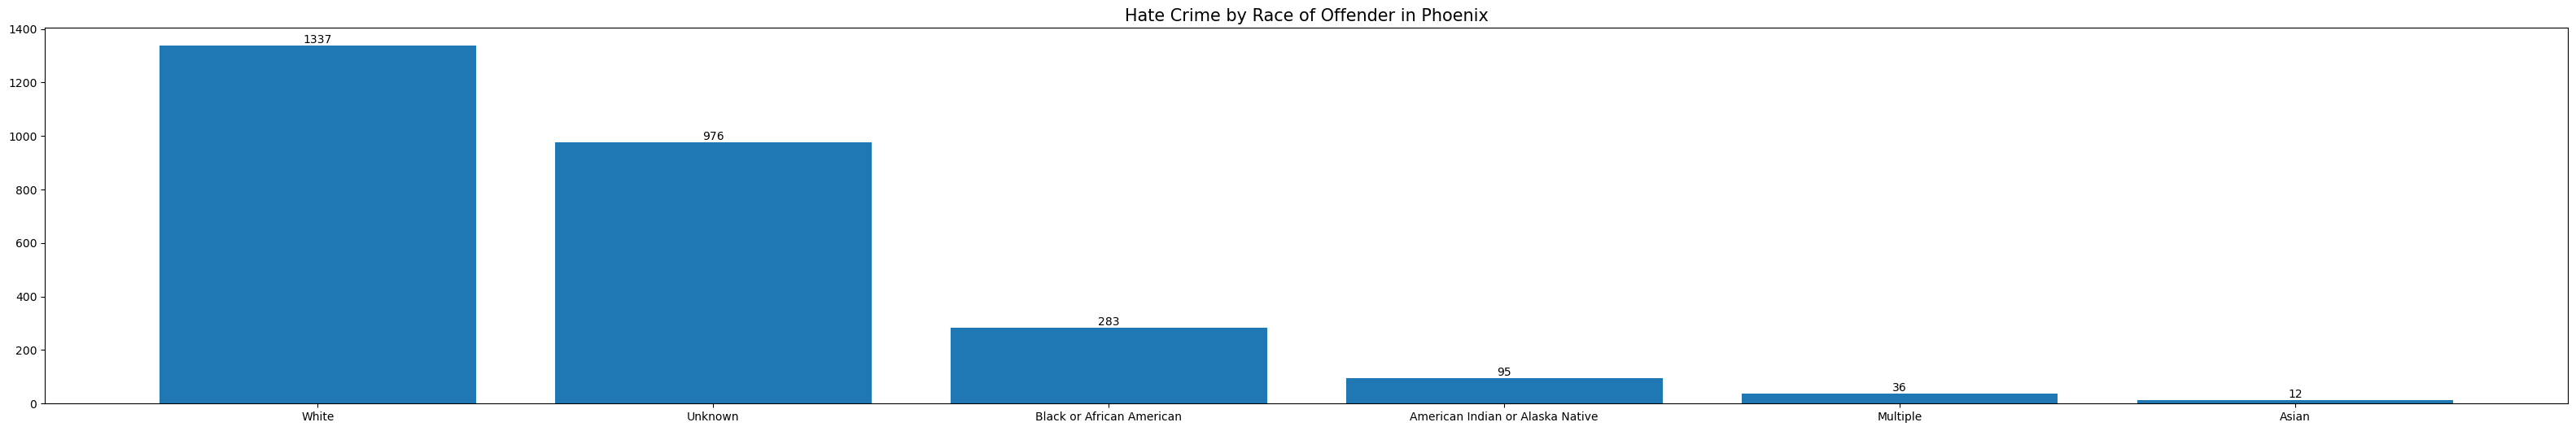

In [217]:
city_mask = hc['pug_agency_name'] == 'Phoenix'
state_mask = hc['state_name'] == 'Arizona'

px = hc[city_mask & state_mask] # a dataframe of only Boise, ID

x= px.offender_race.value_counts()[:10].index
y= px.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Phoenix", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

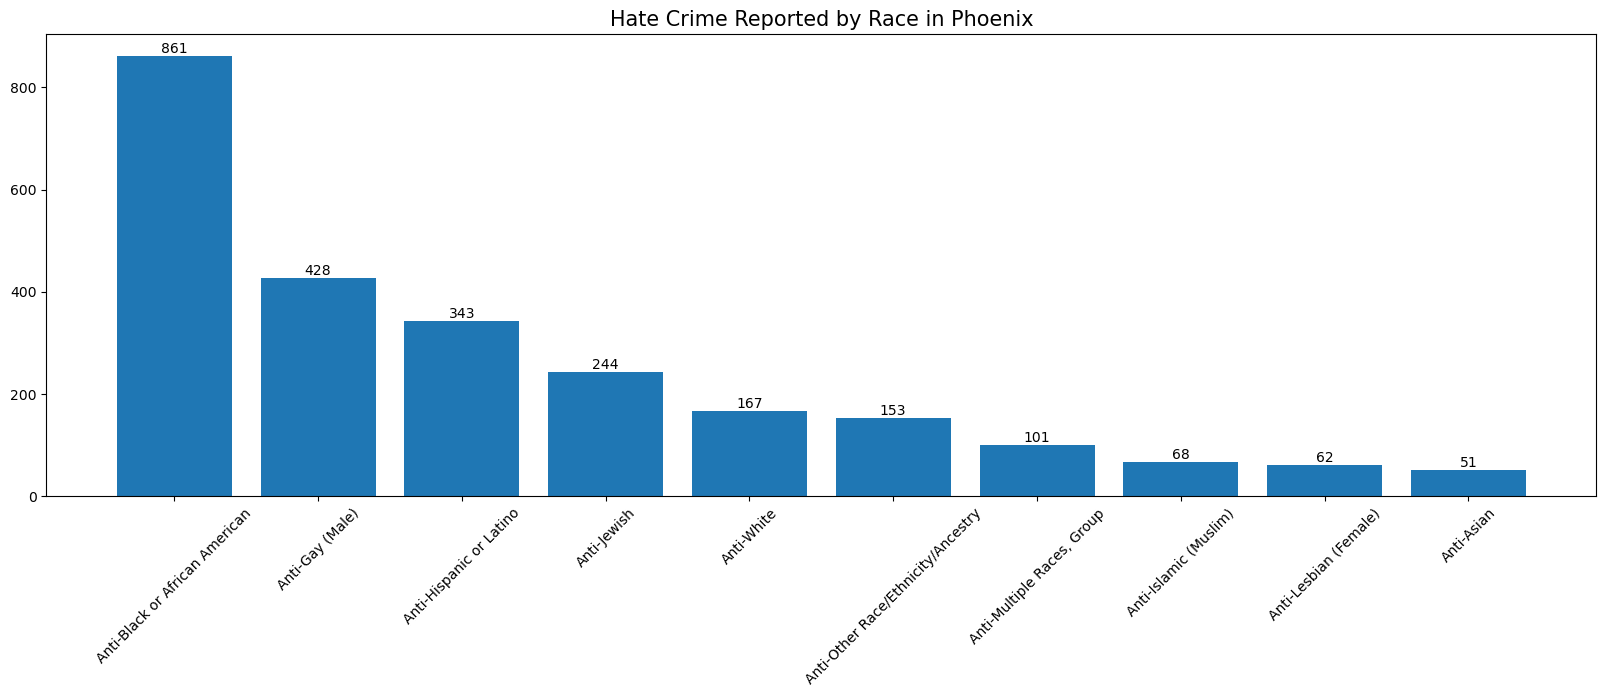

In [218]:
x= px.bias_desc.value_counts()[:10].index
y= px.bias_desc.value_counts()[:10].values
plt.figure(figsize=(20, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Phoenix", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

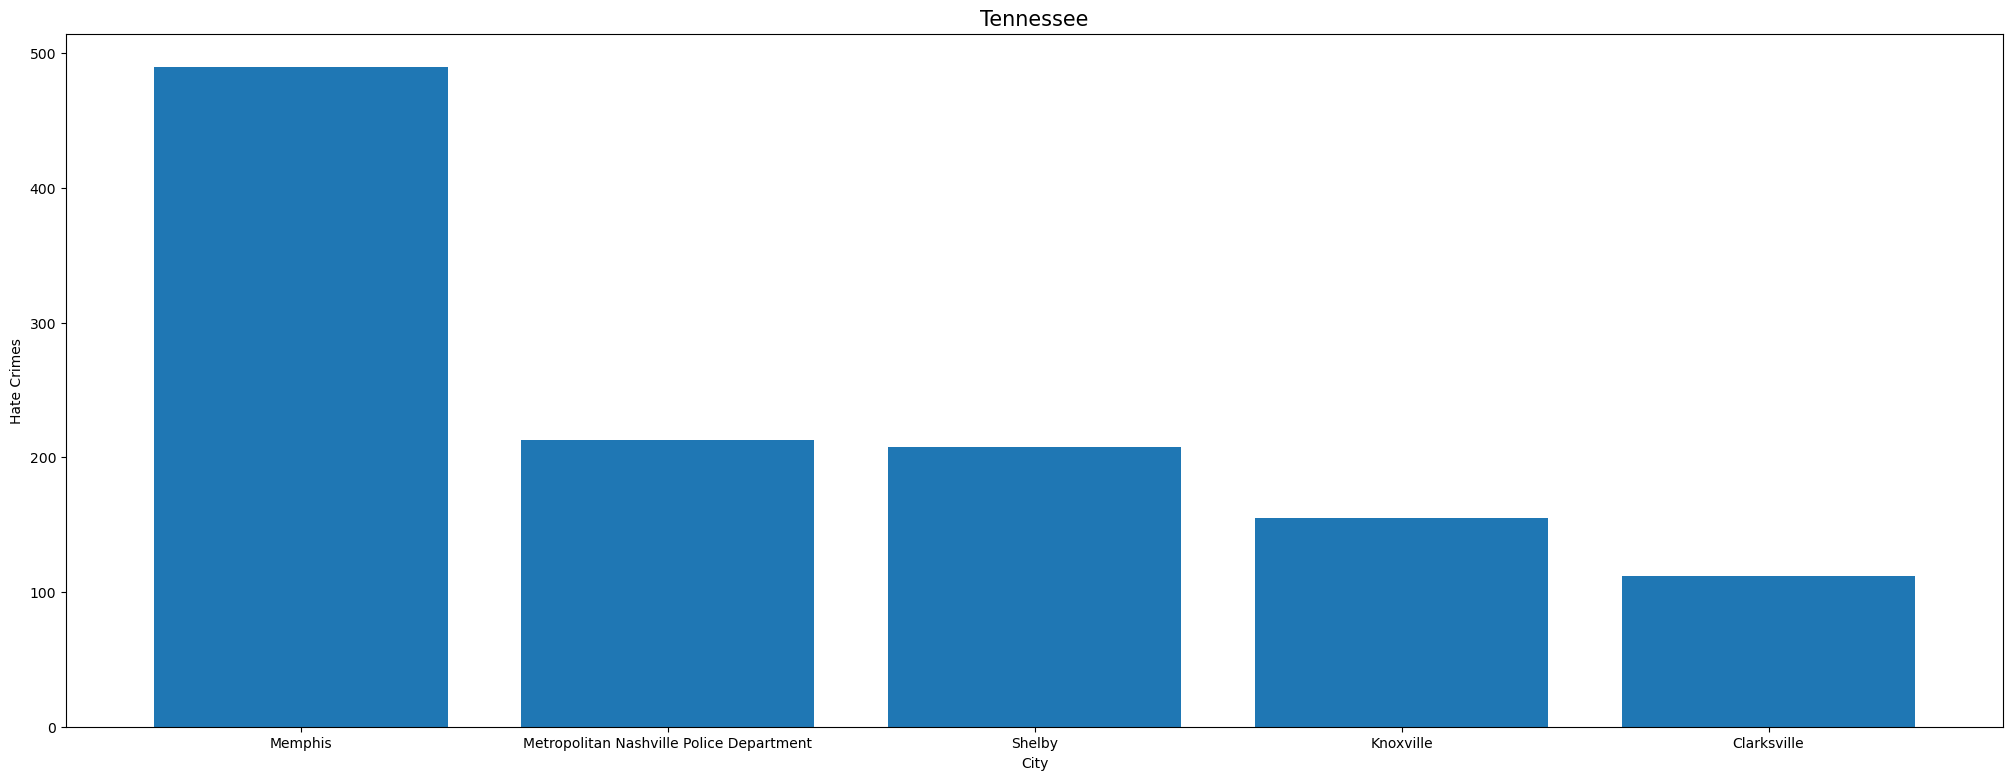

In [219]:
func('Tennessee')

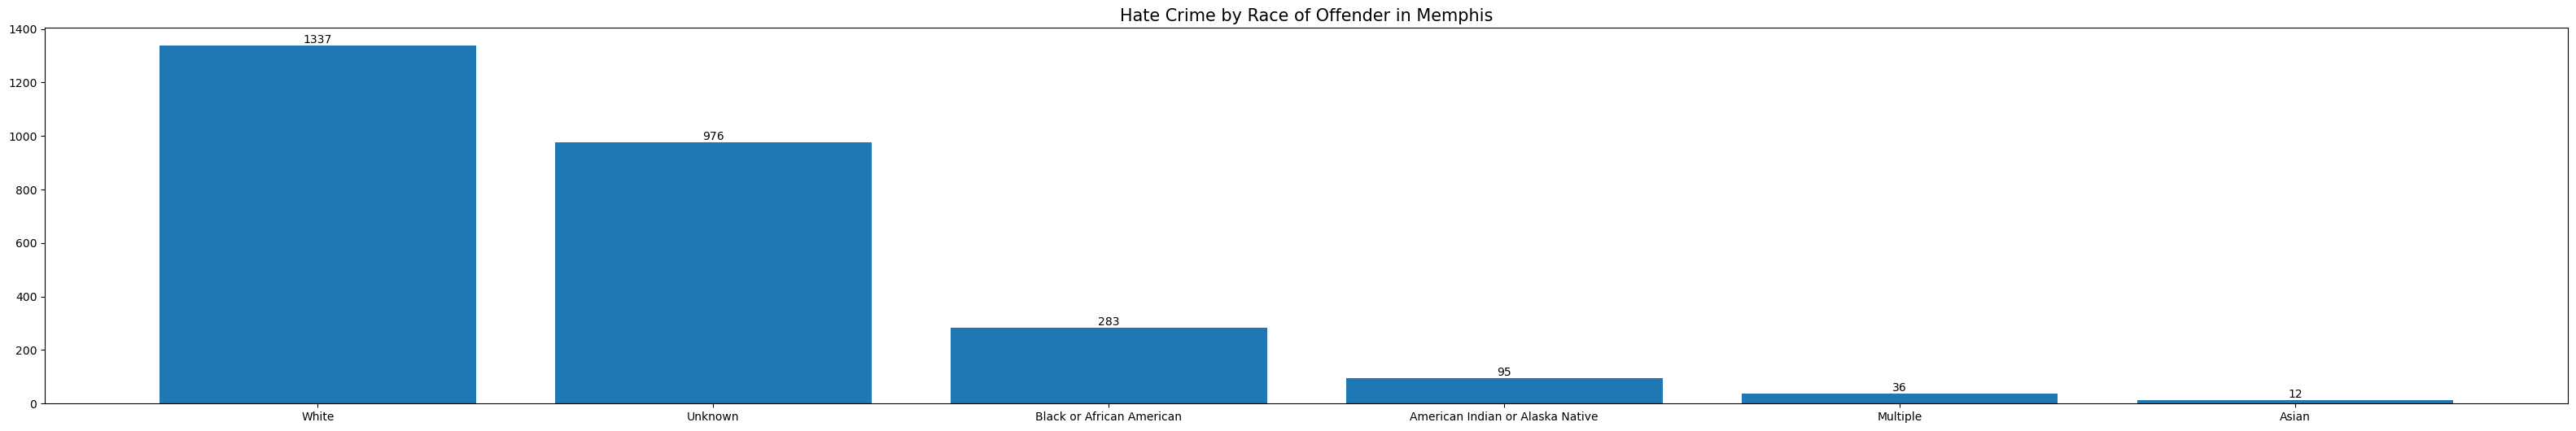

In [220]:
city_mask = hc['pug_agency_name'] == 'Phoenix'
state_mask = hc['state_name'] == 'Arizona'

ms = hc[city_mask & state_mask] # a dataframe of only Boise, ID

x= ms.offender_race.value_counts()[:10].index
y= ms.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Memphis", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

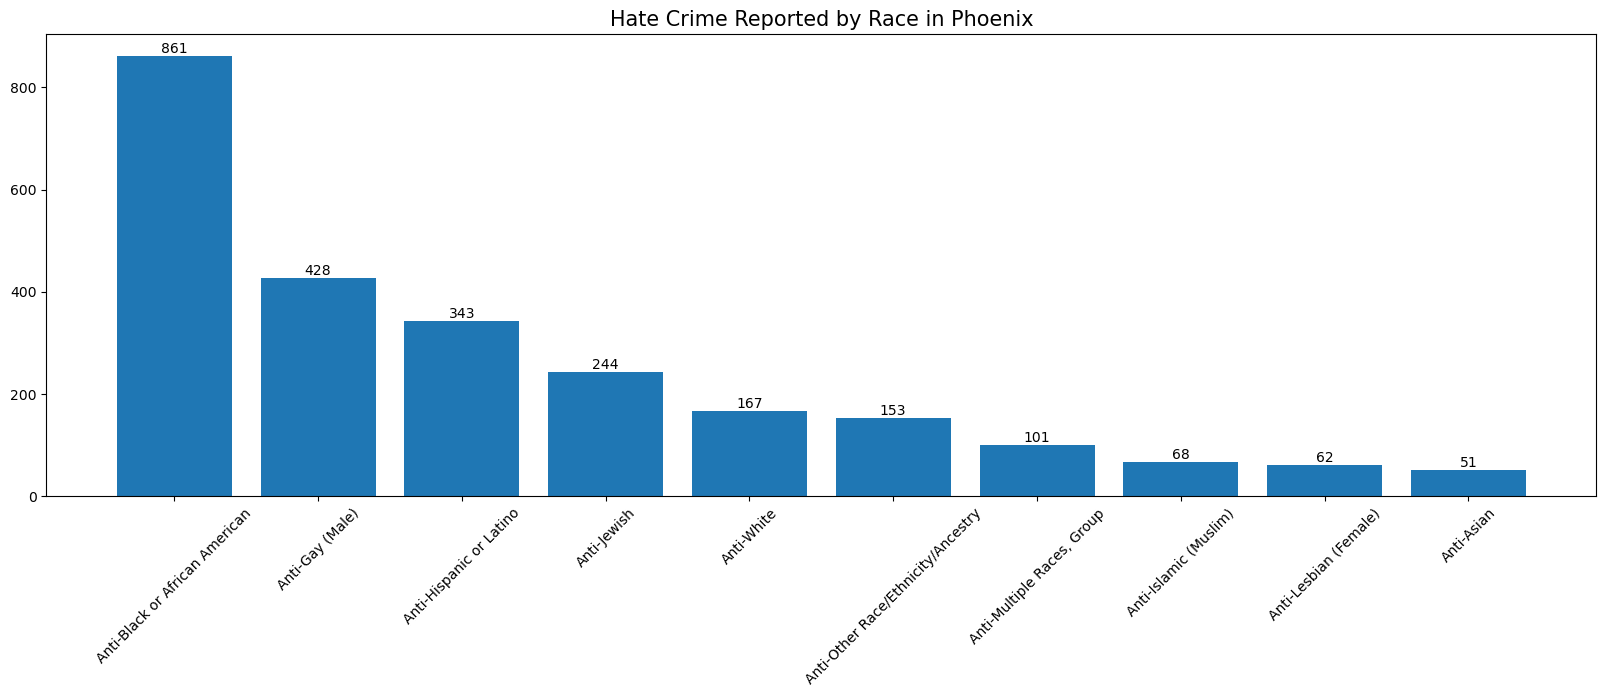

In [221]:
x= ms.bias_desc.value_counts()[:10].index
y= ms.bias_desc.value_counts()[:10].values
plt.figure(figsize=(20, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Phoenix", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

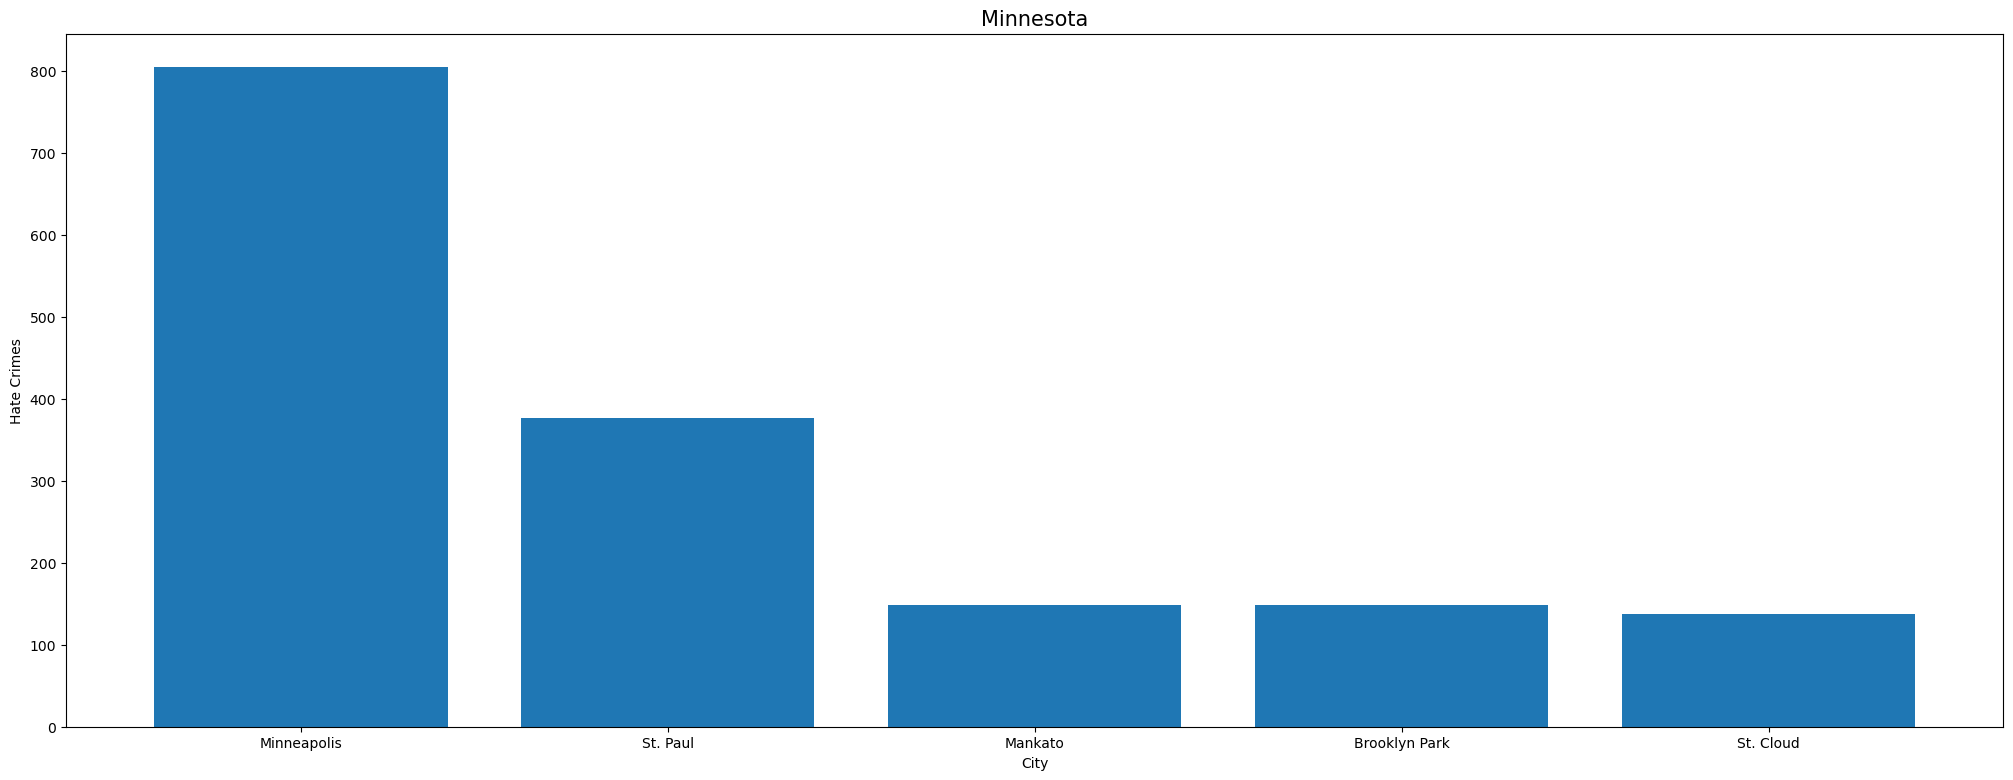

In [222]:
func('Minnesota')

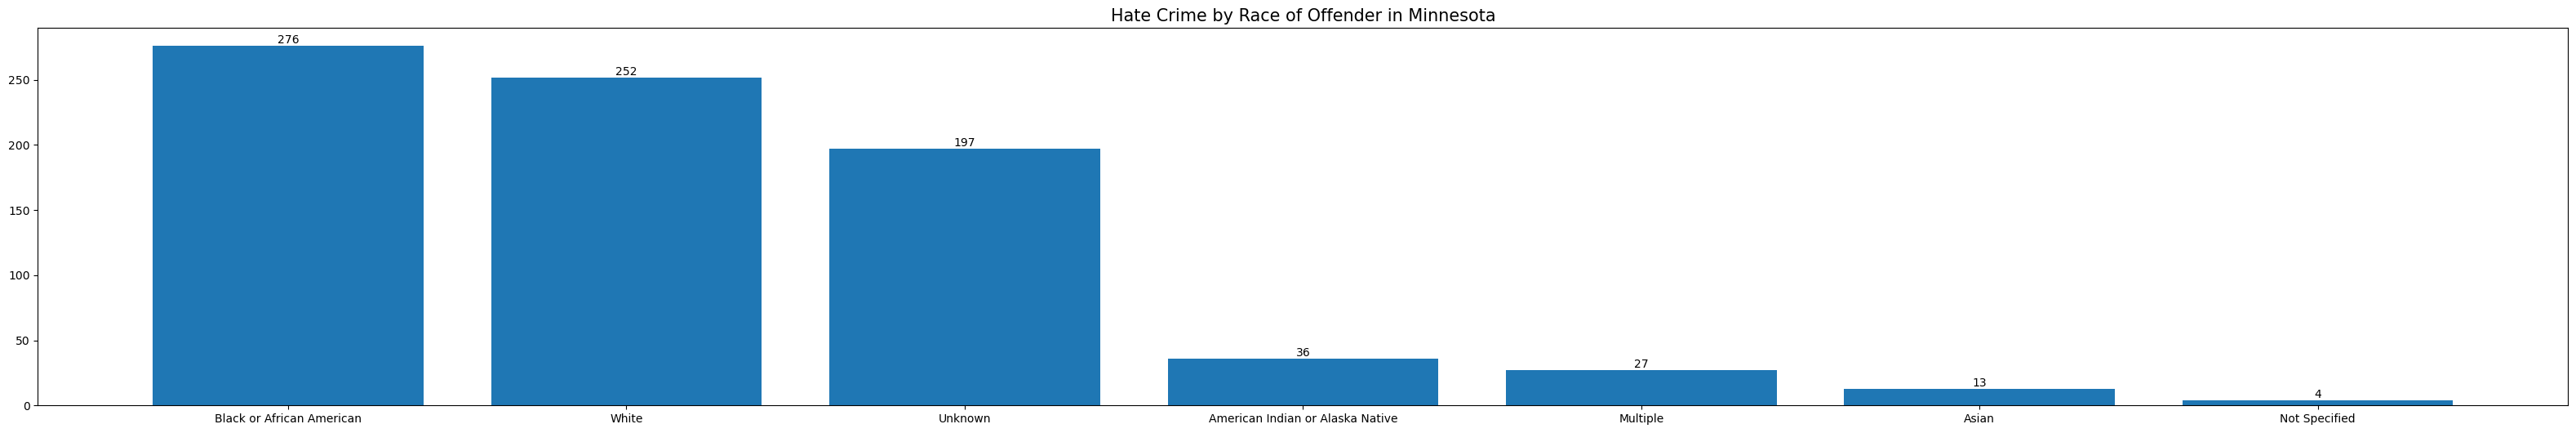

In [223]:
city_mask = hc['pug_agency_name'] == 'Minneapolis'
state_mask = hc['state_name'] == 'Minnesota'

mn = hc[city_mask & state_mask] # a dataframe of only Boise, ID

x= mn.offender_race.value_counts()[:10].index
y= mn.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Minnesota", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

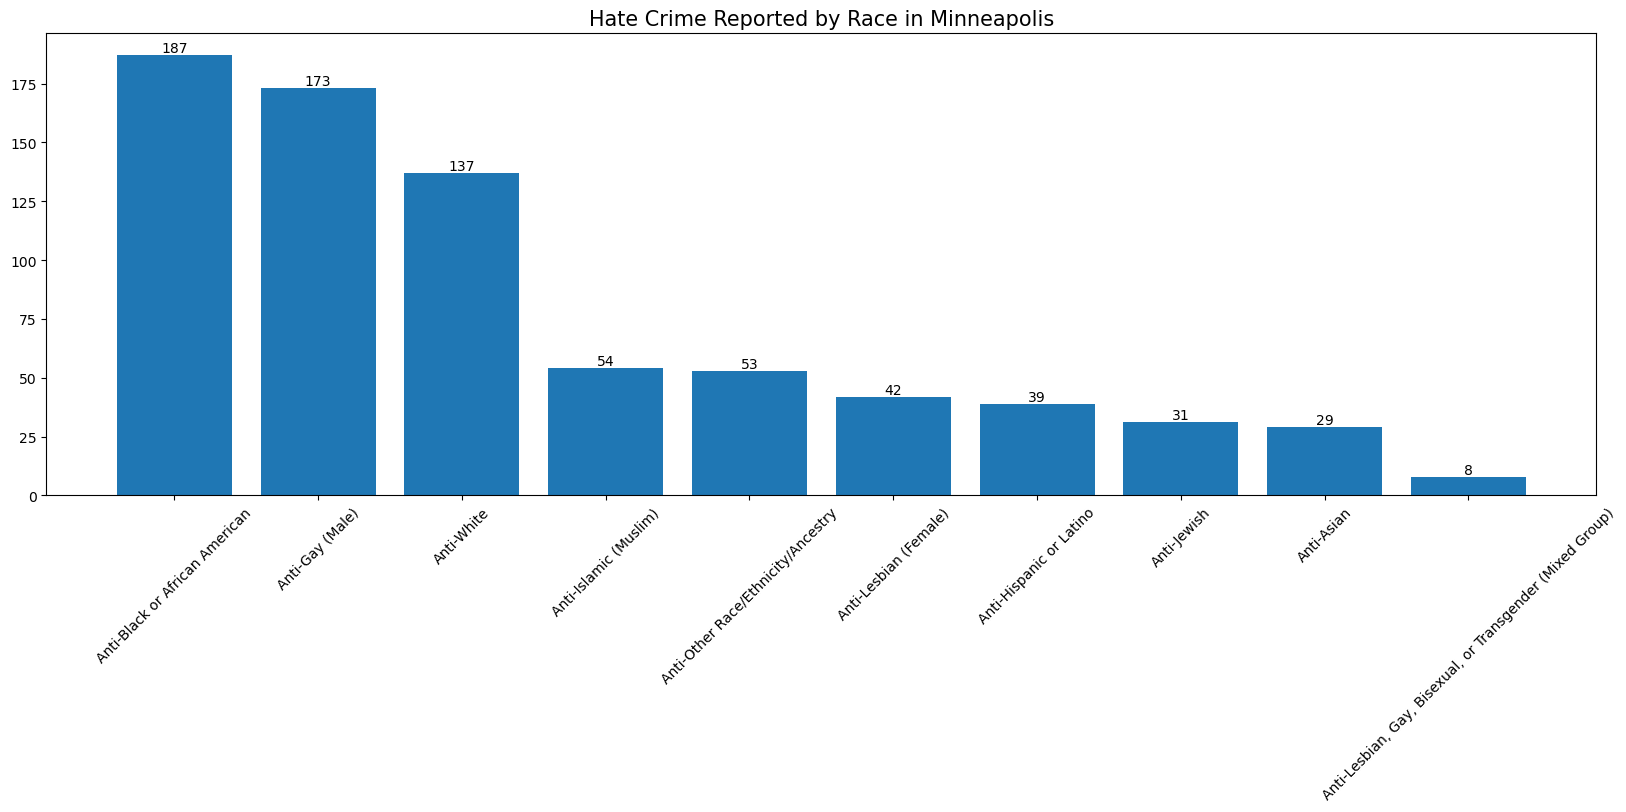

In [224]:
x= mn.bias_desc.value_counts()[:10].index
y= mn.bias_desc.value_counts()[:10].values
plt.figure(figsize=(20, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Minneapolis", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

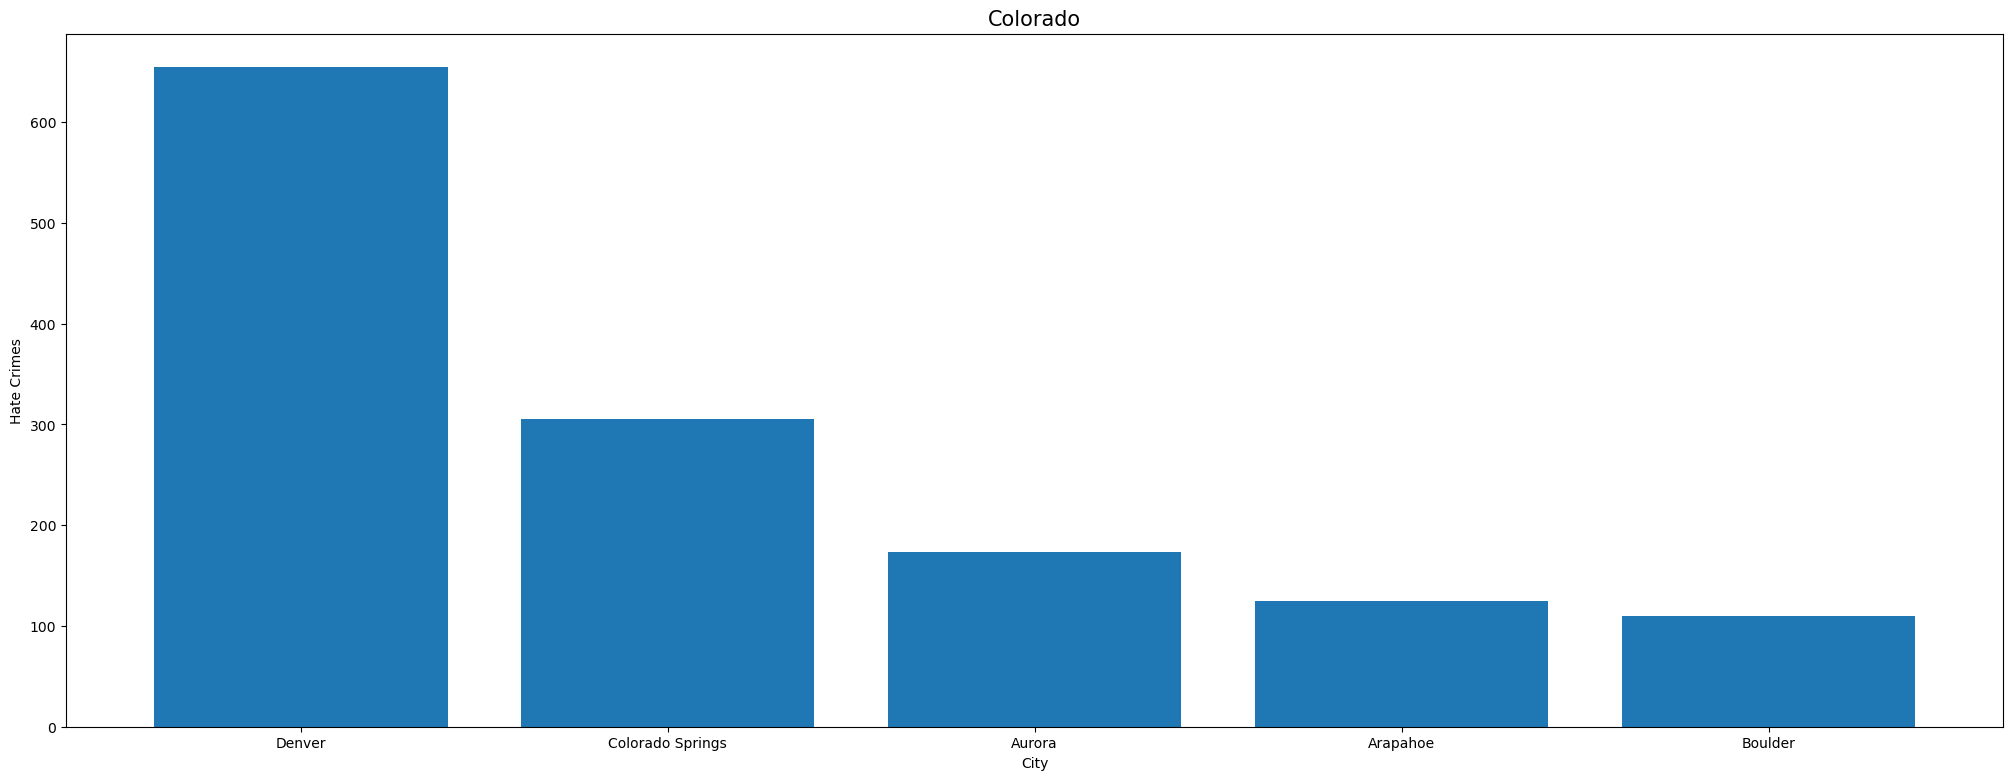

In [225]:
func('Colorado')

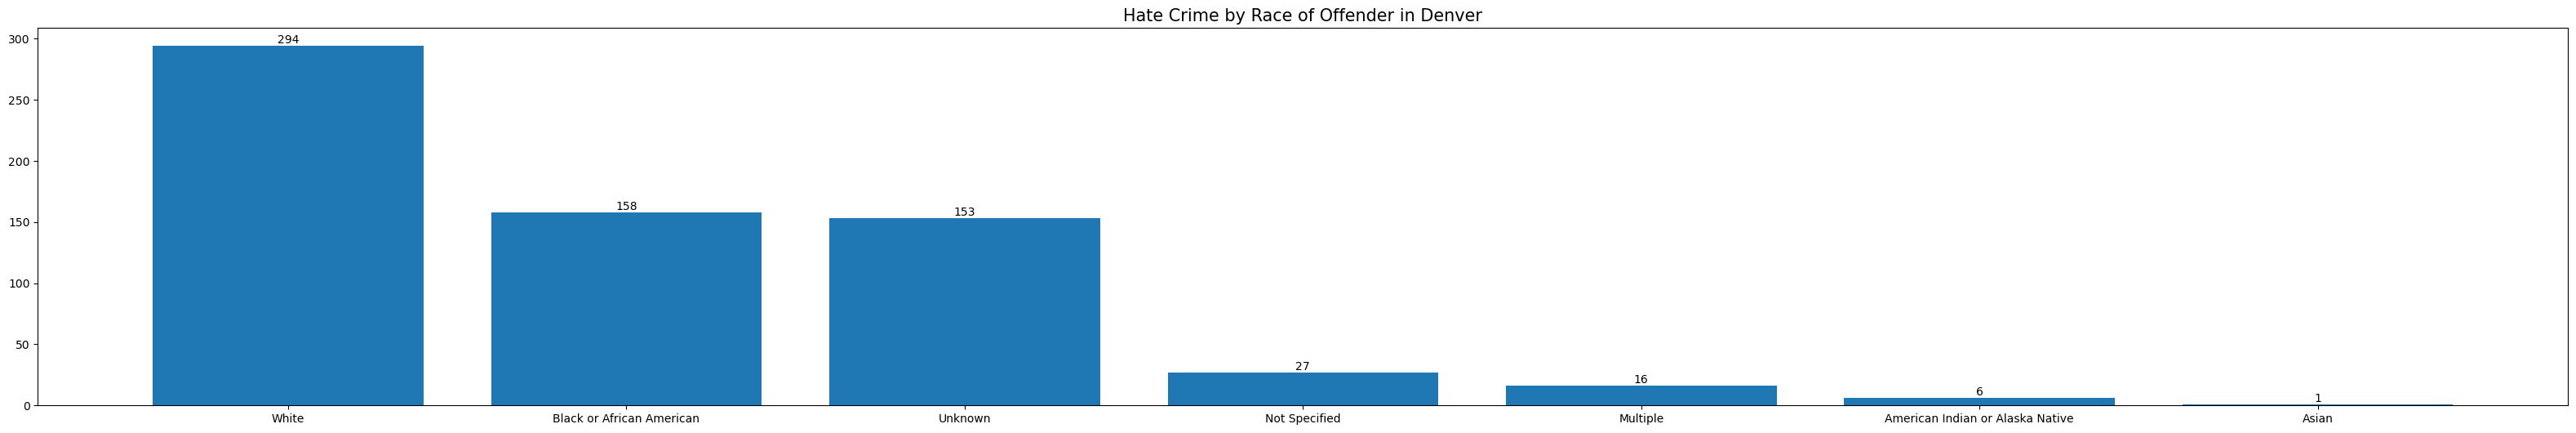

In [226]:
city_mask = hc['pug_agency_name'] == 'Denver'
state_mask = hc['state_name'] == 'Colorado'

den = hc[city_mask & state_mask] # a dataframe of only Boise, ID

x= den.offender_race.value_counts()[:10].index
y= den.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Denver", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

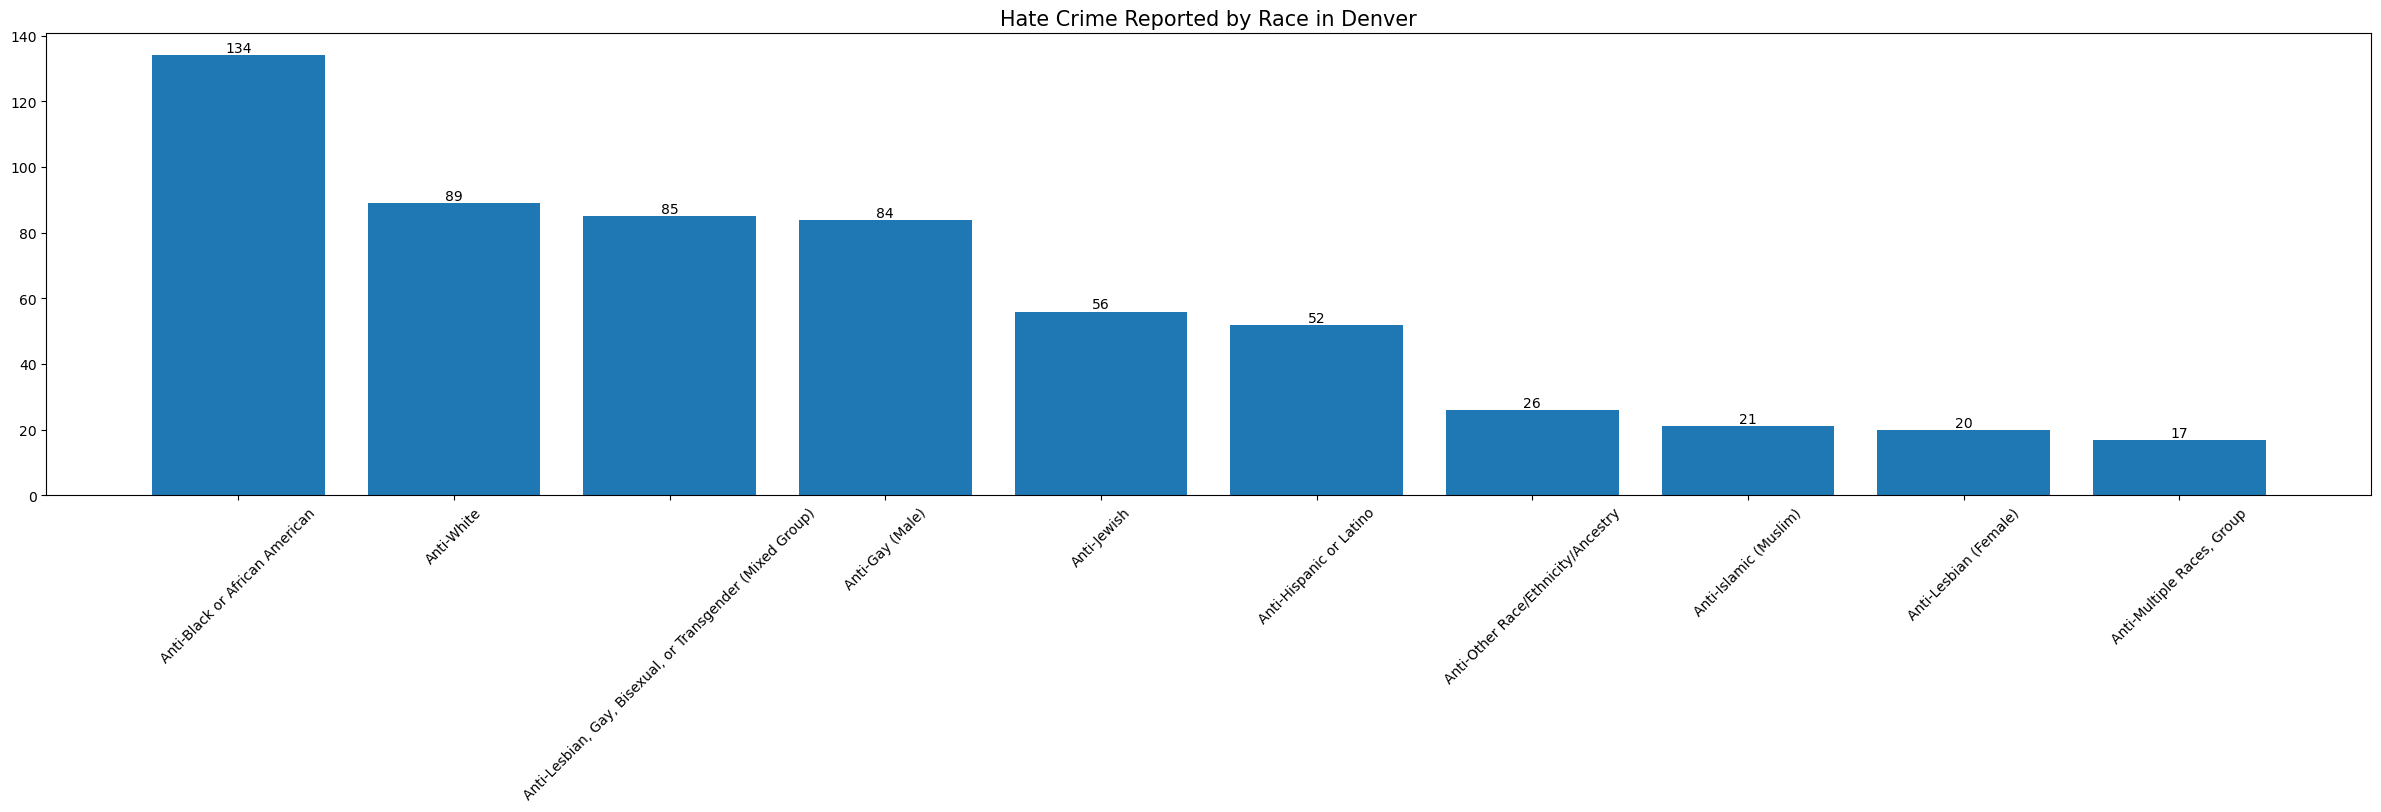

In [227]:
x= den.bias_desc.value_counts()[:10].index
y= den.bias_desc.value_counts()[:10].values
plt.figure(figsize=(30, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Denver", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

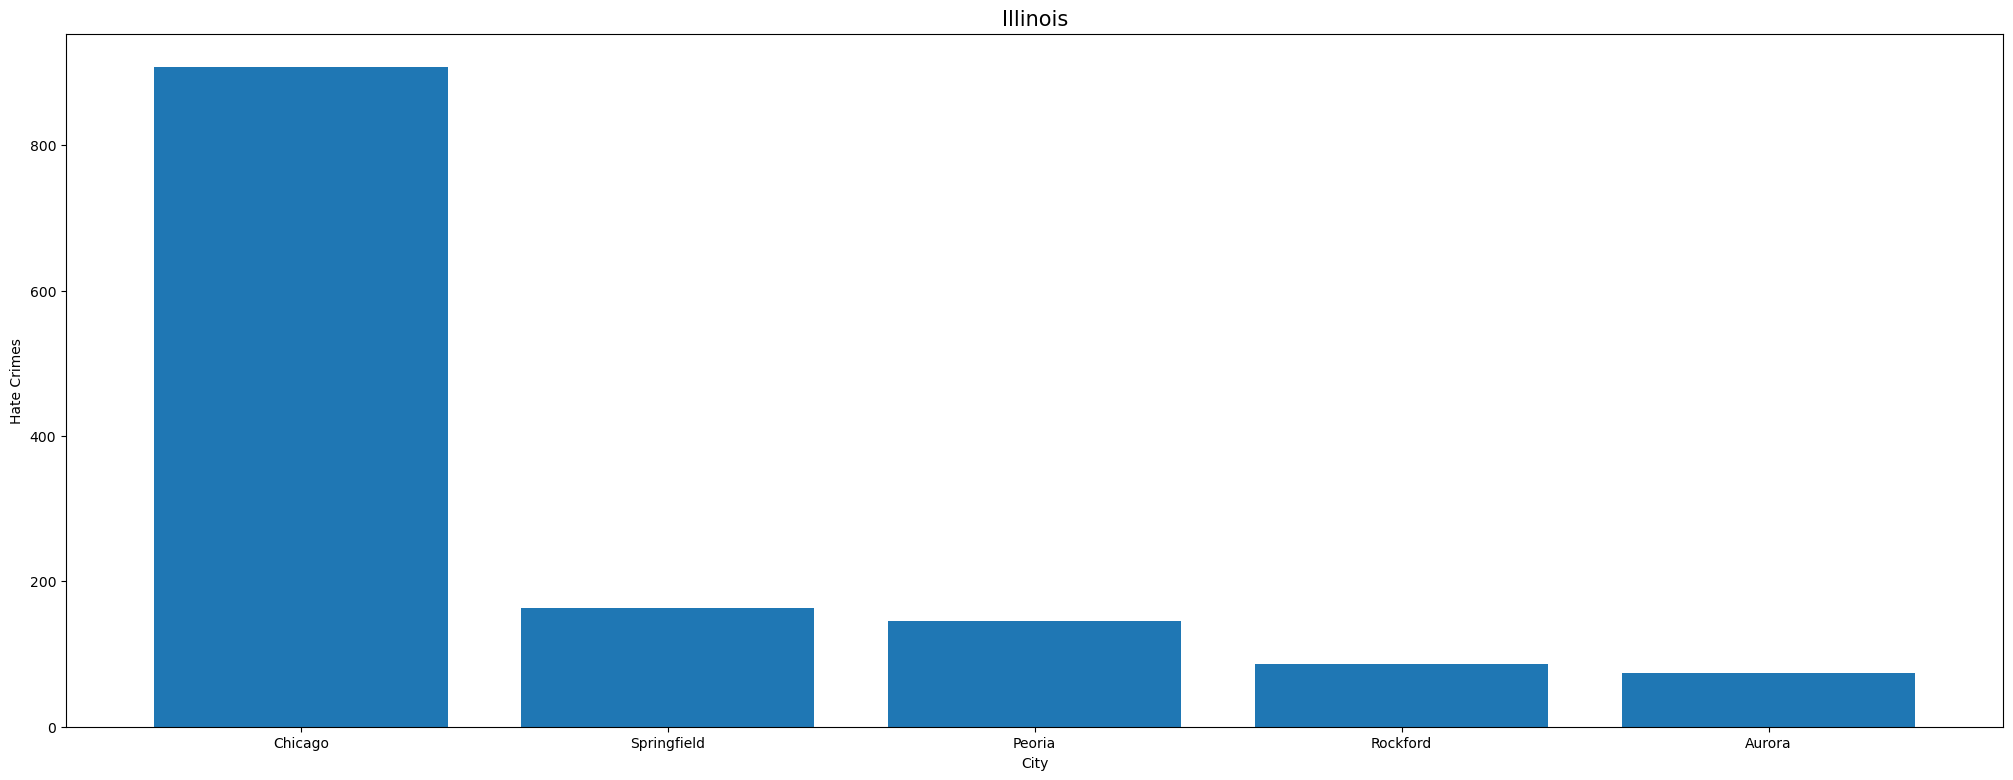

In [228]:
func('Illinois')

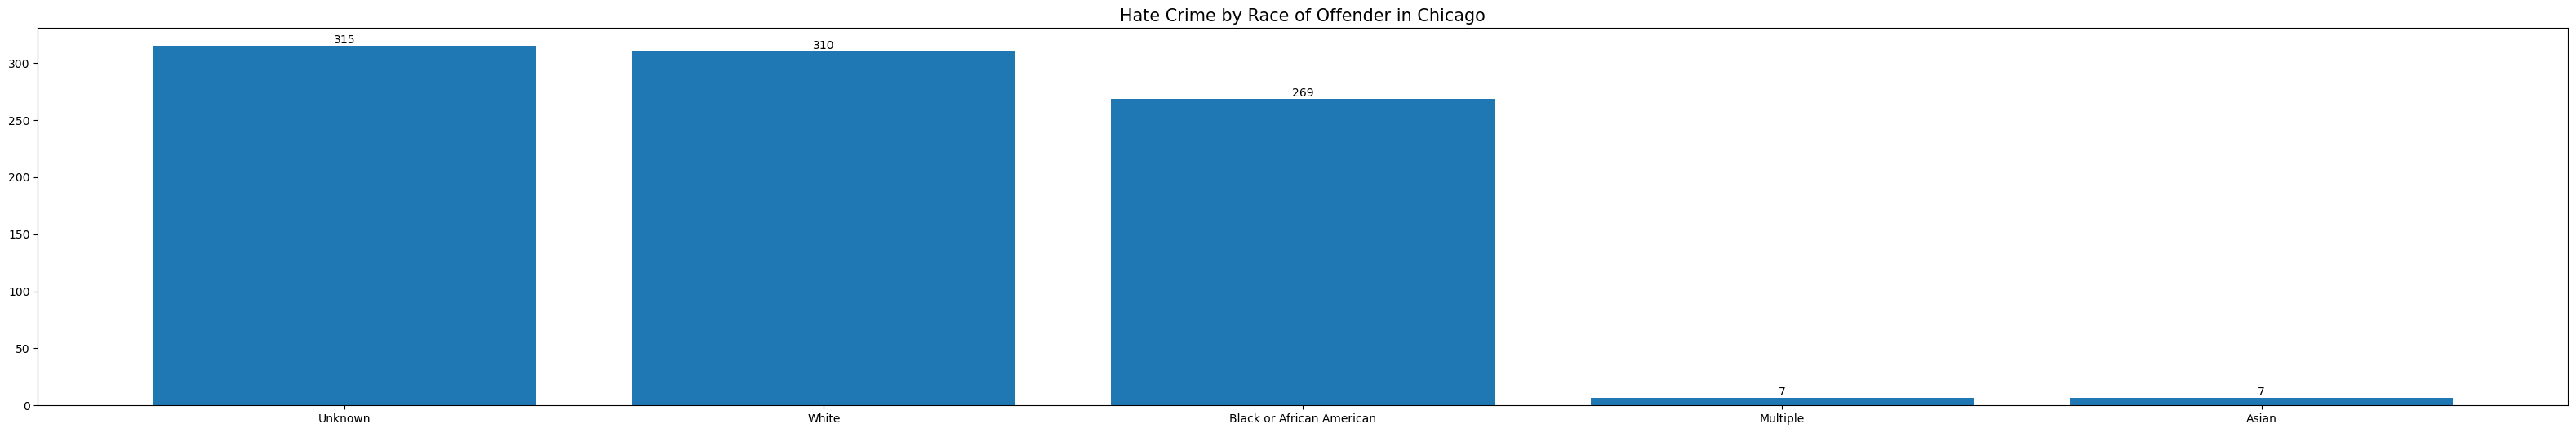

In [229]:
city_mask = hc['pug_agency_name'] == 'Chicago'
state_mask = hc['state_name'] == 'Illinois'

ill = hc[city_mask & state_mask] # a dataframe of only Boise, ID

x= ill.offender_race.value_counts()[:10].index
y= ill.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Chicago", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

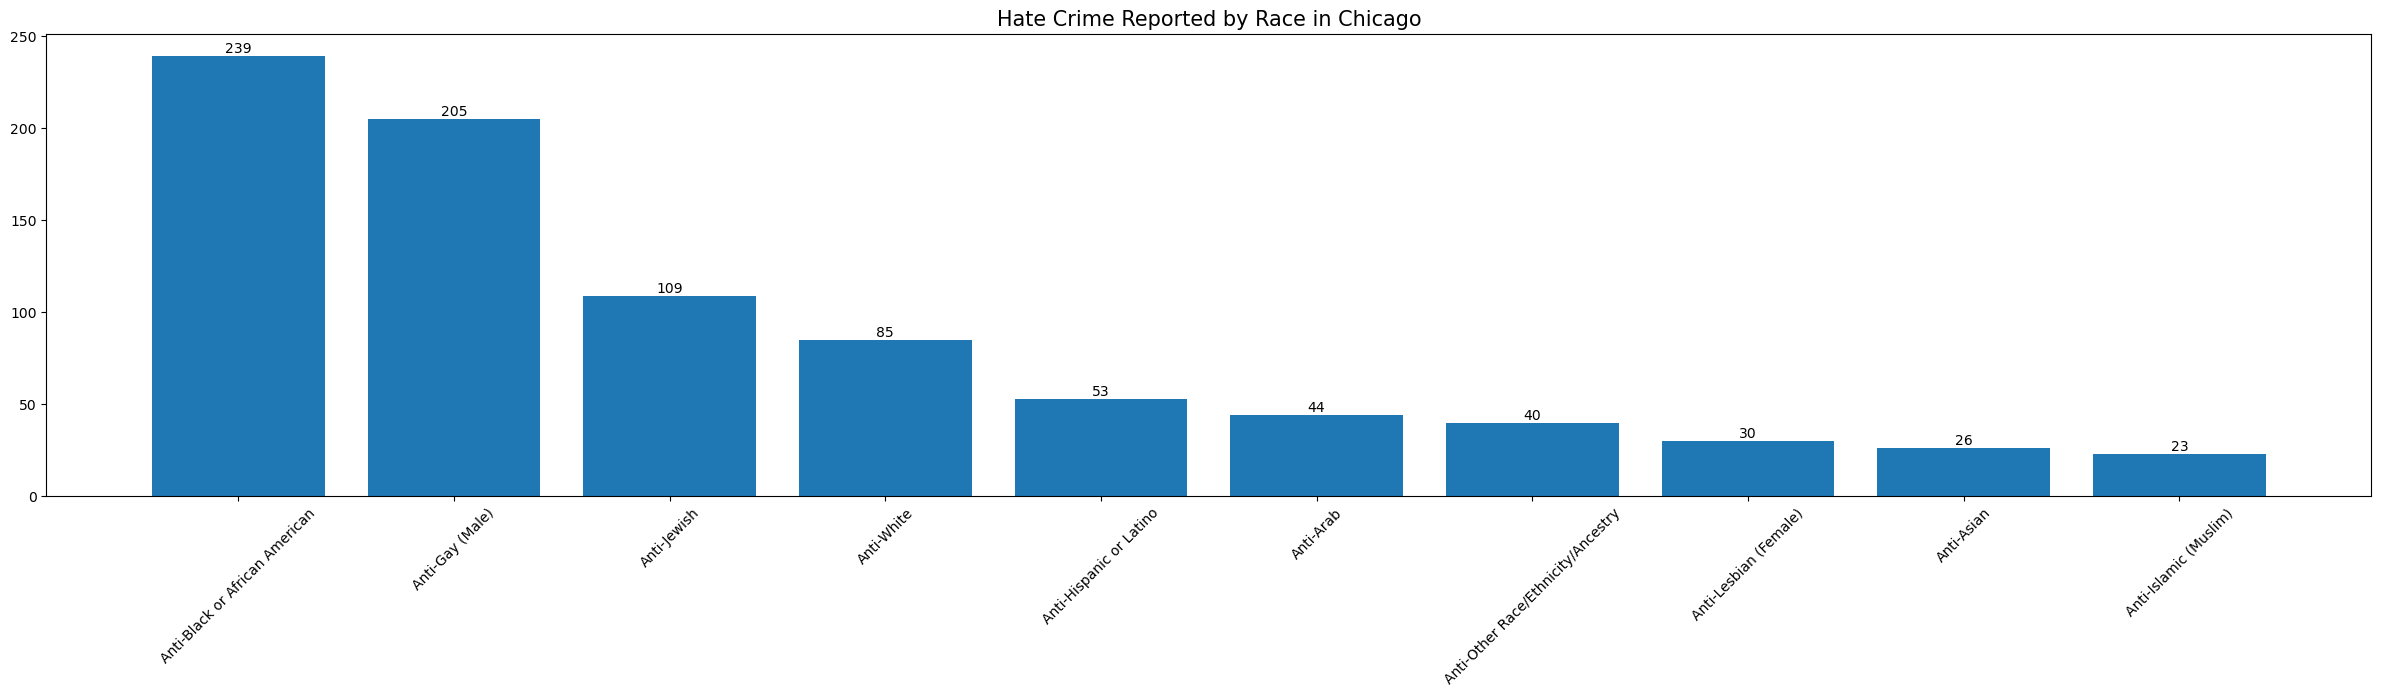

In [230]:
x= ill.bias_desc.value_counts()[:10].index
y= ill.bias_desc.value_counts()[:10].values
plt.figure(figsize=(30, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Chicago", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

In [231]:
hc.offender_race.value_counts()

Unknown                                      64561
White                                        63025
Black or African American                    20617
Not Specified                                 6807
Multiple                                      3595
Asian                                         1116
American Indian or Alaska Native              1026
Native Hawaiian or Other Pacific Islander      101
Name: offender_race, dtype: int64

In [232]:
hc.bias_desc.value_counts()

Anti-Black or African American                                                                              52229
Anti-Jewish                                                                                                 19008
Anti-White                                                                                                  16393
Anti-Gay (Male)                                                                                             16359
Anti-Hispanic or Latino                                                                                     10541
                                                                                                            ...  
Anti-Jewish;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group);Anti-Other Race/Ethnicity/Ancestry        1
Anti-Gay (Male);Anti-Gender Non-Conforming;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)            1
Anti-Gender Non-Conforming;Anti-Jewish;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixe

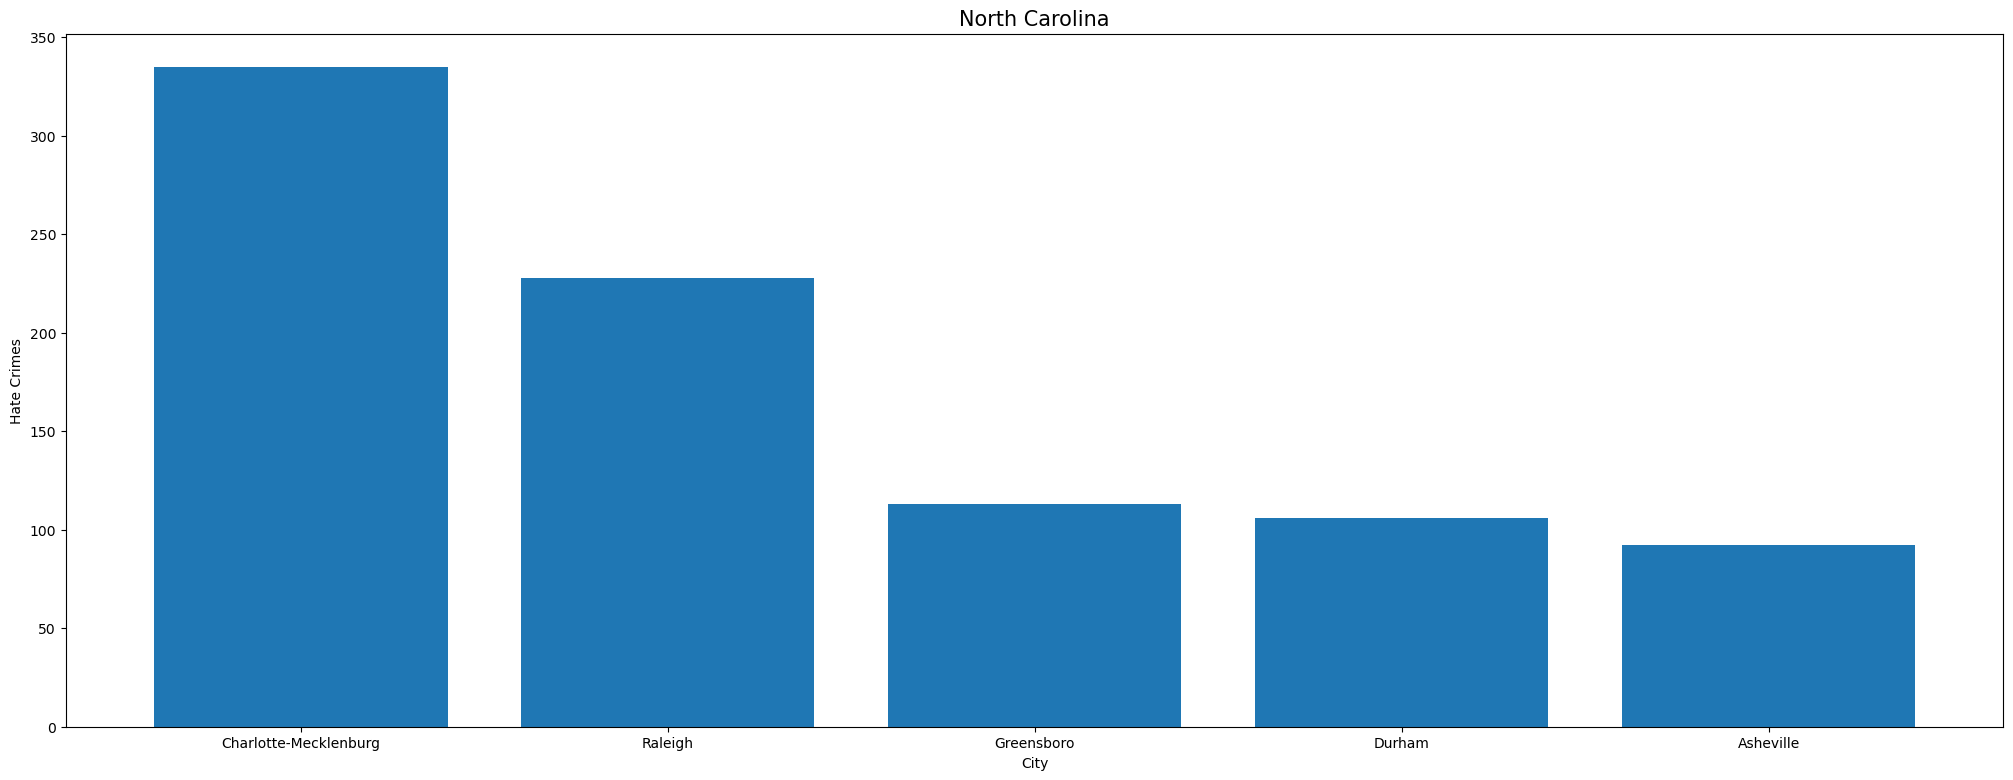

In [236]:
func('North Carolina')

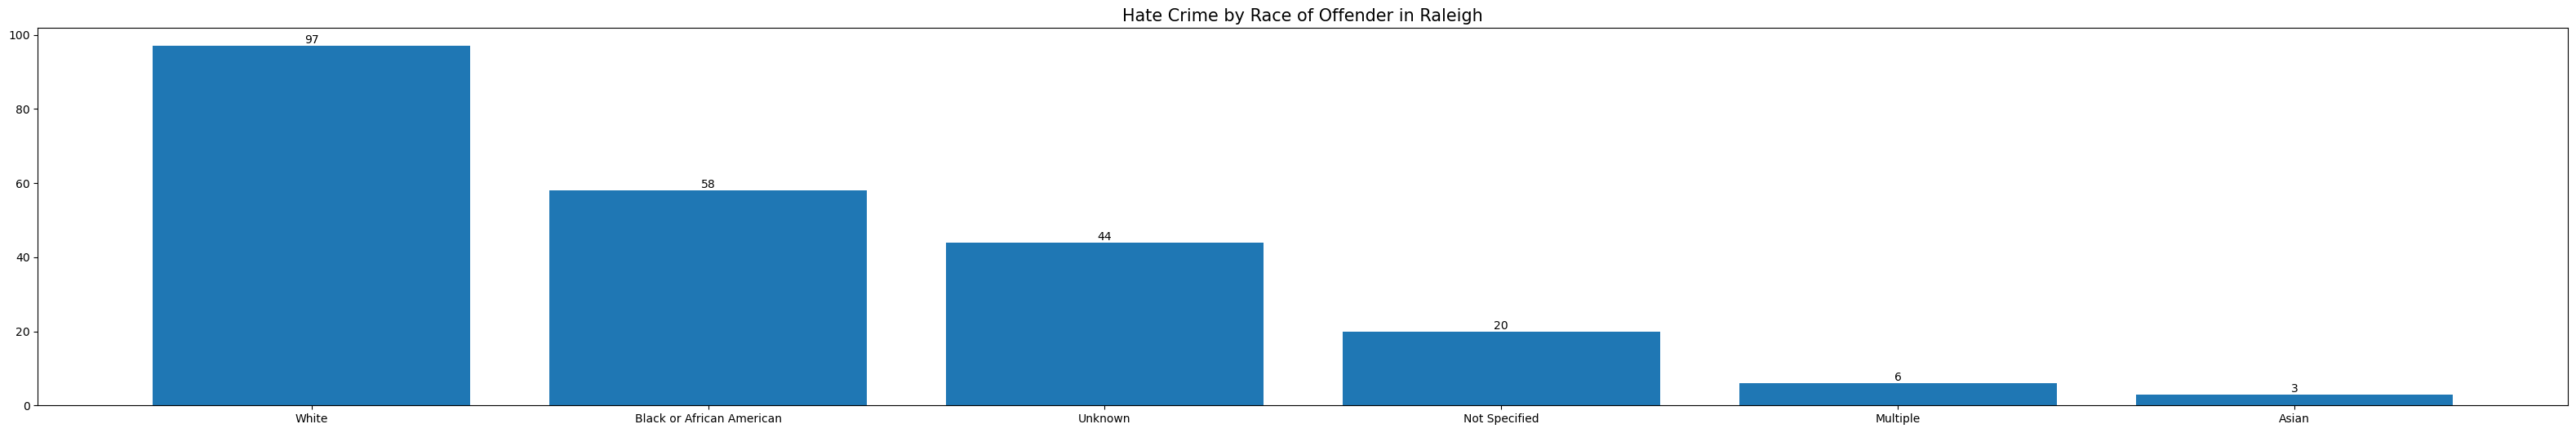

In [237]:
city_mask = hc['pug_agency_name'] == 'Raleigh'
state_mask = hc['state_name'] == 'North Carolina'

ral = hc[city_mask & state_mask] # a dataframe of only Boise, ID

x= ral.offender_race.value_counts()[:10].index
y= ral.offender_race.value_counts()[:10].values
plt.figure(figsize=(40, 6))

plt.bar(x, y)
plt.title("Hate Crime by Race of Offender in Raleigh", fontsize=15)

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )

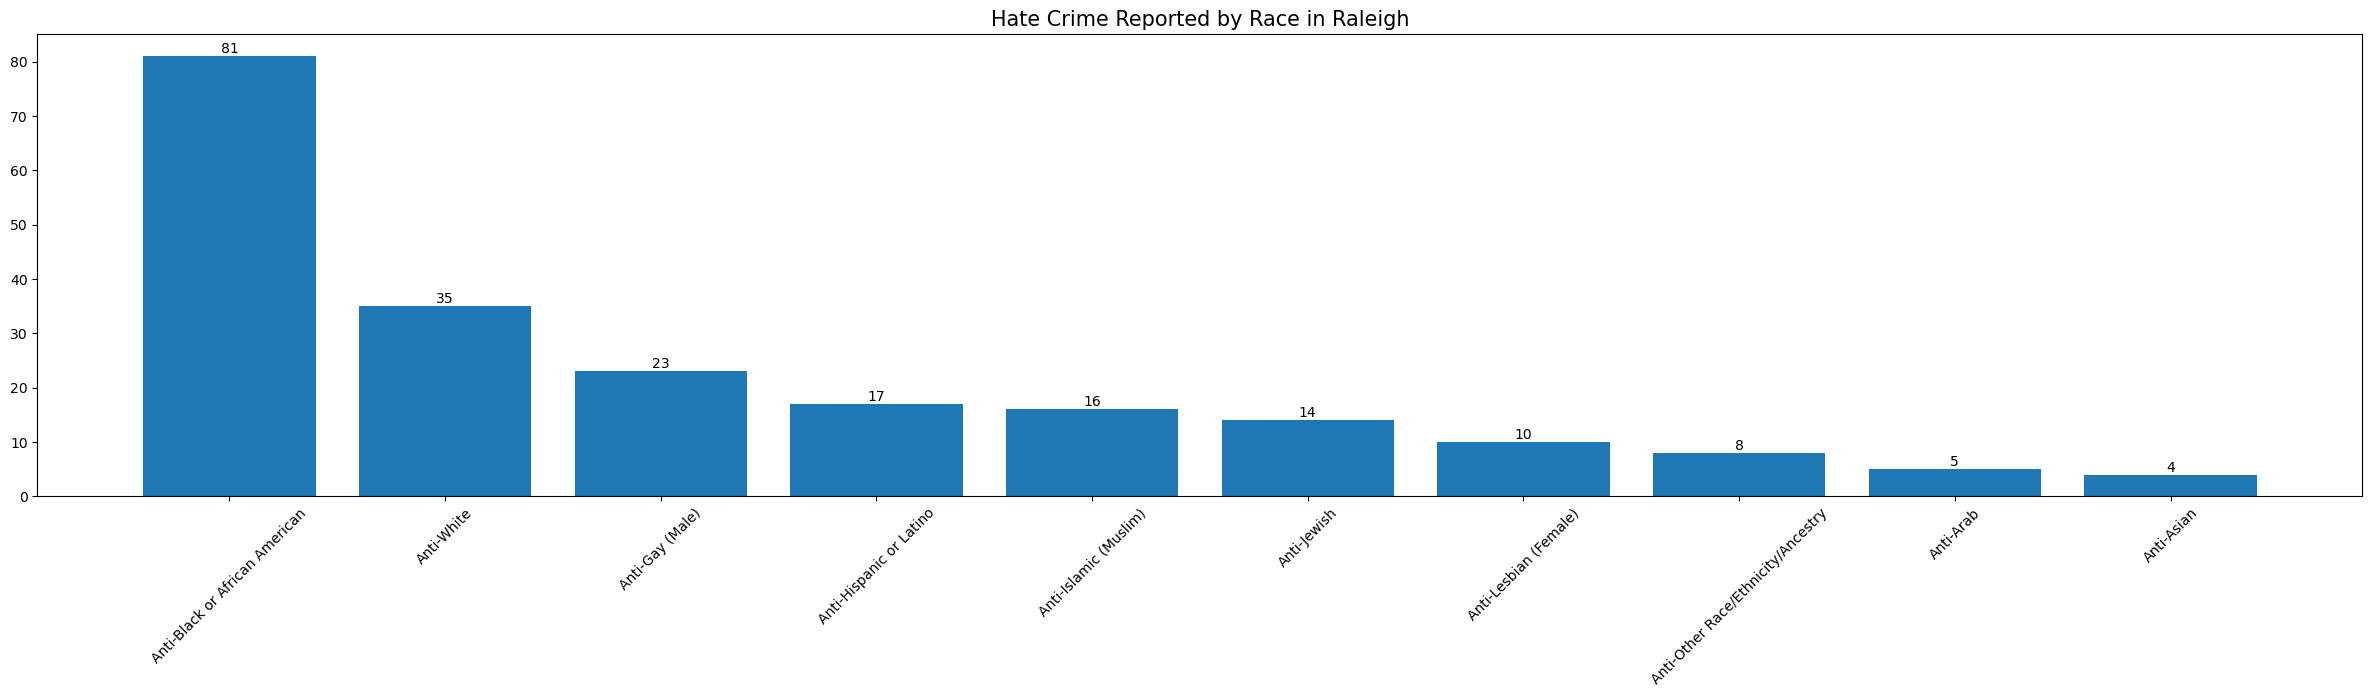

In [238]:
x= ral.bias_desc.value_counts()[:10].index
y= ral.bias_desc.value_counts()[:10].values
plt.figure(figsize=(30, 6))

plt.bar(x, y)
plt.title("Hate Crime Reported by Race in Raleigh", fontsize=15)


plt.xticks(rotation=45)#how to rotate names to make them more readable

for i in range(len(x)):
    plt.text( x[i], y[i], str(y[i]), ha='center', va='bottom' )